## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [8]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [9]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442


# Selecting working columns for the XGBoost algorithms

In [10]:
# Choosing the predictor and independent variables
predictor = "ln_Gs_cub_m"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX']


In [11]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  


In [12]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [13]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX
0,0.85,12.233545,19.097736
1,1.00,14.964220,17.704655
2,1.00,15.329449,17.559893
3,0.97,15.392742,20.676994
4,1.00,17.944009,21.851387


In [14]:
# Columns in "y" data collections
y.head()

,ln_Gs_cub_m
0,4.771
1,5.808
2,5.796
3,5.826
4,6.059


# Create first XGBoost model for estimate varibiality of output stats

In [15]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [16]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [17]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [18]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7737904956405568, 0.9241465281794459, 0.8840828209021867]
    Mean: 0.861
    Std: 0.064

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.50261592 0.37503576 0.34098869]
    Mean: 0.406
    Std: 0.070

 --------------------
Mean absolute error (MAE): 

    Scores: [0.25331912193298334, 0.3244705231049481, 0.28853439931308517]
    Mean: 0.289
    Std: 0.029

 --------------------


# Add optimal hyperparameters for XGBoost model

In [19]:
# Hyperparameters data for the next step/stage
p1 = 0.8441358793414397                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.21354596382063146                    # gamma
print('Gamma: ' + str(p2))

p3 = 0.09419852841923904                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 65          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.31114930117673584                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8441358793414397
Gamma: 0.21354596382063146
Learning_rate: 0.09419852841923904
Max_depth: 3
N_estimators: 65
Subsample: 0.31114930117673584


# Estimation of predictive quality to basic XGBoost models using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.24637	validation_1-rmse:4.24823
[1]	validation_0-rmse:3.88529	validation_1-rmse:3.87240
[2]	validation_0-rmse:3.53396	validation_1-rmse:3.51669
[3]	validation_0-rmse:3.22843	validation_1-rmse:3.21989
[4]	validation_0-rmse:2.95820	validation_1-rmse:2.93131
[5]	validation_0-rmse:2.71894	validation_1-rmse:2.69909
[6]	validation_0-rmse:2.49239	validation_1-rmse:2.45806
[7]	validation_0-rmse:2.27358	validation_1-rmse:2.22649
[8]	validation_0-rmse:2.06793	validation_1-rmse:2.00558


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.90844	validation_1-rmse:1.84074
[10]	validation_0-rmse:1.74902	validation_1-rmse:1.68872
[11]	validation_0-rmse:1.62515	validation_1-rmse:1.55651
[12]	validation_0-rmse:1.48664	validation_1-rmse:1.40847
[13]	validation_0-rmse:1.36783	validation_1-rmse:1.30486
[14]	validation_0-rmse:1.25643	validation_1-rmse:1.20591
[15]	validation_0-rmse:1.15100	validation_1-rmse:1.09106
[16]	validation_0-rmse:1.05871	validation_1-rmse:1.01494
[17]	validation_0-rmse:0.96966	validation_1-rmse:0.94171
[18]	validation_0-rmse:0.89945	validation_1-rmse:0.89732
[19]	validation_0-rmse:0.83040	validation_1-rmse:0.83886
[20]	validation_0-rmse:0.76895	validation_1-rmse:0.78532
[21]	validation_0-rmse:0.71501	validation_1-rmse:0.74099
[22]	validation_0-rmse:0.66926	validation_1-rmse:0.71502
[23]	validation_0-rmse:0.62617	validation_1-rmse:0.67946
[24]	validation_0-rmse:0.58372	validation_1-rmse:0.64611
[25]	validation_0-rmse:0.54091	validation_1-rmse:0.61448
[26]	validation_0-rmse:0.50192	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.31397	validation_1-rmse:4.03305
[1]	validation_0-rmse:3.93134	validation_1-rmse:3.66795
[2]	validation_0-rmse:3.60181	validation_1-rmse:3.37490
[3]	validation_0-rmse:3.29099	validation_1-rmse:3.06495
[4]	validation_0-rmse:3.00421	validation_1-rmse:2.78756
[5]	validation_0-rmse:2.77497	validation_1-rmse:2.56426


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.55073	validation_1-rmse:2.36316
[7]	validation_0-rmse:2.33925	validation_1-rmse:2.17683
[8]	validation_0-rmse:2.13703	validation_1-rmse:1.97368
[9]	validation_0-rmse:1.97237	validation_1-rmse:1.82291
[10]	validation_0-rmse:1.82145	validation_1-rmse:1.68874
[11]	validation_0-rmse:1.67417	validation_1-rmse:1.54863
[12]	validation_0-rmse:1.52517	validation_1-rmse:1.40210
[13]	validation_0-rmse:1.39691	validation_1-rmse:1.28812
[14]	validation_0-rmse:1.27395	validation_1-rmse:1.18206
[15]	validation_0-rmse:1.16696	validation_1-rmse:1.07829
[16]	validation_0-rmse:1.07289	validation_1-rmse:1.00189
[17]	validation_0-rmse:0.98177	validation_1-rmse:0.92464
[18]	validation_0-rmse:0.90716	validation_1-rmse:0.87502
[19]	validation_0-rmse:0.84321	validation_1-rmse:0.81635
[20]	validation_0-rmse:0.77656	validation_1-rmse:0.76076
[21]	validation_0-rmse:0.71909	validation_1-rmse:0.71281
[22]	validation_0-rmse:0.66610	validation_1-rmse:0.67072
[23]	validation_0-rmse:0.62517	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.27928	validation_1-rmse:4.14135
[1]	validation_0-rmse:3.90261	validation_1-rmse:3.76071
[2]	validation_0-rmse:3.55296	validation_1-rmse:3.41275
[3]	validation_0-rmse:3.25548	validation_1-rmse:3.11193
[4]	validation_0-rmse:2.96911	validation_1-rmse:2.83472
[5]	validation_0-rmse:2.71534	validation_1-rmse:2.57709
[6]	validation_0-rmse:2.47934	validation_1-rmse:2.33995
[7]	validation_0-rmse:2.27553	validation_1-rmse:2.15348
[8]	validation_0-rmse:2.08460	validation_1-rmse:1.96470
[9]	validation_0-rmse:1.90871	validation_1-rmse:1.79105
[10]	validation_0-rmse:1.74908	validation_1-rmse:1.63655
[11]	validation_0-rmse:1.60347	validation_1-rmse:1.48834
[12]	validation_0-rmse:1.48130	validation_1-rmse:1.40358
[13]	validation_0-rmse:1.35853	validation_1-rmse:1.28591
[14]	validation_0-rmse:1.25017	validation_1-rmse:1.18334
[15]	validation_0-rmse:1.15297	validation_1-rmse:1.09188
[16]	validation_0-rmse:1.05747	validation_1-rmse:1.01120
[17]	validation_0-rmse:0.97511	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24428	validation_1-rmse:4.29627
[1]	validation_0-rmse:3.87760	validation_1-rmse:3.94043
[2]	validation_0-rmse:3.53903	validation_1-rmse:3.61162
[3]	validation_0-rmse:3.22800	validation_1-rmse:3.29823
[4]	validation_0-rmse:2.97359	validation_1-rmse:3.05935
[5]	validation_0-rmse:2.72856	validation_1-rmse:2.81194


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.50083	validation_1-rmse:2.59577
[7]	validation_0-rmse:2.28995	validation_1-rmse:2.38716
[8]	validation_0-rmse:2.10195	validation_1-rmse:2.20182
[9]	validation_0-rmse:1.91688	validation_1-rmse:2.01691
[10]	validation_0-rmse:1.76472	validation_1-rmse:1.87262
[11]	validation_0-rmse:1.61345	validation_1-rmse:1.72265
[12]	validation_0-rmse:1.48594	validation_1-rmse:1.59518
[13]	validation_0-rmse:1.36099	validation_1-rmse:1.47365
[14]	validation_0-rmse:1.24787	validation_1-rmse:1.36177
[15]	validation_0-rmse:1.15024	validation_1-rmse:1.26073
[16]	validation_0-rmse:1.05209	validation_1-rmse:1.15940
[17]	validation_0-rmse:0.96505	validation_1-rmse:1.07993
[18]	validation_0-rmse:0.89711	validation_1-rmse:1.01286
[19]	validation_0-rmse:0.82933	validation_1-rmse:0.94349
[20]	validation_0-rmse:0.77097	validation_1-rmse:0.87991
[21]	validation_0-rmse:0.71150	validation_1-rmse:0.81958
[22]	validation_0-rmse:0.66383	validation_1-rmse:0.76503
[23]	validation_0-rmse:0.62117	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25394	validation_1-rmse:4.25332
[1]	validation_0-rmse:3.87885	validation_1-rmse:3.88717
[2]	validation_0-rmse:3.54949	validation_1-rmse:3.55902
[3]	validation_0-rmse:3.26782	validation_1-rmse:3.26598
[4]	validation_0-rmse:2.98523	validation_1-rmse:2.99371
[5]	validation_0-rmse:2.72940	validation_1-rmse:2.73385
[6]	validation_0-rmse:2.48242	validation_1-rmse:2.48582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.26833	validation_1-rmse:2.26315
[8]	validation_0-rmse:2.06590	validation_1-rmse:2.06830
[9]	validation_0-rmse:1.89343	validation_1-rmse:1.89224
[10]	validation_0-rmse:1.75135	validation_1-rmse:1.74382
[11]	validation_0-rmse:1.62562	validation_1-rmse:1.61354
[12]	validation_0-rmse:1.48790	validation_1-rmse:1.48011
[13]	validation_0-rmse:1.36685	validation_1-rmse:1.36603
[14]	validation_0-rmse:1.25189	validation_1-rmse:1.25431
[15]	validation_0-rmse:1.15313	validation_1-rmse:1.15546
[16]	validation_0-rmse:1.06564	validation_1-rmse:1.06600
[17]	validation_0-rmse:0.98082	validation_1-rmse:0.97956
[18]	validation_0-rmse:0.90241	validation_1-rmse:0.89871
[19]	validation_0-rmse:0.83248	validation_1-rmse:0.82674
[20]	validation_0-rmse:0.77935	validation_1-rmse:0.77509
[21]	validation_0-rmse:0.71944	validation_1-rmse:0.71389
[22]	validation_0-rmse:0.67024	validation_1-rmse:0.66837
[23]	validation_0-rmse:0.62288	validation_1-rmse:0.61856
[24]	validation_0-rmse:0.58357	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25964	validation_1-rmse:4.24631
[1]	validation_0-rmse:3.88009	validation_1-rmse:3.86575
[2]	validation_0-rmse:3.51945	validation_1-rmse:3.50077


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.21921	validation_1-rmse:3.20192
[4]	validation_0-rmse:2.95536	validation_1-rmse:2.93408
[5]	validation_0-rmse:2.69886	validation_1-rmse:2.67849
[6]	validation_0-rmse:2.47451	validation_1-rmse:2.45172
[7]	validation_0-rmse:2.27616	validation_1-rmse:2.24899
[8]	validation_0-rmse:2.08933	validation_1-rmse:2.05502
[9]	validation_0-rmse:1.90960	validation_1-rmse:1.87240
[10]	validation_0-rmse:1.73336	validation_1-rmse:1.68856
[11]	validation_0-rmse:1.60393	validation_1-rmse:1.55909
[12]	validation_0-rmse:1.47283	validation_1-rmse:1.42197
[13]	validation_0-rmse:1.35646	validation_1-rmse:1.30172
[14]	validation_0-rmse:1.23512	validation_1-rmse:1.18252
[15]	validation_0-rmse:1.13847	validation_1-rmse:1.08202
[16]	validation_0-rmse:1.04634	validation_1-rmse:0.98777
[17]	validation_0-rmse:0.95815	validation_1-rmse:0.89622
[18]	validation_0-rmse:0.88979	validation_1-rmse:0.82961
[19]	validation_0-rmse:0.82553	validation_1-rmse:0.77298
[20]	validation_0-rmse:0.76193	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.23650	validation_1-rmse:4.22742
[1]	validation_0-rmse:3.86294	validation_1-rmse:3.84439
[2]	validation_0-rmse:3.52135	validation_1-rmse:3.49675
[3]	validation_0-rmse:3.21171	validation_1-rmse:3.18552
[4]	validation_0-rmse:2.95269	validation_1-rmse:2.92734
[5]	validation_0-rmse:2.70012	validation_1-rmse:2.67483
[6]	validation_0-rmse:2.47860	validation_1-rmse:2.45047
[7]	validation_0-rmse:2.27084	validation_1-rmse:2.24476
[8]	validation_0-rmse:2.09295	validation_1-rmse:2.06698
[9]	validation_0-rmse:1.91595	validation_1-rmse:1.89185
[10]	validation_0-rmse:1.76495	validation_1-rmse:1.74323
[11]	validation_0-rmse:1.60635	validation_1-rmse:1.58554
[12]	validation_0-rmse:1.47172	validation_1-rmse:1.45484
[13]	validation_0-rmse:1.35898	validation_1-rmse:1.32453


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.24936	validation_1-rmse:1.21799
[15]	validation_0-rmse:1.14396	validation_1-rmse:1.10640
[16]	validation_0-rmse:1.05055	validation_1-rmse:1.01493
[17]	validation_0-rmse:0.96708	validation_1-rmse:0.93297
[18]	validation_0-rmse:0.89365	validation_1-rmse:0.86180
[19]	validation_0-rmse:0.81917	validation_1-rmse:0.79122
[20]	validation_0-rmse:0.75933	validation_1-rmse:0.73588
[21]	validation_0-rmse:0.71614	validation_1-rmse:0.69765
[22]	validation_0-rmse:0.67176	validation_1-rmse:0.65682
[23]	validation_0-rmse:0.63118	validation_1-rmse:0.62111
[24]	validation_0-rmse:0.59210	validation_1-rmse:0.58657
[25]	validation_0-rmse:0.55738	validation_1-rmse:0.55515
[26]	validation_0-rmse:0.53264	validation_1-rmse:0.53180
[27]	validation_0-rmse:0.51478	validation_1-rmse:0.51651
[28]	validation_0-rmse:0.48553	validation_1-rmse:0.49206
[29]	validation_0-rmse:0.45827	validation_1-rmse:0.47122
[30]	validation_0-rmse:0.43574	validation_1-rmse:0.45402
[31]	validation_0-rmse:0.41679	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.51974	validation_1-rmse:3.60498
[3]	validation_0-rmse:3.22649	validation_1-rmse:3.30161
[4]	validation_0-rmse:2.95990	validation_1-rmse:3.03533
[5]	validation_0-rmse:2.71061	validation_1-rmse:2.78066
[6]	validation_0-rmse:2.48108	validation_1-rmse:2.54648
[7]	validation_0-rmse:2.28026	validation_1-rmse:2.34826
[8]	validation_0-rmse:2.08792	validation_1-rmse:2.15208
[9]	validation_0-rmse:1.91246	validation_1-rmse:1.96920
[10]	validation_0-rmse:1.75791	validation_1-rmse:1.80653
[11]	validation_0-rmse:1.61645	validation_1-rmse:1.65002
[12]	validation_0-rmse:1.48262	validation_1-rmse:1.51376
[13]	validation_0-rmse:1.36917	validation_1-rmse:1.39707
[14]	validation_0-rmse:1.25306	validation_1-rmse:1.27770
[15]	validation_0-rmse:1.15731	validation_1-rmse:1.17333
[16]	validation_0-rmse:1.06119	validation_1-rmse:1.07284
[17]	validation_0-rmse:0.97728	validation_1-rmse:0.98569
[18]	validation_0-rmse:0.91041	validation_1-rmse:0.92189
[19]	validation_0-rmse:0.84297	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.11411	validation_1-rmse:4.74973
[1]	validation_0-rmse:3.76525	validation_1-rmse:4.37938
[2]	validation_0-rmse:3.43877	validation_1-rmse:4.01583
[3]	validation_0-rmse:3.14489	validation_1-rmse:3.69232
[4]	validation_0-rmse:2.87863	validation_1-rmse:3.39300
[5]	validation_0-rmse:2.62750	validation_1-rmse:3.11197
[6]	validation_0-rmse:2.41927	validation_1-rmse:2.87353


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.23023	validation_1-rmse:2.65638
[8]	validation_0-rmse:2.05138	validation_1-rmse:2.44797
[9]	validation_0-rmse:1.89239	validation_1-rmse:2.26772
[10]	validation_0-rmse:1.75848	validation_1-rmse:2.11619
[11]	validation_0-rmse:1.62333	validation_1-rmse:1.96079
[12]	validation_0-rmse:1.48851	validation_1-rmse:1.79531
[13]	validation_0-rmse:1.36655	validation_1-rmse:1.64919
[14]	validation_0-rmse:1.25740	validation_1-rmse:1.49801
[15]	validation_0-rmse:1.17222	validation_1-rmse:1.37657
[16]	validation_0-rmse:1.06944	validation_1-rmse:1.26013
[17]	validation_0-rmse:0.99152	validation_1-rmse:1.15928
[18]	validation_0-rmse:0.92512	validation_1-rmse:1.08641
[19]	validation_0-rmse:0.85928	validation_1-rmse:0.99833
[20]	validation_0-rmse:0.79286	validation_1-rmse:0.90891
[21]	validation_0-rmse:0.73679	validation_1-rmse:0.83471
[22]	validation_0-rmse:0.68425	validation_1-rmse:0.76227
[23]	validation_0-rmse:0.64181	validation_1-rmse:0.70392
[24]	validation_0-rmse:0.60068	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.22277	validation_1-rmse:4.38468
[1]	validation_0-rmse:3.86230	validation_1-rmse:4.02365
[2]	validation_0-rmse:3.52269	validation_1-rmse:3.67862
[3]	validation_0-rmse:3.21904	validation_1-rmse:3.37740
[4]	validation_0-rmse:2.93953	validation_1-rmse:3.08864
[5]	validation_0-rmse:2.71062	validation_1-rmse:2.85954
[6]	validation_0-rmse:2.48967	validation_1-rmse:2.62749
[7]	validation_0-rmse:2.27927	validation_1-rmse:2.41912
[8]	validation_0-rmse:2.08361	validation_1-rmse:2.21024


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.90670	validation_1-rmse:2.02597
[10]	validation_0-rmse:1.75681	validation_1-rmse:1.87666
[11]	validation_0-rmse:1.62654	validation_1-rmse:1.74640
[12]	validation_0-rmse:1.48602	validation_1-rmse:1.59139
[13]	validation_0-rmse:1.37071	validation_1-rmse:1.47000
[14]	validation_0-rmse:1.26691	validation_1-rmse:1.35183
[15]	validation_0-rmse:1.16349	validation_1-rmse:1.23365
[16]	validation_0-rmse:1.07001	validation_1-rmse:1.13250
[17]	validation_0-rmse:0.98452	validation_1-rmse:1.04849
[18]	validation_0-rmse:0.90663	validation_1-rmse:0.97129
[19]	validation_0-rmse:0.83468	validation_1-rmse:0.89838
[20]	validation_0-rmse:0.76927	validation_1-rmse:0.83339
[21]	validation_0-rmse:0.71503	validation_1-rmse:0.77302
[22]	validation_0-rmse:0.66221	validation_1-rmse:0.72320
[23]	validation_0-rmse:0.61466	validation_1-rmse:0.67617
[24]	validation_0-rmse:0.58099	validation_1-rmse:0.64911
[25]	validation_0-rmse:0.54272	validation_1-rmse:0.61528
[26]	validation_0-rmse:0.51510	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.90242	validation_1-rmse:3.78067
[2]	validation_0-rmse:3.57315	validation_1-rmse:3.44815
[3]	validation_0-rmse:3.27180	validation_1-rmse:3.14459
[4]	validation_0-rmse:2.98525	validation_1-rmse:2.85609
[5]	validation_0-rmse:2.72370	validation_1-rmse:2.59297
[6]	validation_0-rmse:2.49509	validation_1-rmse:2.36541
[7]	validation_0-rmse:2.27600	validation_1-rmse:2.13501
[8]	validation_0-rmse:2.07380	validation_1-rmse:1.93671
[9]	validation_0-rmse:1.89472	validation_1-rmse:1.75899
[10]	validation_0-rmse:1.72789	validation_1-rmse:1.59658
[11]	validation_0-rmse:1.58901	validation_1-rmse:1.46179
[12]	validation_0-rmse:1.45539	validation_1-rmse:1.33228
[13]	validation_0-rmse:1.33170	validation_1-rmse:1.20494
[14]	validation_0-rmse:1.23452	validation_1-rmse:1.11376
[15]	validation_0-rmse:1.13267	validation_1-rmse:1.02107
[16]	validation_0-rmse:1.05006	validation_1-rmse:0.94414
[17]	validation_0-rmse:0.97297	validation_1-rmse:0.87367
[18]	validation_0-rmse:0.90206	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.55844	validation_1-rmse:3.53935
[3]	validation_0-rmse:3.24423	validation_1-rmse:3.21617
[4]	validation_0-rmse:2.96482	validation_1-rmse:2.91972
[5]	validation_0-rmse:2.72225	validation_1-rmse:2.67475
[6]	validation_0-rmse:2.48340	validation_1-rmse:2.42507
[7]	validation_0-rmse:2.26112	validation_1-rmse:2.18988
[8]	validation_0-rmse:2.08167	validation_1-rmse:2.00464
[9]	validation_0-rmse:1.90992	validation_1-rmse:1.81830
[10]	validation_0-rmse:1.74936	validation_1-rmse:1.64939
[11]	validation_0-rmse:1.61452	validation_1-rmse:1.50774
[12]	validation_0-rmse:1.48263	validation_1-rmse:1.37586
[13]	validation_0-rmse:1.35633	validation_1-rmse:1.24462
[14]	validation_0-rmse:1.25683	validation_1-rmse:1.14740
[15]	validation_0-rmse:1.15882	validation_1-rmse:1.04595
[16]	validation_0-rmse:1.07625	validation_1-rmse:0.97772
[17]	validation_0-rmse:0.99089	validation_1-rmse:0.89075
[18]	validation_0-rmse:0.91018	validation_1-rmse:0.81438
[19]	validation_0-rmse:0.84055	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.23196	validation_1-rmse:4.33907
[1]	validation_0-rmse:3.85964	validation_1-rmse:3.96126
[2]	validation_0-rmse:3.52071	validation_1-rmse:3.62025
[3]	validation_0-rmse:3.21896	validation_1-rmse:3.32835
[4]	validation_0-rmse:2.93931	validation_1-rmse:3.05369
[5]	validation_0-rmse:2.68975	validation_1-rmse:2.80815
[6]	validation_0-rmse:2.44988	validation_1-rmse:2.56409
[7]	validation_0-rmse:2.24999	validation_1-rmse:2.35868
[8]	validation_0-rmse:2.06316	validation_1-rmse:2.18137
[9]	validation_0-rmse:1.87788	validation_1-rmse:1.99475
[10]	validation_0-rmse:1.73248	validation_1-rmse:1.85036
[11]	validation_0-rmse:1.59945	validation_1-rmse:1.71988
[12]	validation_0-rmse:1.47178	validation_1-rmse:1.59651
[13]	validation_0-rmse:1.35697	validation_1-rmse:1.47627
[14]	validation_0-rmse:1.24246	validation_1-rmse:1.37234
[15]	validation_0-rmse:1.14717	validation_1-rmse:1.27729
[16]	validation_0-rmse:1.05838	validation_1-rmse:1.18910
[17]	validation_0-rmse:0.97567	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.92191	validation_1-rmse:3.71969
[2]	validation_0-rmse:3.56426	validation_1-rmse:3.37135
[3]	validation_0-rmse:3.25172	validation_1-rmse:3.08979
[4]	validation_0-rmse:2.99440	validation_1-rmse:2.86313
[5]	validation_0-rmse:2.73622	validation_1-rmse:2.63565
[6]	validation_0-rmse:2.50214	validation_1-rmse:2.43313
[7]	validation_0-rmse:2.28598	validation_1-rmse:2.21733
[8]	validation_0-rmse:2.09256	validation_1-rmse:2.03715
[9]	validation_0-rmse:1.91753	validation_1-rmse:1.85664
[10]	validation_0-rmse:1.76736	validation_1-rmse:1.70722
[11]	validation_0-rmse:1.62963	validation_1-rmse:1.56963
[12]	validation_0-rmse:1.49863	validation_1-rmse:1.45236
[13]	validation_0-rmse:1.38512	validation_1-rmse:1.34356
[14]	validation_0-rmse:1.27216	validation_1-rmse:1.24018
[15]	validation_0-rmse:1.17252	validation_1-rmse:1.14558
[16]	validation_0-rmse:1.08846	validation_1-rmse:1.06935
[17]	validation_0-rmse:1.00122	validation_1-rmse:0.99148
[18]	validation_0-rmse:0.91867	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.33024	validation_1-rmse:4.00583
[1]	validation_0-rmse:3.97216	validation_1-rmse:3.65714
[2]	validation_0-rmse:3.62333	validation_1-rmse:3.32999
[3]	validation_0-rmse:3.30661	validation_1-rmse:3.02198
[4]	validation_0-rmse:3.01698	validation_1-rmse:2.73664
[5]	validation_0-rmse:2.76319	validation_1-rmse:2.49314
[6]	validation_0-rmse:2.52547	validation_1-rmse:2.26810
[7]	validation_0-rmse:2.31179	validation_1-rmse:2.06133
[8]	validation_0-rmse:2.12620	validation_1-rmse:1.89072
[9]	validation_0-rmse:1.95624	validation_1-rmse:1.72716
[10]	validation_0-rmse:1.80210	validation_1-rmse:1.59614
[11]	validation_0-rmse:1.66555	validation_1-rmse:1.46912
[12]	validation_0-rmse:1.52650	validation_1-rmse:1.34044
[13]	validation_0-rmse:1.40083	validation_1-rmse:1.22545
[14]	validation_0-rmse:1.28610	validation_1-rmse:1.11999
[15]	validation_0-rmse:1.17563	validation_1-rmse:1.02683
[16]	validation_0-rmse:1.08986	validation_1-rmse:0.96239
[17]	validation_0-rmse:1.00644	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.91673	validation_1-rmse:3.83188
[2]	validation_0-rmse:3.57315	validation_1-rmse:3.48305
[3]	validation_0-rmse:3.25535	validation_1-rmse:3.15363
[4]	validation_0-rmse:2.98368	validation_1-rmse:2.89975
[5]	validation_0-rmse:2.72882	validation_1-rmse:2.64308
[6]	validation_0-rmse:2.49489	validation_1-rmse:2.40370
[7]	validation_0-rmse:2.28269	validation_1-rmse:2.19456
[8]	validation_0-rmse:2.08350	validation_1-rmse:2.00172
[9]	validation_0-rmse:1.90399	validation_1-rmse:1.81994
[10]	validation_0-rmse:1.73715	validation_1-rmse:1.65274
[11]	validation_0-rmse:1.58114	validation_1-rmse:1.50128
[12]	validation_0-rmse:1.45274	validation_1-rmse:1.37818
[13]	validation_0-rmse:1.32462	validation_1-rmse:1.25244
[14]	validation_0-rmse:1.21971	validation_1-rmse:1.15552
[15]	validation_0-rmse:1.13173	validation_1-rmse:1.08123
[16]	validation_0-rmse:1.03322	validation_1-rmse:0.98608
[17]	validation_0-rmse:0.95314	validation_1-rmse:0.91107
[18]	validation_0-rmse:0.88283	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.14786	validation_1-rmse:4.64071
[1]	validation_0-rmse:3.79570	validation_1-rmse:4.25125
[2]	validation_0-rmse:3.45186	validation_1-rmse:3.87529
[3]	validation_0-rmse:3.16835	validation_1-rmse:3.55669
[4]	validation_0-rmse:2.90568	validation_1-rmse:3.26214


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.65067	validation_1-rmse:2.97373
[6]	validation_0-rmse:2.43529	validation_1-rmse:2.73039
[7]	validation_0-rmse:2.25044	validation_1-rmse:2.53595
[8]	validation_0-rmse:2.06574	validation_1-rmse:2.33610
[9]	validation_0-rmse:1.88933	validation_1-rmse:2.13317
[10]	validation_0-rmse:1.74018	validation_1-rmse:1.97186
[11]	validation_0-rmse:1.59485	validation_1-rmse:1.81349
[12]	validation_0-rmse:1.46548	validation_1-rmse:1.65888
[13]	validation_0-rmse:1.35218	validation_1-rmse:1.53551
[14]	validation_0-rmse:1.24240	validation_1-rmse:1.40448
[15]	validation_0-rmse:1.14643	validation_1-rmse:1.28892
[16]	validation_0-rmse:1.05635	validation_1-rmse:1.18181
[17]	validation_0-rmse:0.97427	validation_1-rmse:1.08463
[18]	validation_0-rmse:0.90458	validation_1-rmse:1.00325
[19]	validation_0-rmse:0.84245	validation_1-rmse:0.92366
[20]	validation_0-rmse:0.78226	validation_1-rmse:0.85720
[21]	validation_0-rmse:0.73515	validation_1-rmse:0.79764
[22]	validation_0-rmse:0.68367	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.32484	validation_1-rmse:3.97273
[1]	validation_0-rmse:3.96225	validation_1-rmse:3.63029
[2]	validation_0-rmse:3.61236	validation_1-rmse:3.29450
[3]	validation_0-rmse:3.29354	validation_1-rmse:3.01284
[4]	validation_0-rmse:3.02628	validation_1-rmse:2.75691
[5]	validation_0-rmse:2.76417	validation_1-rmse:2.50381
[6]	validation_0-rmse:2.52199	validation_1-rmse:2.27216
[7]	validation_0-rmse:2.30797	validation_1-rmse:2.09026
[8]	validation_0-rmse:2.11776	validation_1-rmse:1.92883
[9]	validation_0-rmse:1.93809	validation_1-rmse:1.76230
[10]	validation_0-rmse:1.78182	validation_1-rmse:1.61242
[11]	validation_0-rmse:1.63669	validation_1-rmse:1.48037
[12]	validation_0-rmse:1.50773	validation_1-rmse:1.36541
[13]	validation_0-rmse:1.37850	validation_1-rmse:1.24890
[14]	validation_0-rmse:1.26697	validation_1-rmse:1.15715
[15]	validation_0-rmse:1.16813	validation_1-rmse:1.07783
[16]	validation_0-rmse:1.06914	validation_1-rmse:0.99025
[17]	validation_0-rmse:0.98469	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.24435	validation_1-rmse:4.34912
[1]	validation_0-rmse:3.87214	validation_1-rmse:3.98090
[2]	validation_0-rmse:3.54262	validation_1-rmse:3.63948
[3]	validation_0-rmse:3.24568	validation_1-rmse:3.33529
[4]	validation_0-rmse:2.95312	validation_1-rmse:3.01501
[5]	validation_0-rmse:2.71563	validation_1-rmse:2.78017
[6]	validation_0-rmse:2.48075	validation_1-rmse:2.54899
[7]	validation_0-rmse:2.26329	validation_1-rmse:2.33395
[8]	validation_0-rmse:2.06953	validation_1-rmse:2.12903
[9]	validation_0-rmse:1.89522	validation_1-rmse:1.94969
[10]	validation_0-rmse:1.73112	validation_1-rmse:1.78110
[11]	validation_0-rmse:1.60501	validation_1-rmse:1.64955
[12]	validation_0-rmse:1.46299	validation_1-rmse:1.50648
[13]	validation_0-rmse:1.34185	validation_1-rmse:1.38593
[14]	validation_0-rmse:1.23906	validation_1-rmse:1.28015
[15]	validation_0-rmse:1.14554	validation_1-rmse:1.18162
[16]	validation_0-rmse:1.06256	validation_1-rmse:1.09881
[17]	validation_0-rmse:0.97648	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18106	validation_1-rmse:4.54819
[1]	validation_0-rmse:3.79659	validation_1-rmse:4.14425
[2]	validation_0-rmse:3.46428	validation_1-rmse:3.79217
[3]	validation_0-rmse:3.16335	validation_1-rmse:3.47849
[4]	validation_0-rmse:2.89136	validation_1-rmse:3.19789
[5]	validation_0-rmse:2.62320	validation_1-rmse:2.92018
[6]	validation_0-rmse:2.39583	validation_1-rmse:2.68527
[7]	validation_0-rmse:2.19073	validation_1-rmse:2.45860
[8]	validation_0-rmse:2.00789	validation_1-rmse:2.26112
[9]	validation_0-rmse:1.84548	validation_1-rmse:2.09562
[10]	validation_0-rmse:1.68939	validation_1-rmse:1.93100
[11]	validation_0-rmse:1.56485	validation_1-rmse:1.79644
[12]	validation_0-rmse:1.42949	validation_1-rmse:1.64789
[13]	validation_0-rmse:1.31523	validation_1-rmse:1.52425
[14]	validation_0-rmse:1.20847	validation_1-rmse:1.40343
[15]	validation_0-rmse:1.11323	validation_1-rmse:1.30259
[16]	validation_0-rmse:1.02522	validation_1-rmse:1.20253
[17]	validation_0-rmse:0.95626	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.33619	validation_1-rmse:3.95565
[1]	validation_0-rmse:3.95689	validation_1-rmse:3.59859
[2]	validation_0-rmse:3.60383	validation_1-rmse:3.27972
[3]	validation_0-rmse:3.30061	validation_1-rmse:3.00775


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.01188	validation_1-rmse:2.75184
[5]	validation_0-rmse:2.75923	validation_1-rmse:2.51851
[6]	validation_0-rmse:2.52087	validation_1-rmse:2.30085
[7]	validation_0-rmse:2.30126	validation_1-rmse:2.10932
[8]	validation_0-rmse:2.09444	validation_1-rmse:1.91751
[9]	validation_0-rmse:1.92102	validation_1-rmse:1.75764
[10]	validation_0-rmse:1.76628	validation_1-rmse:1.61446
[11]	validation_0-rmse:1.62537	validation_1-rmse:1.48784
[12]	validation_0-rmse:1.48735	validation_1-rmse:1.36276
[13]	validation_0-rmse:1.36301	validation_1-rmse:1.26001
[14]	validation_0-rmse:1.25243	validation_1-rmse:1.16480
[15]	validation_0-rmse:1.14903	validation_1-rmse:1.07653
[16]	validation_0-rmse:1.05761	validation_1-rmse:0.99570
[17]	validation_0-rmse:0.97538	validation_1-rmse:0.92232
[18]	validation_0-rmse:0.89938	validation_1-rmse:0.85855
[19]	validation_0-rmse:0.84237	validation_1-rmse:0.81374
[20]	validation_0-rmse:0.77532	validation_1-rmse:0.75587
[21]	validation_0-rmse:0.71966	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.36711	validation_1-rmse:3.83715
[1]	validation_0-rmse:3.99807	validation_1-rmse:3.51730
[2]	validation_0-rmse:3.66129	validation_1-rmse:3.23668
[3]	validation_0-rmse:3.35123	validation_1-rmse:2.93354
[4]	validation_0-rmse:3.07060	validation_1-rmse:2.64109


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.81831	validation_1-rmse:2.41522
[6]	validation_0-rmse:2.56429	validation_1-rmse:2.16654
[7]	validation_0-rmse:2.34258	validation_1-rmse:1.97265
[8]	validation_0-rmse:2.15361	validation_1-rmse:1.81673
[9]	validation_0-rmse:1.97433	validation_1-rmse:1.63688
[10]	validation_0-rmse:1.81155	validation_1-rmse:1.50541
[11]	validation_0-rmse:1.66198	validation_1-rmse:1.37625
[12]	validation_0-rmse:1.52074	validation_1-rmse:1.25317
[13]	validation_0-rmse:1.39628	validation_1-rmse:1.13518
[14]	validation_0-rmse:1.28583	validation_1-rmse:1.05993
[15]	validation_0-rmse:1.18376	validation_1-rmse:0.97238
[16]	validation_0-rmse:1.08834	validation_1-rmse:0.88464
[17]	validation_0-rmse:1.00637	validation_1-rmse:0.82057
[18]	validation_0-rmse:0.93131	validation_1-rmse:0.75184
[19]	validation_0-rmse:0.86696	validation_1-rmse:0.71061
[20]	validation_0-rmse:0.79496	validation_1-rmse:0.65644
[21]	validation_0-rmse:0.74112	validation_1-rmse:0.61760
[22]	validation_0-rmse:0.68736	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.22220	validation_1-rmse:4.36479
[1]	validation_0-rmse:3.86419	validation_1-rmse:4.02111
[2]	validation_0-rmse:3.52157	validation_1-rmse:3.68288
[3]	validation_0-rmse:3.23902	validation_1-rmse:3.39539
[4]	validation_0-rmse:2.96168	validation_1-rmse:3.11957
[5]	validation_0-rmse:2.70062	validation_1-rmse:2.83952
[6]	validation_0-rmse:2.47315	validation_1-rmse:2.59848
[7]	validation_0-rmse:2.26301	validation_1-rmse:2.37057
[8]	validation_0-rmse:2.05771	validation_1-rmse:2.16888
[9]	validation_0-rmse:1.88686	validation_1-rmse:2.00484
[10]	validation_0-rmse:1.73185	validation_1-rmse:1.85254
[11]	validation_0-rmse:1.59017	validation_1-rmse:1.71383
[12]	validation_0-rmse:1.44779	validation_1-rmse:1.56288
[13]	validation_0-rmse:1.32102	validation_1-rmse:1.43067
[14]	validation_0-rmse:1.21612	validation_1-rmse:1.31534
[15]	validation_0-rmse:1.12326	validation_1-rmse:1.21688
[16]	validation_0-rmse:1.03932	validation_1-rmse:1.13249
[17]	validation_0-rmse:0.95886	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.11794	validation_1-rmse:4.77925
[1]	validation_0-rmse:3.76298	validation_1-rmse:4.39852
[2]	validation_0-rmse:3.42686	validation_1-rmse:4.03218
[3]	validation_0-rmse:3.14332	validation_1-rmse:3.72442
[4]	validation_0-rmse:2.85109	validation_1-rmse:3.42663
[5]	validation_0-rmse:2.61565	validation_1-rmse:3.15984
[6]	validation_0-rmse:2.37962	validation_1-rmse:2.90771
[7]	validation_0-rmse:2.17783	validation_1-rmse:2.68400
[8]	validation_0-rmse:1.99136	validation_1-rmse:2.48000
[9]	validation_0-rmse:1.83430	validation_1-rmse:2.28983
[10]	validation_0-rmse:1.68439	validation_1-rmse:2.12368
[11]	validation_0-rmse:1.53780	validation_1-rmse:1.97139
[12]	validation_0-rmse:1.41118	validation_1-rmse:1.83226
[13]	validation_0-rmse:1.30635	validation_1-rmse:1.71937
[14]	validation_0-rmse:1.20021	validation_1-rmse:1.60773
[15]	validation_0-rmse:1.10958	validation_1-rmse:1.49826
[16]	validation_0-rmse:1.02095	validation_1-rmse:1.38923
[17]	validation_0-rmse:0.94138	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26477	validation_1-rmse:4.22607


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.89894	validation_1-rmse:3.87606
[2]	validation_0-rmse:3.54385	validation_1-rmse:3.54039
[3]	validation_0-rmse:3.24304	validation_1-rmse:3.26620
[4]	validation_0-rmse:2.95987	validation_1-rmse:2.97397
[5]	validation_0-rmse:2.70197	validation_1-rmse:2.73239
[6]	validation_0-rmse:2.47951	validation_1-rmse:2.52365
[7]	validation_0-rmse:2.27212	validation_1-rmse:2.31368
[8]	validation_0-rmse:2.06635	validation_1-rmse:2.11372
[9]	validation_0-rmse:1.88921	validation_1-rmse:1.95171
[10]	validation_0-rmse:1.75706	validation_1-rmse:1.82491
[11]	validation_0-rmse:1.60177	validation_1-rmse:1.67149
[12]	validation_0-rmse:1.45686	validation_1-rmse:1.52506
[13]	validation_0-rmse:1.34143	validation_1-rmse:1.40969
[14]	validation_0-rmse:1.23113	validation_1-rmse:1.31231
[15]	validation_0-rmse:1.12926	validation_1-rmse:1.21595
[16]	validation_0-rmse:1.03528	validation_1-rmse:1.13522
[17]	validation_0-rmse:0.95089	validation_1-rmse:1.05821
[18]	validation_0-rmse:0.88184	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.20091	validation_1-rmse:4.31664
[1]	validation_0-rmse:3.84279	validation_1-rmse:3.93755
[2]	validation_0-rmse:3.51699	validation_1-rmse:3.58442
[3]	validation_0-rmse:3.22964	validation_1-rmse:3.28281
[4]	validation_0-rmse:2.95820	validation_1-rmse:2.98426
[5]	validation_0-rmse:2.71132	validation_1-rmse:2.72780
[6]	validation_0-rmse:2.48831	validation_1-rmse:2.49210
[7]	validation_0-rmse:2.28230	validation_1-rmse:2.27541
[8]	validation_0-rmse:2.08945	validation_1-rmse:2.07824
[9]	validation_0-rmse:1.91280	validation_1-rmse:1.91207
[10]	validation_0-rmse:1.75913	validation_1-rmse:1.75174
[11]	validation_0-rmse:1.63341	validation_1-rmse:1.61854
[12]	validation_0-rmse:1.50385	validation_1-rmse:1.48582
[13]	validation_0-rmse:1.37636	validation_1-rmse:1.35491
[14]	validation_0-rmse:1.26625	validation_1-rmse:1.24505
[15]	validation_0-rmse:1.16205	validation_1-rmse:1.13594
[16]	validation_0-rmse:1.07196	validation_1-rmse:1.05048
[17]	validation_0-rmse:0.98891	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23836	validation_1-rmse:4.31805
[1]	validation_0-rmse:3.87711	validation_1-rmse:3.95880
[2]	validation_0-rmse:3.55780	validation_1-rmse:3.62631


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.24688	validation_1-rmse:3.32906
[4]	validation_0-rmse:2.98382	validation_1-rmse:3.05339
[5]	validation_0-rmse:2.73759	validation_1-rmse:2.81264
[6]	validation_0-rmse:2.50953	validation_1-rmse:2.59762
[7]	validation_0-rmse:2.30075	validation_1-rmse:2.39484
[8]	validation_0-rmse:2.10666	validation_1-rmse:2.19793
[9]	validation_0-rmse:1.92501	validation_1-rmse:2.01224
[10]	validation_0-rmse:1.77464	validation_1-rmse:1.86234
[11]	validation_0-rmse:1.63388	validation_1-rmse:1.73148
[12]	validation_0-rmse:1.50313	validation_1-rmse:1.59856
[13]	validation_0-rmse:1.37800	validation_1-rmse:1.48053
[14]	validation_0-rmse:1.27041	validation_1-rmse:1.37086
[15]	validation_0-rmse:1.17455	validation_1-rmse:1.27150
[16]	validation_0-rmse:1.07835	validation_1-rmse:1.17620
[17]	validation_0-rmse:0.98964	validation_1-rmse:1.08801
[18]	validation_0-rmse:0.91407	validation_1-rmse:1.01575
[19]	validation_0-rmse:0.84244	validation_1-rmse:0.94759
[20]	validation_0-rmse:0.77850	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.35604	validation_1-rmse:3.73149
[1]	validation_0-rmse:3.97404	validation_1-rmse:3.37514
[2]	validation_0-rmse:3.62877	validation_1-rmse:3.05339
[3]	validation_0-rmse:3.31476	validation_1-rmse:2.75431
[4]	validation_0-rmse:3.03286	validation_1-rmse:2.49226
[5]	validation_0-rmse:2.77780	validation_1-rmse:2.24761
[6]	validation_0-rmse:2.54630	validation_1-rmse:2.03046
[7]	validation_0-rmse:2.33559	validation_1-rmse:1.83948
[8]	validation_0-rmse:2.13215	validation_1-rmse:1.65037
[9]	validation_0-rmse:1.95435	validation_1-rmse:1.51122
[10]	validation_0-rmse:1.77531	validation_1-rmse:1.35105
[11]	validation_0-rmse:1.63374	validation_1-rmse:1.22207
[12]	validation_0-rmse:1.50409	validation_1-rmse:1.11714
[13]	validation_0-rmse:1.37912	validation_1-rmse:1.00783
[14]	validation_0-rmse:1.25864	validation_1-rmse:0.90454
[15]	validation_0-rmse:1.15784	validation_1-rmse:0.83047
[16]	validation_0-rmse:1.06498	validation_1-rmse:0.76560
[17]	validation_0-rmse:0.97783	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.24529	validation_1-rmse:4.30463
[1]	validation_0-rmse:3.89109	validation_1-rmse:3.94600
[2]	validation_0-rmse:3.55046	validation_1-rmse:3.59875
[3]	validation_0-rmse:3.25677	validation_1-rmse:3.30515
[4]	validation_0-rmse:2.96867	validation_1-rmse:3.01327
[5]	validation_0-rmse:2.72419	validation_1-rmse:2.75855
[6]	validation_0-rmse:2.48750	validation_1-rmse:2.51804
[7]	validation_0-rmse:2.27379	validation_1-rmse:2.30946
[8]	validation_0-rmse:2.08629	validation_1-rmse:2.11206
[9]	validation_0-rmse:1.90879	validation_1-rmse:1.93392
[10]	validation_0-rmse:1.76613	validation_1-rmse:1.78885
[11]	validation_0-rmse:1.61503	validation_1-rmse:1.63112
[12]	validation_0-rmse:1.48182	validation_1-rmse:1.50571
[13]	validation_0-rmse:1.35623	validation_1-rmse:1.38764
[14]	validation_0-rmse:1.24665	validation_1-rmse:1.27320
[15]	validation_0-rmse:1.15402	validation_1-rmse:1.19196
[16]	validation_0-rmse:1.07063	validation_1-rmse:1.10349
[17]	validation_0-rmse:0.97842	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.25509	validation_1-rmse:4.11306


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.87096	validation_1-rmse:3.74793
[2]	validation_0-rmse:3.53210	validation_1-rmse:3.41848
[3]	validation_0-rmse:3.22886	validation_1-rmse:3.13453
[4]	validation_0-rmse:2.94182	validation_1-rmse:2.85267
[5]	validation_0-rmse:2.67823	validation_1-rmse:2.59874
[6]	validation_0-rmse:2.46116	validation_1-rmse:2.39392
[7]	validation_0-rmse:2.24743	validation_1-rmse:2.19017
[8]	validation_0-rmse:2.05028	validation_1-rmse:1.99862
[9]	validation_0-rmse:1.88145	validation_1-rmse:1.83584
[10]	validation_0-rmse:1.71958	validation_1-rmse:1.68574
[11]	validation_0-rmse:1.58624	validation_1-rmse:1.56301
[12]	validation_0-rmse:1.45184	validation_1-rmse:1.43421
[13]	validation_0-rmse:1.34148	validation_1-rmse:1.32824
[14]	validation_0-rmse:1.23675	validation_1-rmse:1.22341
[15]	validation_0-rmse:1.12804	validation_1-rmse:1.12014
[16]	validation_0-rmse:1.04073	validation_1-rmse:1.03425
[17]	validation_0-rmse:0.96248	validation_1-rmse:0.95703
[18]	validation_0-rmse:0.89269	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.26319	validation_1-rmse:4.16992
[1]	validation_0-rmse:3.90823	validation_1-rmse:3.81065
[2]	validation_0-rmse:3.55552	validation_1-rmse:3.45450
[3]	validation_0-rmse:3.24629	validation_1-rmse:3.13975
[4]	validation_0-rmse:2.96792	validation_1-rmse:2.85109
[5]	validation_0-rmse:2.70324	validation_1-rmse:2.58445
[6]	validation_0-rmse:2.46713	validation_1-rmse:2.35862
[7]	validation_0-rmse:2.25943	validation_1-rmse:2.15119
[8]	validation_0-rmse:2.07664	validation_1-rmse:1.96162
[9]	validation_0-rmse:1.89262	validation_1-rmse:1.79130
[10]	validation_0-rmse:1.75308	validation_1-rmse:1.65917
[11]	validation_0-rmse:1.60937	validation_1-rmse:1.51117
[12]	validation_0-rmse:1.47605	validation_1-rmse:1.38719
[13]	validation_0-rmse:1.35138	validation_1-rmse:1.26251
[14]	validation_0-rmse:1.24600	validation_1-rmse:1.15669
[15]	validation_0-rmse:1.14786	validation_1-rmse:1.07593
[16]	validation_0-rmse:1.06180	validation_1-rmse:0.99834
[17]	validation_0-rmse:0.97913	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19038	validation_1-rmse:4.46737
[1]	validation_0-rmse:3.82783	validation_1-rmse:4.07653
[2]	validation_0-rmse:3.48644	validation_1-rmse:3.71762
[3]	validation_0-rmse:3.17243	validation_1-rmse:3.38201
[4]	validation_0-rmse:2.90693	validation_1-rmse:3.09572
[5]	validation_0-rmse:2.65613	validation_1-rmse:2.82293
[6]	validation_0-rmse:2.44284	validation_1-rmse:2.60350
[7]	validation_0-rmse:2.24569	validation_1-rmse:2.39880
[8]	validation_0-rmse:2.04797	validation_1-rmse:2.19285
[9]	validation_0-rmse:1.86874	validation_1-rmse:2.00205
[10]	validation_0-rmse:1.71554	validation_1-rmse:1.83873
[11]	validation_0-rmse:1.58840	validation_1-rmse:1.70911
[12]	validation_0-rmse:1.45127	validation_1-rmse:1.56949
[13]	validation_0-rmse:1.33239	validation_1-rmse:1.45451
[14]	validation_0-rmse:1.23089	validation_1-rmse:1.35306
[15]	validation_0-rmse:1.13628	validation_1-rmse:1.25422
[16]	validation_0-rmse:1.05563	validation_1-rmse:1.17690
[17]	validation_0-rmse:0.97622	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.24327	validation_1-rmse:4.27997
[1]	validation_0-rmse:3.87327	validation_1-rmse:3.89854
[2]	validation_0-rmse:3.54302	validation_1-rmse:3.56168
[3]	validation_0-rmse:3.24493	validation_1-rmse:3.25553
[4]	validation_0-rmse:2.95930	validation_1-rmse:2.96375
[5]	validation_0-rmse:2.71999	validation_1-rmse:2.72312
[6]	validation_0-rmse:2.48376	validation_1-rmse:2.48872
[7]	validation_0-rmse:2.26112	validation_1-rmse:2.25700
[8]	validation_0-rmse:2.06462	validation_1-rmse:2.05523
[9]	validation_0-rmse:1.89969	validation_1-rmse:1.89434
[10]	validation_0-rmse:1.76155	validation_1-rmse:1.74864
[11]	validation_0-rmse:1.62386	validation_1-rmse:1.60813
[12]	validation_0-rmse:1.48559	validation_1-rmse:1.47693
[13]	validation_0-rmse:1.36210	validation_1-rmse:1.36165
[14]	validation_0-rmse:1.24280	validation_1-rmse:1.24421
[15]	validation_0-rmse:1.13957	validation_1-rmse:1.14636
[16]	validation_0-rmse:1.04064	validation_1-rmse:1.05906
[17]	validation_0-rmse:0.95419	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.22339	validation_1-rmse:4.28305
[1]	validation_0-rmse:3.85196	validation_1-rmse:3.90190
[2]	validation_0-rmse:3.52529	validation_1-rmse:3.55934
[3]	validation_0-rmse:3.23179	validation_1-rmse:3.25513
[4]	validation_0-rmse:2.96551	validation_1-rmse:2.99508
[5]	validation_0-rmse:2.71574	validation_1-rmse:2.73383
[6]	validation_0-rmse:2.48720	validation_1-rmse:2.49769
[7]	validation_0-rmse:2.27559	validation_1-rmse:2.27674
[8]	validation_0-rmse:2.08387	validation_1-rmse:2.08923
[9]	validation_0-rmse:1.92120	validation_1-rmse:1.92808
[10]	validation_0-rmse:1.76050	validation_1-rmse:1.77883
[11]	validation_0-rmse:1.61288	validation_1-rmse:1.62625
[12]	validation_0-rmse:1.47601	validation_1-rmse:1.48625
[13]	validation_0-rmse:1.35802	validation_1-rmse:1.36425
[14]	validation_0-rmse:1.23900	validation_1-rmse:1.25178
[15]	validation_0-rmse:1.14129	validation_1-rmse:1.15118
[16]	validation_0-rmse:1.04794	validation_1-rmse:1.06895
[17]	validation_0-rmse:0.96435	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.26601	validation_1-rmse:4.26962
[1]	validation_0-rmse:3.90355	validation_1-rmse:3.89514
[2]	validation_0-rmse:3.56837	validation_1-rmse:3.57262
[3]	validation_0-rmse:3.25996	validation_1-rmse:3.25378
[4]	validation_0-rmse:2.97679	validation_1-rmse:2.96920
[5]	validation_0-rmse:2.71672	validation_1-rmse:2.70247
[6]	validation_0-rmse:2.47732	validation_1-rmse:2.47250
[7]	validation_0-rmse:2.25960	validation_1-rmse:2.26100
[8]	validation_0-rmse:2.07164	validation_1-rmse:2.08711
[9]	validation_0-rmse:1.89283	validation_1-rmse:1.90272
[10]	validation_0-rmse:1.73648	validation_1-rmse:1.75137
[11]	validation_0-rmse:1.60541	validation_1-rmse:1.61874
[12]	validation_0-rmse:1.46993	validation_1-rmse:1.48253
[13]	validation_0-rmse:1.34683	validation_1-rmse:1.37205
[14]	validation_0-rmse:1.24564	validation_1-rmse:1.27683
[15]	validation_0-rmse:1.14572	validation_1-rmse:1.17685
[16]	validation_0-rmse:1.05691	validation_1-rmse:1.09296
[17]	validation_0-rmse:0.97259	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19869	validation_1-rmse:4.46349
[1]	validation_0-rmse:3.84717	validation_1-rmse:4.09198
[2]	validation_0-rmse:3.50589	validation_1-rmse:3.72111


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.21866	validation_1-rmse:3.40849
[4]	validation_0-rmse:2.95461	validation_1-rmse:3.12531
[5]	validation_0-rmse:2.71732	validation_1-rmse:2.87875
[6]	validation_0-rmse:2.48923	validation_1-rmse:2.64040
[7]	validation_0-rmse:2.28193	validation_1-rmse:2.43449
[8]	validation_0-rmse:2.08973	validation_1-rmse:2.22852
[9]	validation_0-rmse:1.91972	validation_1-rmse:2.05218
[10]	validation_0-rmse:1.77031	validation_1-rmse:1.90003
[11]	validation_0-rmse:1.61697	validation_1-rmse:1.73714
[12]	validation_0-rmse:1.48662	validation_1-rmse:1.59912
[13]	validation_0-rmse:1.38205	validation_1-rmse:1.48694
[14]	validation_0-rmse:1.26495	validation_1-rmse:1.35945
[15]	validation_0-rmse:1.16211	validation_1-rmse:1.25567
[16]	validation_0-rmse:1.06305	validation_1-rmse:1.14882
[17]	validation_0-rmse:0.97487	validation_1-rmse:1.05735
[18]	validation_0-rmse:0.91059	validation_1-rmse:0.98795
[19]	validation_0-rmse:0.83976	validation_1-rmse:0.91031
[20]	validation_0-rmse:0.77635	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24059	validation_1-rmse:4.30381


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.87395	validation_1-rmse:3.93856
[2]	validation_0-rmse:3.52129	validation_1-rmse:3.58802
[3]	validation_0-rmse:3.20720	validation_1-rmse:3.27652
[4]	validation_0-rmse:2.94765	validation_1-rmse:3.01684
[5]	validation_0-rmse:2.68650	validation_1-rmse:2.77241
[6]	validation_0-rmse:2.45821	validation_1-rmse:2.53997
[7]	validation_0-rmse:2.25281	validation_1-rmse:2.33591
[8]	validation_0-rmse:2.06242	validation_1-rmse:2.14599
[9]	validation_0-rmse:1.88600	validation_1-rmse:1.97526
[10]	validation_0-rmse:1.74421	validation_1-rmse:1.83844
[11]	validation_0-rmse:1.59770	validation_1-rmse:1.70039
[12]	validation_0-rmse:1.46761	validation_1-rmse:1.56293
[13]	validation_0-rmse:1.36655	validation_1-rmse:1.46074
[14]	validation_0-rmse:1.26042	validation_1-rmse:1.35498
[15]	validation_0-rmse:1.15525	validation_1-rmse:1.25102
[16]	validation_0-rmse:1.06620	validation_1-rmse:1.15486
[17]	validation_0-rmse:0.98189	validation_1-rmse:1.06804
[18]	validation_0-rmse:0.90716	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27286	validation_1-rmse:4.12591
[1]	validation_0-rmse:3.88821	validation_1-rmse:3.75702


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.54482	validation_1-rmse:3.42800
[3]	validation_0-rmse:3.24073	validation_1-rmse:3.13465
[4]	validation_0-rmse:2.96100	validation_1-rmse:2.85774
[5]	validation_0-rmse:2.71441	validation_1-rmse:2.62440
[6]	validation_0-rmse:2.48454	validation_1-rmse:2.41488
[7]	validation_0-rmse:2.27434	validation_1-rmse:2.20783
[8]	validation_0-rmse:2.07922	validation_1-rmse:2.02302
[9]	validation_0-rmse:1.89901	validation_1-rmse:1.85874
[10]	validation_0-rmse:1.76423	validation_1-rmse:1.72606
[11]	validation_0-rmse:1.61023	validation_1-rmse:1.57942
[12]	validation_0-rmse:1.47938	validation_1-rmse:1.45641
[13]	validation_0-rmse:1.35019	validation_1-rmse:1.33443
[14]	validation_0-rmse:1.24754	validation_1-rmse:1.24191
[15]	validation_0-rmse:1.15148	validation_1-rmse:1.15455
[16]	validation_0-rmse:1.05722	validation_1-rmse:1.07002
[17]	validation_0-rmse:0.97609	validation_1-rmse:0.99658
[18]	validation_0-rmse:0.91124	validation_1-rmse:0.94050
[19]	validation_0-rmse:0.84399	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22565	validation_1-rmse:4.35098


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.86345	validation_1-rmse:3.98537
[2]	validation_0-rmse:3.52422	validation_1-rmse:3.63925
[3]	validation_0-rmse:3.21118	validation_1-rmse:3.32477
[4]	validation_0-rmse:2.95555	validation_1-rmse:3.06593
[5]	validation_0-rmse:2.69449	validation_1-rmse:2.80169
[6]	validation_0-rmse:2.48282	validation_1-rmse:2.59170
[7]	validation_0-rmse:2.26606	validation_1-rmse:2.37802
[8]	validation_0-rmse:2.07659	validation_1-rmse:2.17814
[9]	validation_0-rmse:1.91515	validation_1-rmse:2.01183
[10]	validation_0-rmse:1.75718	validation_1-rmse:1.85751
[11]	validation_0-rmse:1.61534	validation_1-rmse:1.71905
[12]	validation_0-rmse:1.48395	validation_1-rmse:1.58543
[13]	validation_0-rmse:1.35029	validation_1-rmse:1.45284
[14]	validation_0-rmse:1.24306	validation_1-rmse:1.34342
[15]	validation_0-rmse:1.14578	validation_1-rmse:1.24284
[16]	validation_0-rmse:1.05784	validation_1-rmse:1.15433
[17]	validation_0-rmse:0.97467	validation_1-rmse:1.07488
[18]	validation_0-rmse:0.91830	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24612	validation_1-rmse:4.22727


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.87195	validation_1-rmse:3.84785
[2]	validation_0-rmse:3.53328	validation_1-rmse:3.51127
[3]	validation_0-rmse:3.21219	validation_1-rmse:3.18752
[4]	validation_0-rmse:2.94804	validation_1-rmse:2.92321
[5]	validation_0-rmse:2.70390	validation_1-rmse:2.68500
[6]	validation_0-rmse:2.48141	validation_1-rmse:2.46189
[7]	validation_0-rmse:2.26872	validation_1-rmse:2.25048
[8]	validation_0-rmse:2.06862	validation_1-rmse:2.05113
[9]	validation_0-rmse:1.90474	validation_1-rmse:1.88559
[10]	validation_0-rmse:1.72923	validation_1-rmse:1.70755
[11]	validation_0-rmse:1.59500	validation_1-rmse:1.57163
[12]	validation_0-rmse:1.46220	validation_1-rmse:1.44033
[13]	validation_0-rmse:1.34683	validation_1-rmse:1.32569
[14]	validation_0-rmse:1.24035	validation_1-rmse:1.21523
[15]	validation_0-rmse:1.13989	validation_1-rmse:1.11671
[16]	validation_0-rmse:1.05797	validation_1-rmse:1.05046
[17]	validation_0-rmse:0.96983	validation_1-rmse:0.96234
[18]	validation_0-rmse:0.89823	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.24125	validation_1-rmse:4.31608
[1]	validation_0-rmse:3.86578	validation_1-rmse:3.93553
[2]	validation_0-rmse:3.51579	validation_1-rmse:3.60902
[3]	validation_0-rmse:3.22375	validation_1-rmse:3.32006
[4]	validation_0-rmse:2.94609	validation_1-rmse:3.05054
[5]	validation_0-rmse:2.70823	validation_1-rmse:2.81129
[6]	validation_0-rmse:2.47425	validation_1-rmse:2.57545
[7]	validation_0-rmse:2.27232	validation_1-rmse:2.38206
[8]	validation_0-rmse:2.06892	validation_1-rmse:2.18286
[9]	validation_0-rmse:1.89928	validation_1-rmse:2.02444
[10]	validation_0-rmse:1.73496	validation_1-rmse:1.84652
[11]	validation_0-rmse:1.60396	validation_1-rmse:1.70602
[12]	validation_0-rmse:1.46938	validation_1-rmse:1.56959
[13]	validation_0-rmse:1.36232	validation_1-rmse:1.47972
[14]	validation_0-rmse:1.25405	validation_1-rmse:1.38349
[15]	validation_0-rmse:1.15276	validation_1-rmse:1.27194
[16]	validation_0-rmse:1.06081	validation_1-rmse:1.17118
[17]	validation_0-rmse:0.97935	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.23213	validation_1-rmse:4.27817
[1]	validation_0-rmse:3.86179	validation_1-rmse:3.89707
[2]	validation_0-rmse:3.51398	validation_1-rmse:3.54118


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.22306	validation_1-rmse:3.23764
[4]	validation_0-rmse:2.94906	validation_1-rmse:2.96056
[5]	validation_0-rmse:2.69289	validation_1-rmse:2.69798
[6]	validation_0-rmse:2.45093	validation_1-rmse:2.45228
[7]	validation_0-rmse:2.25081	validation_1-rmse:2.25604
[8]	validation_0-rmse:2.04609	validation_1-rmse:2.04557
[9]	validation_0-rmse:1.88218	validation_1-rmse:1.88134
[10]	validation_0-rmse:1.72140	validation_1-rmse:1.72446
[11]	validation_0-rmse:1.58349	validation_1-rmse:1.58949
[12]	validation_0-rmse:1.44269	validation_1-rmse:1.45658
[13]	validation_0-rmse:1.32623	validation_1-rmse:1.35600
[14]	validation_0-rmse:1.21626	validation_1-rmse:1.25170
[15]	validation_0-rmse:1.10938	validation_1-rmse:1.15403
[16]	validation_0-rmse:1.01913	validation_1-rmse:1.06919
[17]	validation_0-rmse:0.93817	validation_1-rmse:0.99137
[18]	validation_0-rmse:0.87122	validation_1-rmse:0.92729
[19]	validation_0-rmse:0.80837	validation_1-rmse:0.87012
[20]	validation_0-rmse:0.74098	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18668	validation_1-rmse:4.53521
[1]	validation_0-rmse:3.80873	validation_1-rmse:4.15778
[2]	validation_0-rmse:3.47148	validation_1-rmse:3.82568
[3]	validation_0-rmse:3.17468	validation_1-rmse:3.51364
[4]	validation_0-rmse:2.90614	validation_1-rmse:3.23301


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.64612	validation_1-rmse:2.95724
[6]	validation_0-rmse:2.43342	validation_1-rmse:2.73544
[7]	validation_0-rmse:2.23290	validation_1-rmse:2.51614
[8]	validation_0-rmse:2.05069	validation_1-rmse:2.33212
[9]	validation_0-rmse:1.87821	validation_1-rmse:2.15548
[10]	validation_0-rmse:1.71341	validation_1-rmse:1.99062
[11]	validation_0-rmse:1.57208	validation_1-rmse:1.84460
[12]	validation_0-rmse:1.44442	validation_1-rmse:1.70942
[13]	validation_0-rmse:1.32803	validation_1-rmse:1.58759
[14]	validation_0-rmse:1.22888	validation_1-rmse:1.48077
[15]	validation_0-rmse:1.14025	validation_1-rmse:1.38854
[16]	validation_0-rmse:1.05534	validation_1-rmse:1.29500
[17]	validation_0-rmse:0.96986	validation_1-rmse:1.20204
[18]	validation_0-rmse:0.89425	validation_1-rmse:1.11938
[19]	validation_0-rmse:0.82776	validation_1-rmse:1.04032
[20]	validation_0-rmse:0.76514	validation_1-rmse:0.96987
[21]	validation_0-rmse:0.71259	validation_1-rmse:0.91306
[22]	validation_0-rmse:0.66638	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22107	validation_1-rmse:4.28283


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.85995	validation_1-rmse:3.92207
[2]	validation_0-rmse:3.51282	validation_1-rmse:3.57930
[3]	validation_0-rmse:3.22101	validation_1-rmse:3.27456
[4]	validation_0-rmse:2.93651	validation_1-rmse:2.97356
[5]	validation_0-rmse:2.70441	validation_1-rmse:2.74374
[6]	validation_0-rmse:2.46651	validation_1-rmse:2.49400
[7]	validation_0-rmse:2.26413	validation_1-rmse:2.29393
[8]	validation_0-rmse:2.06768	validation_1-rmse:2.09307
[9]	validation_0-rmse:1.89077	validation_1-rmse:1.92015
[10]	validation_0-rmse:1.73895	validation_1-rmse:1.78192
[11]	validation_0-rmse:1.57928	validation_1-rmse:1.61647
[12]	validation_0-rmse:1.45481	validation_1-rmse:1.48940
[13]	validation_0-rmse:1.34328	validation_1-rmse:1.38705
[14]	validation_0-rmse:1.23173	validation_1-rmse:1.27431
[15]	validation_0-rmse:1.12814	validation_1-rmse:1.17190
[16]	validation_0-rmse:1.04771	validation_1-rmse:1.10067
[17]	validation_0-rmse:0.95794	validation_1-rmse:1.01582
[18]	validation_0-rmse:0.87653	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.30378	validation_1-rmse:3.98173
[1]	validation_0-rmse:3.91829	validation_1-rmse:3.60722


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.57773	validation_1-rmse:3.27002
[3]	validation_0-rmse:3.27733	validation_1-rmse:2.98773
[4]	validation_0-rmse:3.00307	validation_1-rmse:2.72040
[5]	validation_0-rmse:2.75032	validation_1-rmse:2.48448
[6]	validation_0-rmse:2.52939	validation_1-rmse:2.27753
[7]	validation_0-rmse:2.30901	validation_1-rmse:2.06723
[8]	validation_0-rmse:2.13039	validation_1-rmse:1.91337
[9]	validation_0-rmse:1.94845	validation_1-rmse:1.73775
[10]	validation_0-rmse:1.79569	validation_1-rmse:1.59965
[11]	validation_0-rmse:1.64354	validation_1-rmse:1.46394
[12]	validation_0-rmse:1.51045	validation_1-rmse:1.34391
[13]	validation_0-rmse:1.37998	validation_1-rmse:1.22320
[14]	validation_0-rmse:1.27084	validation_1-rmse:1.12561
[15]	validation_0-rmse:1.17442	validation_1-rmse:1.04557
[16]	validation_0-rmse:1.07747	validation_1-rmse:0.95510
[17]	validation_0-rmse:0.99014	validation_1-rmse:0.88045
[18]	validation_0-rmse:0.92180	validation_1-rmse:0.82691
[19]	validation_0-rmse:0.84825	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.33676	validation_1-rmse:3.86167
[1]	validation_0-rmse:3.97327	validation_1-rmse:3.52339
[2]	validation_0-rmse:3.62171	validation_1-rmse:3.19165
[3]	validation_0-rmse:3.30563	validation_1-rmse:2.88582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.01909	validation_1-rmse:2.61196
[5]	validation_0-rmse:2.77967	validation_1-rmse:2.39068
[6]	validation_0-rmse:2.52693	validation_1-rmse:2.15388
[7]	validation_0-rmse:2.31428	validation_1-rmse:1.96656
[8]	validation_0-rmse:2.11622	validation_1-rmse:1.79017
[9]	validation_0-rmse:1.94076	validation_1-rmse:1.65064
[10]	validation_0-rmse:1.77455	validation_1-rmse:1.49861
[11]	validation_0-rmse:1.62829	validation_1-rmse:1.37414
[12]	validation_0-rmse:1.49625	validation_1-rmse:1.26019
[13]	validation_0-rmse:1.37323	validation_1-rmse:1.15986
[14]	validation_0-rmse:1.25306	validation_1-rmse:1.05341
[15]	validation_0-rmse:1.15033	validation_1-rmse:0.96365
[16]	validation_0-rmse:1.05700	validation_1-rmse:0.88961
[17]	validation_0-rmse:0.97476	validation_1-rmse:0.82405
[18]	validation_0-rmse:0.90634	validation_1-rmse:0.76610
[19]	validation_0-rmse:0.83766	validation_1-rmse:0.71041
[20]	validation_0-rmse:0.77227	validation_1-rmse:0.65459
[21]	validation_0-rmse:0.72135	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21906	validation_1-rmse:4.41200
[1]	validation_0-rmse:3.85494	validation_1-rmse:4.03631
[2]	validation_0-rmse:3.51459	validation_1-rmse:3.68442


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.22512	validation_1-rmse:3.37228
[4]	validation_0-rmse:2.95513	validation_1-rmse:3.09217
[5]	validation_0-rmse:2.70354	validation_1-rmse:2.82018
[6]	validation_0-rmse:2.47158	validation_1-rmse:2.57786
[7]	validation_0-rmse:2.26089	validation_1-rmse:2.36262
[8]	validation_0-rmse:2.05880	validation_1-rmse:2.15238
[9]	validation_0-rmse:1.88777	validation_1-rmse:1.98650
[10]	validation_0-rmse:1.74932	validation_1-rmse:1.84634
[11]	validation_0-rmse:1.61867	validation_1-rmse:1.71153
[12]	validation_0-rmse:1.48441	validation_1-rmse:1.57978
[13]	validation_0-rmse:1.36560	validation_1-rmse:1.45596
[14]	validation_0-rmse:1.26370	validation_1-rmse:1.35944
[15]	validation_0-rmse:1.15948	validation_1-rmse:1.26094
[16]	validation_0-rmse:1.06354	validation_1-rmse:1.16354
[17]	validation_0-rmse:0.97639	validation_1-rmse:1.08315
[18]	validation_0-rmse:0.89376	validation_1-rmse:0.99227
[19]	validation_0-rmse:0.82637	validation_1-rmse:0.92597
[20]	validation_0-rmse:0.76107	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29870	validation_1-rmse:3.99632
[1]	validation_0-rmse:3.92435	validation_1-rmse:3.64257
[2]	validation_0-rmse:3.57630	validation_1-rmse:3.29389
[3]	validation_0-rmse:3.25540	validation_1-rmse:2.99233
[4]	validation_0-rmse:2.98579	validation_1-rmse:2.74316
[5]	validation_0-rmse:2.71674	validation_1-rmse:2.48698
[6]	validation_0-rmse:2.47786	validation_1-rmse:2.27330


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.26491	validation_1-rmse:2.07809
[8]	validation_0-rmse:2.07264	validation_1-rmse:1.90099
[9]	validation_0-rmse:1.90932	validation_1-rmse:1.73737
[10]	validation_0-rmse:1.75730	validation_1-rmse:1.60372
[11]	validation_0-rmse:1.60512	validation_1-rmse:1.44690
[12]	validation_0-rmse:1.47983	validation_1-rmse:1.32035
[13]	validation_0-rmse:1.35914	validation_1-rmse:1.21092
[14]	validation_0-rmse:1.24865	validation_1-rmse:1.12221
[15]	validation_0-rmse:1.16656	validation_1-rmse:1.04234
[16]	validation_0-rmse:1.07513	validation_1-rmse:0.95983
[17]	validation_0-rmse:0.99037	validation_1-rmse:0.89760
[18]	validation_0-rmse:0.91249	validation_1-rmse:0.83746
[19]	validation_0-rmse:0.84067	validation_1-rmse:0.76232
[20]	validation_0-rmse:0.77784	validation_1-rmse:0.71176
[21]	validation_0-rmse:0.72840	validation_1-rmse:0.68135
[22]	validation_0-rmse:0.68654	validation_1-rmse:0.64814
[23]	validation_0-rmse:0.64365	validation_1-rmse:0.62568
[24]	validation_0-rmse:0.59705	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27020	validation_1-rmse:4.18270
[1]	validation_0-rmse:3.88319	validation_1-rmse:3.80733


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.54355	validation_1-rmse:3.49847
[3]	validation_0-rmse:3.23832	validation_1-rmse:3.20442
[4]	validation_0-rmse:2.97201	validation_1-rmse:2.94551
[5]	validation_0-rmse:2.72483	validation_1-rmse:2.70737
[6]	validation_0-rmse:2.49924	validation_1-rmse:2.48720
[7]	validation_0-rmse:2.26838	validation_1-rmse:2.25126
[8]	validation_0-rmse:2.07697	validation_1-rmse:2.07320
[9]	validation_0-rmse:1.93051	validation_1-rmse:1.93976
[10]	validation_0-rmse:1.76269	validation_1-rmse:1.78276
[11]	validation_0-rmse:1.63078	validation_1-rmse:1.65388
[12]	validation_0-rmse:1.49061	validation_1-rmse:1.51918
[13]	validation_0-rmse:1.36153	validation_1-rmse:1.39470
[14]	validation_0-rmse:1.25743	validation_1-rmse:1.29702
[15]	validation_0-rmse:1.15704	validation_1-rmse:1.20251
[16]	validation_0-rmse:1.06360	validation_1-rmse:1.11436
[17]	validation_0-rmse:0.97794	validation_1-rmse:1.03212
[18]	validation_0-rmse:0.90447	validation_1-rmse:0.96629
[19]	validation_0-rmse:0.83460	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24508	validation_1-rmse:4.25491
[1]	validation_0-rmse:3.87843	validation_1-rmse:3.88476


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.53527	validation_1-rmse:3.53015
[3]	validation_0-rmse:3.23225	validation_1-rmse:3.21274
[4]	validation_0-rmse:2.95533	validation_1-rmse:2.92860
[5]	validation_0-rmse:2.71338	validation_1-rmse:2.67884
[6]	validation_0-rmse:2.48964	validation_1-rmse:2.45944
[7]	validation_0-rmse:2.28811	validation_1-rmse:2.25454
[8]	validation_0-rmse:2.08992	validation_1-rmse:2.05068
[9]	validation_0-rmse:1.93085	validation_1-rmse:1.89488
[10]	validation_0-rmse:1.78267	validation_1-rmse:1.74439
[11]	validation_0-rmse:1.65891	validation_1-rmse:1.63403
[12]	validation_0-rmse:1.51189	validation_1-rmse:1.47620
[13]	validation_0-rmse:1.38170	validation_1-rmse:1.34957
[14]	validation_0-rmse:1.27454	validation_1-rmse:1.24066
[15]	validation_0-rmse:1.15885	validation_1-rmse:1.12823
[16]	validation_0-rmse:1.05827	validation_1-rmse:1.02166
[17]	validation_0-rmse:0.97499	validation_1-rmse:0.94062
[18]	validation_0-rmse:0.90539	validation_1-rmse:0.87338
[19]	validation_0-rmse:0.85343	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29743	validation_1-rmse:3.98385
[1]	validation_0-rmse:3.92457	validation_1-rmse:3.64016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.57627	validation_1-rmse:3.33023
[3]	validation_0-rmse:3.26813	validation_1-rmse:3.04140
[4]	validation_0-rmse:2.98006	validation_1-rmse:2.76273
[5]	validation_0-rmse:2.74049	validation_1-rmse:2.54704
[6]	validation_0-rmse:2.51142	validation_1-rmse:2.33849
[7]	validation_0-rmse:2.28912	validation_1-rmse:2.14398
[8]	validation_0-rmse:2.10222	validation_1-rmse:1.95633
[9]	validation_0-rmse:1.92573	validation_1-rmse:1.78839
[10]	validation_0-rmse:1.76617	validation_1-rmse:1.62711
[11]	validation_0-rmse:1.62628	validation_1-rmse:1.51603
[12]	validation_0-rmse:1.48402	validation_1-rmse:1.40643
[13]	validation_0-rmse:1.35418	validation_1-rmse:1.28519
[14]	validation_0-rmse:1.25849	validation_1-rmse:1.19893
[15]	validation_0-rmse:1.16019	validation_1-rmse:1.10252
[16]	validation_0-rmse:1.06106	validation_1-rmse:1.01116
[17]	validation_0-rmse:0.97215	validation_1-rmse:0.92538
[18]	validation_0-rmse:0.89943	validation_1-rmse:0.86541
[19]	validation_0-rmse:0.83290	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26847	validation_1-rmse:4.16898
[1]	validation_0-rmse:3.90008	validation_1-rmse:3.80287
[2]	validation_0-rmse:3.55883	validation_1-rmse:3.47486
[3]	validation_0-rmse:3.24785	validation_1-rmse:3.17316
[4]	validation_0-rmse:2.96322	validation_1-rmse:2.90995


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.72350	validation_1-rmse:2.67796
[6]	validation_0-rmse:2.49402	validation_1-rmse:2.44813
[7]	validation_0-rmse:2.29922	validation_1-rmse:2.26081
[8]	validation_0-rmse:2.10128	validation_1-rmse:2.06299
[9]	validation_0-rmse:1.91494	validation_1-rmse:1.88473
[10]	validation_0-rmse:1.77292	validation_1-rmse:1.74702
[11]	validation_0-rmse:1.63633	validation_1-rmse:1.61930
[12]	validation_0-rmse:1.50175	validation_1-rmse:1.48463
[13]	validation_0-rmse:1.37360	validation_1-rmse:1.36196
[14]	validation_0-rmse:1.26127	validation_1-rmse:1.24739
[15]	validation_0-rmse:1.15425	validation_1-rmse:1.13988
[16]	validation_0-rmse:1.06401	validation_1-rmse:1.05187
[17]	validation_0-rmse:0.98120	validation_1-rmse:0.97228
[18]	validation_0-rmse:0.90831	validation_1-rmse:0.90312
[19]	validation_0-rmse:0.84761	validation_1-rmse:0.84472
[20]	validation_0-rmse:0.78290	validation_1-rmse:0.78354
[21]	validation_0-rmse:0.73335	validation_1-rmse:0.73834
[22]	validation_0-rmse:0.68261	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21197	validation_1-rmse:4.35281
[1]	validation_0-rmse:3.85908	validation_1-rmse:3.98206
[2]	validation_0-rmse:3.51494	validation_1-rmse:3.64870


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.22027	validation_1-rmse:3.34426
[4]	validation_0-rmse:2.94206	validation_1-rmse:3.05796
[5]	validation_0-rmse:2.70225	validation_1-rmse:2.80651
[6]	validation_0-rmse:2.46229	validation_1-rmse:2.56166
[7]	validation_0-rmse:2.24690	validation_1-rmse:2.33755
[8]	validation_0-rmse:2.06009	validation_1-rmse:2.14237
[9]	validation_0-rmse:1.88442	validation_1-rmse:1.96041
[10]	validation_0-rmse:1.73176	validation_1-rmse:1.80093
[11]	validation_0-rmse:1.60656	validation_1-rmse:1.67267
[12]	validation_0-rmse:1.47280	validation_1-rmse:1.53795
[13]	validation_0-rmse:1.35570	validation_1-rmse:1.42138
[14]	validation_0-rmse:1.25257	validation_1-rmse:1.31452
[15]	validation_0-rmse:1.16197	validation_1-rmse:1.23617
[16]	validation_0-rmse:1.07400	validation_1-rmse:1.14814
[17]	validation_0-rmse:0.98517	validation_1-rmse:1.05829
[18]	validation_0-rmse:0.90469	validation_1-rmse:0.97435
[19]	validation_0-rmse:0.84234	validation_1-rmse:0.90884
[20]	validation_0-rmse:0.77786	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18125	validation_1-rmse:4.53261
[1]	validation_0-rmse:3.83423	validation_1-rmse:4.14825
[2]	validation_0-rmse:3.50830	validation_1-rmse:3.79787
[3]	validation_0-rmse:3.20187	validation_1-rmse:3.46820
[4]	validation_0-rmse:2.93676	validation_1-rmse:3.17813


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.69432	validation_1-rmse:2.93888
[6]	validation_0-rmse:2.46170	validation_1-rmse:2.69788
[7]	validation_0-rmse:2.25964	validation_1-rmse:2.47718
[8]	validation_0-rmse:2.08358	validation_1-rmse:2.28720
[9]	validation_0-rmse:1.90732	validation_1-rmse:2.09739
[10]	validation_0-rmse:1.75373	validation_1-rmse:1.93808
[11]	validation_0-rmse:1.60947	validation_1-rmse:1.78034
[12]	validation_0-rmse:1.47400	validation_1-rmse:1.63091
[13]	validation_0-rmse:1.35463	validation_1-rmse:1.49656
[14]	validation_0-rmse:1.25388	validation_1-rmse:1.38647
[15]	validation_0-rmse:1.15695	validation_1-rmse:1.28098
[16]	validation_0-rmse:1.06921	validation_1-rmse:1.18539
[17]	validation_0-rmse:0.99270	validation_1-rmse:1.09848
[18]	validation_0-rmse:0.92059	validation_1-rmse:1.01867
[19]	validation_0-rmse:0.84450	validation_1-rmse:0.93496
[20]	validation_0-rmse:0.77983	validation_1-rmse:0.86154
[21]	validation_0-rmse:0.73191	validation_1-rmse:0.81031
[22]	validation_0-rmse:0.68189	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21299	validation_1-rmse:4.38004
[1]	validation_0-rmse:3.84591	validation_1-rmse:4.01429
[2]	validation_0-rmse:3.51168	validation_1-rmse:3.69389
[3]	validation_0-rmse:3.21701	validation_1-rmse:3.40781
[4]	validation_0-rmse:2.93818	validation_1-rmse:3.13079


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.68550	validation_1-rmse:2.88425
[6]	validation_0-rmse:2.45325	validation_1-rmse:2.64946
[7]	validation_0-rmse:2.23872	validation_1-rmse:2.43746
[8]	validation_0-rmse:2.04639	validation_1-rmse:2.24869
[9]	validation_0-rmse:1.86881	validation_1-rmse:2.07817
[10]	validation_0-rmse:1.69589	validation_1-rmse:1.91257
[11]	validation_0-rmse:1.55973	validation_1-rmse:1.76954
[12]	validation_0-rmse:1.43124	validation_1-rmse:1.63386
[13]	validation_0-rmse:1.31676	validation_1-rmse:1.51012
[14]	validation_0-rmse:1.21876	validation_1-rmse:1.40900
[15]	validation_0-rmse:1.11927	validation_1-rmse:1.30921
[16]	validation_0-rmse:1.03684	validation_1-rmse:1.23005
[17]	validation_0-rmse:0.95147	validation_1-rmse:1.13563
[18]	validation_0-rmse:0.88266	validation_1-rmse:1.06431
[19]	validation_0-rmse:0.81701	validation_1-rmse:0.99541
[20]	validation_0-rmse:0.75190	validation_1-rmse:0.92625
[21]	validation_0-rmse:0.70580	validation_1-rmse:0.86976
[22]	validation_0-rmse:0.65427	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16190	validation_1-rmse:4.53488
[1]	validation_0-rmse:3.79452	validation_1-rmse:4.12733
[2]	validation_0-rmse:3.46684	validation_1-rmse:3.77046
[3]	validation_0-rmse:3.16187	validation_1-rmse:3.43601
[4]	validation_0-rmse:2.88136	validation_1-rmse:3.12780
[5]	validation_0-rmse:2.63004	validation_1-rmse:2.85047


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.40156	validation_1-rmse:2.58593
[7]	validation_0-rmse:2.21108	validation_1-rmse:2.37374
[8]	validation_0-rmse:2.02408	validation_1-rmse:2.15709
[9]	validation_0-rmse:1.86308	validation_1-rmse:1.97434
[10]	validation_0-rmse:1.70593	validation_1-rmse:1.80099
[11]	validation_0-rmse:1.56791	validation_1-rmse:1.64826
[12]	validation_0-rmse:1.43062	validation_1-rmse:1.48560
[13]	validation_0-rmse:1.31264	validation_1-rmse:1.34944
[14]	validation_0-rmse:1.19848	validation_1-rmse:1.21493
[15]	validation_0-rmse:1.10382	validation_1-rmse:1.10327
[16]	validation_0-rmse:1.01635	validation_1-rmse:1.00531
[17]	validation_0-rmse:0.93438	validation_1-rmse:0.90944
[18]	validation_0-rmse:0.85985	validation_1-rmse:0.82866
[19]	validation_0-rmse:0.79605	validation_1-rmse:0.75874
[20]	validation_0-rmse:0.73342	validation_1-rmse:0.68509
[21]	validation_0-rmse:0.68186	validation_1-rmse:0.62725
[22]	validation_0-rmse:0.64366	validation_1-rmse:0.58329
[23]	validation_0-rmse:0.60045	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27187	validation_1-rmse:4.05116
[1]	validation_0-rmse:3.90418	validation_1-rmse:3.69704
[2]	validation_0-rmse:3.56774	validation_1-rmse:3.39725
[3]	validation_0-rmse:3.24889	validation_1-rmse:3.06617
[4]	validation_0-rmse:2.98054	validation_1-rmse:2.81635
[5]	validation_0-rmse:2.72246	validation_1-rmse:2.55436


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48471	validation_1-rmse:2.32298
[7]	validation_0-rmse:2.26198	validation_1-rmse:2.09258
[8]	validation_0-rmse:2.08821	validation_1-rmse:1.94169
[9]	validation_0-rmse:1.91135	validation_1-rmse:1.77957
[10]	validation_0-rmse:1.76400	validation_1-rmse:1.63628
[11]	validation_0-rmse:1.60406	validation_1-rmse:1.48357
[12]	validation_0-rmse:1.46712	validation_1-rmse:1.35240
[13]	validation_0-rmse:1.34883	validation_1-rmse:1.22772
[14]	validation_0-rmse:1.23976	validation_1-rmse:1.12819
[15]	validation_0-rmse:1.14389	validation_1-rmse:1.04598
[16]	validation_0-rmse:1.05734	validation_1-rmse:0.96577
[17]	validation_0-rmse:0.97468	validation_1-rmse:0.89801
[18]	validation_0-rmse:0.89982	validation_1-rmse:0.83386
[19]	validation_0-rmse:0.83461	validation_1-rmse:0.78189
[20]	validation_0-rmse:0.77110	validation_1-rmse:0.72455
[21]	validation_0-rmse:0.72243	validation_1-rmse:0.68680
[22]	validation_0-rmse:0.67051	validation_1-rmse:0.63412
[23]	validation_0-rmse:0.62939	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.29659	validation_1-rmse:4.01634
[1]	validation_0-rmse:3.91158	validation_1-rmse:3.66441
[2]	validation_0-rmse:3.56546	validation_1-rmse:3.33728
[3]	validation_0-rmse:3.26642	validation_1-rmse:3.05167
[4]	validation_0-rmse:2.98354	validation_1-rmse:2.78662
[5]	validation_0-rmse:2.73460	validation_1-rmse:2.55816
[6]	validation_0-rmse:2.49684	validation_1-rmse:2.33594
[7]	validation_0-rmse:2.29896	validation_1-rmse:2.14763
[8]	validation_0-rmse:2.11389	validation_1-rmse:1.96849
[9]	validation_0-rmse:1.92415	validation_1-rmse:1.79171
[10]	validation_0-rmse:1.77190	validation_1-rmse:1.64444
[11]	validation_0-rmse:1.63474	validation_1-rmse:1.51151
[12]	validation_0-rmse:1.50084	validation_1-rmse:1.38041
[13]	validation_0-rmse:1.37568	validation_1-rmse:1.26469
[14]	validation_0-rmse:1.25961	validation_1-rmse:1.15242
[15]	validation_0-rmse:1.16197	validation_1-rmse:1.06179
[16]	validation_0-rmse:1.07424	validation_1-rmse:0.97532
[17]	validation_0-rmse:0.98710	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27702	validation_1-rmse:4.18429
[1]	validation_0-rmse:3.90453	validation_1-rmse:3.83173
[2]	validation_0-rmse:3.56973	validation_1-rmse:3.51248
[3]	validation_0-rmse:3.27935	validation_1-rmse:3.22578
[4]	validation_0-rmse:3.00356	validation_1-rmse:2.96017
[5]	validation_0-rmse:2.74849	validation_1-rmse:2.71690


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51748	validation_1-rmse:2.50199
[7]	validation_0-rmse:2.30227	validation_1-rmse:2.29148
[8]	validation_0-rmse:2.10614	validation_1-rmse:2.11131
[9]	validation_0-rmse:1.93885	validation_1-rmse:1.95327
[10]	validation_0-rmse:1.76022	validation_1-rmse:1.78346
[11]	validation_0-rmse:1.62314	validation_1-rmse:1.64654
[12]	validation_0-rmse:1.48977	validation_1-rmse:1.51175
[13]	validation_0-rmse:1.37179	validation_1-rmse:1.39865
[14]	validation_0-rmse:1.25780	validation_1-rmse:1.29089
[15]	validation_0-rmse:1.14838	validation_1-rmse:1.18950
[16]	validation_0-rmse:1.05926	validation_1-rmse:1.10541
[17]	validation_0-rmse:0.98442	validation_1-rmse:1.03335
[18]	validation_0-rmse:0.91041	validation_1-rmse:0.96625
[19]	validation_0-rmse:0.83614	validation_1-rmse:0.89439
[20]	validation_0-rmse:0.78018	validation_1-rmse:0.84781
[21]	validation_0-rmse:0.72769	validation_1-rmse:0.79830
[22]	validation_0-rmse:0.68440	validation_1-rmse:0.76041
[23]	validation_0-rmse:0.64319	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27007	validation_1-rmse:4.06876
[1]	validation_0-rmse:3.90035	validation_1-rmse:3.70657
[2]	validation_0-rmse:3.55918	validation_1-rmse:3.38276
[3]	validation_0-rmse:3.25158	validation_1-rmse:3.08834
[4]	validation_0-rmse:2.97541	validation_1-rmse:2.82243


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.72904	validation_1-rmse:2.58523
[6]	validation_0-rmse:2.50064	validation_1-rmse:2.35897
[7]	validation_0-rmse:2.28619	validation_1-rmse:2.15323
[8]	validation_0-rmse:2.09791	validation_1-rmse:1.97532
[9]	validation_0-rmse:1.93297	validation_1-rmse:1.81558
[10]	validation_0-rmse:1.77046	validation_1-rmse:1.66062
[11]	validation_0-rmse:1.61292	validation_1-rmse:1.50939
[12]	validation_0-rmse:1.47562	validation_1-rmse:1.37432
[13]	validation_0-rmse:1.35495	validation_1-rmse:1.26019
[14]	validation_0-rmse:1.23693	validation_1-rmse:1.15263
[15]	validation_0-rmse:1.14202	validation_1-rmse:1.06596
[16]	validation_0-rmse:1.04729	validation_1-rmse:0.97922
[17]	validation_0-rmse:0.96497	validation_1-rmse:0.90361
[18]	validation_0-rmse:0.89368	validation_1-rmse:0.84093
[19]	validation_0-rmse:0.82211	validation_1-rmse:0.77534
[20]	validation_0-rmse:0.75890	validation_1-rmse:0.71925
[21]	validation_0-rmse:0.70184	validation_1-rmse:0.66595
[22]	validation_0-rmse:0.65242	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26133	validation_1-rmse:4.21918
[1]	validation_0-rmse:3.89028	validation_1-rmse:3.87565
[2]	validation_0-rmse:3.55716	validation_1-rmse:3.57284
[3]	validation_0-rmse:3.23626	validation_1-rmse:3.27121


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.96040	validation_1-rmse:3.01805
[5]	validation_0-rmse:2.70461	validation_1-rmse:2.76450
[6]	validation_0-rmse:2.46651	validation_1-rmse:2.53945
[7]	validation_0-rmse:2.25290	validation_1-rmse:2.33088
[8]	validation_0-rmse:2.06985	validation_1-rmse:2.16051
[9]	validation_0-rmse:1.89208	validation_1-rmse:1.99541
[10]	validation_0-rmse:1.72543	validation_1-rmse:1.84115
[11]	validation_0-rmse:1.58151	validation_1-rmse:1.70451
[12]	validation_0-rmse:1.45046	validation_1-rmse:1.58252
[13]	validation_0-rmse:1.33508	validation_1-rmse:1.47595
[14]	validation_0-rmse:1.22806	validation_1-rmse:1.36882
[15]	validation_0-rmse:1.12155	validation_1-rmse:1.26929
[16]	validation_0-rmse:1.03072	validation_1-rmse:1.18204
[17]	validation_0-rmse:0.95028	validation_1-rmse:1.10392
[18]	validation_0-rmse:0.88647	validation_1-rmse:1.03874
[19]	validation_0-rmse:0.81781	validation_1-rmse:0.96824
[20]	validation_0-rmse:0.74949	validation_1-rmse:0.89926
[21]	validation_0-rmse:0.69613	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21964	validation_1-rmse:4.37795
[1]	validation_0-rmse:3.85727	validation_1-rmse:4.00533
[2]	validation_0-rmse:3.53242	validation_1-rmse:3.66564
[3]	validation_0-rmse:3.21541	validation_1-rmse:3.33493
[4]	validation_0-rmse:2.93904	validation_1-rmse:3.04258
[5]	validation_0-rmse:2.70391	validation_1-rmse:2.80232


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.46815	validation_1-rmse:2.55027
[7]	validation_0-rmse:2.25484	validation_1-rmse:2.32457
[8]	validation_0-rmse:2.06091	validation_1-rmse:2.12935
[9]	validation_0-rmse:1.89179	validation_1-rmse:1.95386
[10]	validation_0-rmse:1.72098	validation_1-rmse:1.78244
[11]	validation_0-rmse:1.59073	validation_1-rmse:1.65718
[12]	validation_0-rmse:1.45492	validation_1-rmse:1.51994
[13]	validation_0-rmse:1.33852	validation_1-rmse:1.39811
[14]	validation_0-rmse:1.22890	validation_1-rmse:1.28922
[15]	validation_0-rmse:1.12077	validation_1-rmse:1.17873
[16]	validation_0-rmse:1.03748	validation_1-rmse:1.09476
[17]	validation_0-rmse:0.95589	validation_1-rmse:1.01192
[18]	validation_0-rmse:0.88186	validation_1-rmse:0.94288
[19]	validation_0-rmse:0.81457	validation_1-rmse:0.87893
[20]	validation_0-rmse:0.75174	validation_1-rmse:0.81909
[21]	validation_0-rmse:0.69627	validation_1-rmse:0.77009
[22]	validation_0-rmse:0.64830	validation_1-rmse:0.72438
[23]	validation_0-rmse:0.60291	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23588	validation_1-rmse:4.32838
[1]	validation_0-rmse:3.87539	validation_1-rmse:3.96782
[2]	validation_0-rmse:3.53556	validation_1-rmse:3.61693
[3]	validation_0-rmse:3.24422	validation_1-rmse:3.33048


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.97404	validation_1-rmse:3.07472
[5]	validation_0-rmse:2.72734	validation_1-rmse:2.83370
[6]	validation_0-rmse:2.49221	validation_1-rmse:2.60353
[7]	validation_0-rmse:2.27559	validation_1-rmse:2.38154
[8]	validation_0-rmse:2.07067	validation_1-rmse:2.17782
[9]	validation_0-rmse:1.89876	validation_1-rmse:2.00220
[10]	validation_0-rmse:1.76436	validation_1-rmse:1.87555
[11]	validation_0-rmse:1.61089	validation_1-rmse:1.72130
[12]	validation_0-rmse:1.47047	validation_1-rmse:1.58001
[13]	validation_0-rmse:1.36221	validation_1-rmse:1.46177
[14]	validation_0-rmse:1.23989	validation_1-rmse:1.33938
[15]	validation_0-rmse:1.14314	validation_1-rmse:1.24635
[16]	validation_0-rmse:1.05275	validation_1-rmse:1.17568
[17]	validation_0-rmse:0.97103	validation_1-rmse:1.08864
[18]	validation_0-rmse:0.89807	validation_1-rmse:1.01232
[19]	validation_0-rmse:0.82786	validation_1-rmse:0.94582
[20]	validation_0-rmse:0.76532	validation_1-rmse:0.87817
[21]	validation_0-rmse:0.71921	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25230	validation_1-rmse:4.21083
[1]	validation_0-rmse:3.87193	validation_1-rmse:3.82355
[2]	validation_0-rmse:3.52336	validation_1-rmse:3.46570
[3]	validation_0-rmse:3.23634	validation_1-rmse:3.17587
[4]	validation_0-rmse:2.95761	validation_1-rmse:2.89108


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.69628	validation_1-rmse:2.63155
[6]	validation_0-rmse:2.48192	validation_1-rmse:2.42138
[7]	validation_0-rmse:2.25898	validation_1-rmse:2.19848
[8]	validation_0-rmse:2.07093	validation_1-rmse:2.00521
[9]	validation_0-rmse:1.90848	validation_1-rmse:1.84542
[10]	validation_0-rmse:1.76472	validation_1-rmse:1.70621
[11]	validation_0-rmse:1.62761	validation_1-rmse:1.56961
[12]	validation_0-rmse:1.48309	validation_1-rmse:1.42899
[13]	validation_0-rmse:1.36114	validation_1-rmse:1.30822
[14]	validation_0-rmse:1.25495	validation_1-rmse:1.20192
[15]	validation_0-rmse:1.15849	validation_1-rmse:1.10489
[16]	validation_0-rmse:1.06384	validation_1-rmse:1.00903
[17]	validation_0-rmse:0.97765	validation_1-rmse:0.92380
[18]	validation_0-rmse:0.90482	validation_1-rmse:0.85498
[19]	validation_0-rmse:0.82839	validation_1-rmse:0.78061
[20]	validation_0-rmse:0.76745	validation_1-rmse:0.72272
[21]	validation_0-rmse:0.71602	validation_1-rmse:0.67049
[22]	validation_0-rmse:0.66485	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.31999	validation_1-rmse:3.95129
[1]	validation_0-rmse:3.94253	validation_1-rmse:3.61337
[2]	validation_0-rmse:3.60801	validation_1-rmse:3.29729
[3]	validation_0-rmse:3.30097	validation_1-rmse:2.98737
[4]	validation_0-rmse:3.04646	validation_1-rmse:2.75810
[5]	validation_0-rmse:2.79131	validation_1-rmse:2.51687


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.53542	validation_1-rmse:2.28124
[7]	validation_0-rmse:2.31746	validation_1-rmse:2.07026
[8]	validation_0-rmse:2.11728	validation_1-rmse:1.88599
[9]	validation_0-rmse:1.94579	validation_1-rmse:1.73680
[10]	validation_0-rmse:1.78328	validation_1-rmse:1.58169
[11]	validation_0-rmse:1.64456	validation_1-rmse:1.44231
[12]	validation_0-rmse:1.50166	validation_1-rmse:1.31500
[13]	validation_0-rmse:1.37740	validation_1-rmse:1.19569
[14]	validation_0-rmse:1.26182	validation_1-rmse:1.10278
[15]	validation_0-rmse:1.16554	validation_1-rmse:1.01630
[16]	validation_0-rmse:1.07516	validation_1-rmse:0.93662
[17]	validation_0-rmse:0.98875	validation_1-rmse:0.86461
[18]	validation_0-rmse:0.91571	validation_1-rmse:0.79740
[19]	validation_0-rmse:0.84804	validation_1-rmse:0.73922
[20]	validation_0-rmse:0.78028	validation_1-rmse:0.69087
[21]	validation_0-rmse:0.72777	validation_1-rmse:0.64613
[22]	validation_0-rmse:0.68095	validation_1-rmse:0.62080
[23]	validation_0-rmse:0.64179	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24511	validation_1-rmse:4.30131
[1]	validation_0-rmse:3.88700	validation_1-rmse:3.95113
[2]	validation_0-rmse:3.54790	validation_1-rmse:3.62388
[3]	validation_0-rmse:3.24636	validation_1-rmse:3.33654
[4]	validation_0-rmse:2.96187	validation_1-rmse:3.06561
[5]	validation_0-rmse:2.72290	validation_1-rmse:2.83967


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49958	validation_1-rmse:2.62474
[7]	validation_0-rmse:2.28711	validation_1-rmse:2.42982
[8]	validation_0-rmse:2.08790	validation_1-rmse:2.23709
[9]	validation_0-rmse:1.92086	validation_1-rmse:2.07673
[10]	validation_0-rmse:1.75609	validation_1-rmse:1.91909
[11]	validation_0-rmse:1.61552	validation_1-rmse:1.78462
[12]	validation_0-rmse:1.48404	validation_1-rmse:1.64391
[13]	validation_0-rmse:1.35216	validation_1-rmse:1.51565
[14]	validation_0-rmse:1.23329	validation_1-rmse:1.39845
[15]	validation_0-rmse:1.13386	validation_1-rmse:1.30175
[16]	validation_0-rmse:1.05447	validation_1-rmse:1.22329
[17]	validation_0-rmse:0.97079	validation_1-rmse:1.12269
[18]	validation_0-rmse:0.90455	validation_1-rmse:1.05259
[19]	validation_0-rmse:0.83633	validation_1-rmse:0.98423
[20]	validation_0-rmse:0.77853	validation_1-rmse:0.92345
[21]	validation_0-rmse:0.71437	validation_1-rmse:0.86397
[22]	validation_0-rmse:0.67098	validation_1-rmse:0.81965
[23]	validation_0-rmse:0.62758	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19192	validation_1-rmse:4.47843
[1]	validation_0-rmse:3.82819	validation_1-rmse:4.10045
[2]	validation_0-rmse:3.48913	validation_1-rmse:3.76404
[3]	validation_0-rmse:3.19023	validation_1-rmse:3.46748
[4]	validation_0-rmse:2.92956	validation_1-rmse:3.18708


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.68498	validation_1-rmse:2.92979
[6]	validation_0-rmse:2.44797	validation_1-rmse:2.68765
[7]	validation_0-rmse:2.25727	validation_1-rmse:2.49314
[8]	validation_0-rmse:2.06825	validation_1-rmse:2.30105
[9]	validation_0-rmse:1.88923	validation_1-rmse:2.11237
[10]	validation_0-rmse:1.74188	validation_1-rmse:1.96480
[11]	validation_0-rmse:1.60574	validation_1-rmse:1.81645
[12]	validation_0-rmse:1.47746	validation_1-rmse:1.67819
[13]	validation_0-rmse:1.36343	validation_1-rmse:1.55827
[14]	validation_0-rmse:1.25218	validation_1-rmse:1.44213
[15]	validation_0-rmse:1.15413	validation_1-rmse:1.34030
[16]	validation_0-rmse:1.05584	validation_1-rmse:1.23604
[17]	validation_0-rmse:0.97299	validation_1-rmse:1.14617
[18]	validation_0-rmse:0.91114	validation_1-rmse:1.07878
[19]	validation_0-rmse:0.84411	validation_1-rmse:1.00630
[20]	validation_0-rmse:0.78333	validation_1-rmse:0.94041
[21]	validation_0-rmse:0.71922	validation_1-rmse:0.87101
[22]	validation_0-rmse:0.68002	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26706	validation_1-rmse:4.23324
[1]	validation_0-rmse:3.91788	validation_1-rmse:3.89379


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.58020	validation_1-rmse:3.57068
[3]	validation_0-rmse:3.26488	validation_1-rmse:3.25789
[4]	validation_0-rmse:2.97865	validation_1-rmse:2.98149
[5]	validation_0-rmse:2.73342	validation_1-rmse:2.73634
[6]	validation_0-rmse:2.50447	validation_1-rmse:2.51328
[7]	validation_0-rmse:2.31316	validation_1-rmse:2.31961
[8]	validation_0-rmse:2.12192	validation_1-rmse:2.13566
[9]	validation_0-rmse:1.94456	validation_1-rmse:1.96056
[10]	validation_0-rmse:1.77725	validation_1-rmse:1.80496
[11]	validation_0-rmse:1.63261	validation_1-rmse:1.66519
[12]	validation_0-rmse:1.49690	validation_1-rmse:1.53560
[13]	validation_0-rmse:1.37435	validation_1-rmse:1.41371
[14]	validation_0-rmse:1.26939	validation_1-rmse:1.31576
[15]	validation_0-rmse:1.16122	validation_1-rmse:1.21395
[16]	validation_0-rmse:1.06966	validation_1-rmse:1.12758
[17]	validation_0-rmse:0.98562	validation_1-rmse:1.04822
[18]	validation_0-rmse:0.91859	validation_1-rmse:0.98569
[19]	validation_0-rmse:0.84907	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21598	validation_1-rmse:4.42918
[1]	validation_0-rmse:3.85950	validation_1-rmse:4.06900
[2]	validation_0-rmse:3.52556	validation_1-rmse:3.72525
[3]	validation_0-rmse:3.22303	validation_1-rmse:3.40649
[4]	validation_0-rmse:2.94010	validation_1-rmse:3.11264
[5]	validation_0-rmse:2.68727	validation_1-rmse:2.86028


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45297	validation_1-rmse:2.62321
[7]	validation_0-rmse:2.24234	validation_1-rmse:2.40542
[8]	validation_0-rmse:2.03856	validation_1-rmse:2.18998
[9]	validation_0-rmse:1.86371	validation_1-rmse:2.00208
[10]	validation_0-rmse:1.71032	validation_1-rmse:1.84761
[11]	validation_0-rmse:1.57581	validation_1-rmse:1.69996
[12]	validation_0-rmse:1.44618	validation_1-rmse:1.55620
[13]	validation_0-rmse:1.33740	validation_1-rmse:1.43523
[14]	validation_0-rmse:1.21979	validation_1-rmse:1.31386
[15]	validation_0-rmse:1.12896	validation_1-rmse:1.21101
[16]	validation_0-rmse:1.04713	validation_1-rmse:1.12316
[17]	validation_0-rmse:0.96592	validation_1-rmse:1.03210
[18]	validation_0-rmse:0.89428	validation_1-rmse:0.95459
[19]	validation_0-rmse:0.83496	validation_1-rmse:0.89379
[20]	validation_0-rmse:0.77255	validation_1-rmse:0.82366
[21]	validation_0-rmse:0.72167	validation_1-rmse:0.76915
[22]	validation_0-rmse:0.67141	validation_1-rmse:0.72377
[23]	validation_0-rmse:0.63277	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24187	validation_1-rmse:4.28729
[1]	validation_0-rmse:3.87727	validation_1-rmse:3.89982
[2]	validation_0-rmse:3.54767	validation_1-rmse:3.56592
[3]	validation_0-rmse:3.24561	validation_1-rmse:3.24968
[4]	validation_0-rmse:2.97971	validation_1-rmse:2.97577
[5]	validation_0-rmse:2.73189	validation_1-rmse:2.71197


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49945	validation_1-rmse:2.47550
[7]	validation_0-rmse:2.29166	validation_1-rmse:2.25909
[8]	validation_0-rmse:2.09623	validation_1-rmse:2.06161
[9]	validation_0-rmse:1.92032	validation_1-rmse:1.88433
[10]	validation_0-rmse:1.77216	validation_1-rmse:1.73263
[11]	validation_0-rmse:1.62253	validation_1-rmse:1.58367
[12]	validation_0-rmse:1.48727	validation_1-rmse:1.45293
[13]	validation_0-rmse:1.36203	validation_1-rmse:1.33469
[14]	validation_0-rmse:1.24976	validation_1-rmse:1.22280
[15]	validation_0-rmse:1.15771	validation_1-rmse:1.12910
[16]	validation_0-rmse:1.06287	validation_1-rmse:1.02719
[17]	validation_0-rmse:0.97339	validation_1-rmse:0.93854
[18]	validation_0-rmse:0.90291	validation_1-rmse:0.86804
[19]	validation_0-rmse:0.83869	validation_1-rmse:0.80667
[20]	validation_0-rmse:0.77901	validation_1-rmse:0.74473
[21]	validation_0-rmse:0.72644	validation_1-rmse:0.69129
[22]	validation_0-rmse:0.66776	validation_1-rmse:0.63672
[23]	validation_0-rmse:0.63115	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22499	validation_1-rmse:4.34034
[1]	validation_0-rmse:3.86096	validation_1-rmse:3.98762
[2]	validation_0-rmse:3.52405	validation_1-rmse:3.66535
[3]	validation_0-rmse:3.22372	validation_1-rmse:3.37233
[4]	validation_0-rmse:2.94123	validation_1-rmse:3.08529
[5]	validation_0-rmse:2.69306	validation_1-rmse:2.84258


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.46350	validation_1-rmse:2.62190
[7]	validation_0-rmse:2.25376	validation_1-rmse:2.41104
[8]	validation_0-rmse:2.04743	validation_1-rmse:2.21424
[9]	validation_0-rmse:1.88317	validation_1-rmse:2.05811
[10]	validation_0-rmse:1.73445	validation_1-rmse:1.91742
[11]	validation_0-rmse:1.58421	validation_1-rmse:1.76182
[12]	validation_0-rmse:1.45599	validation_1-rmse:1.63146
[13]	validation_0-rmse:1.33603	validation_1-rmse:1.51500
[14]	validation_0-rmse:1.21785	validation_1-rmse:1.40130
[15]	validation_0-rmse:1.12119	validation_1-rmse:1.29552
[16]	validation_0-rmse:1.02371	validation_1-rmse:1.19527
[17]	validation_0-rmse:0.93634	validation_1-rmse:1.10703
[18]	validation_0-rmse:0.87730	validation_1-rmse:1.05230
[19]	validation_0-rmse:0.80392	validation_1-rmse:0.97581
[20]	validation_0-rmse:0.73866	validation_1-rmse:0.91142
[21]	validation_0-rmse:0.69051	validation_1-rmse:0.85517
[22]	validation_0-rmse:0.63996	validation_1-rmse:0.80974
[23]	validation_0-rmse:0.59054	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23043	validation_1-rmse:4.30531
[1]	validation_0-rmse:3.87349	validation_1-rmse:3.93950
[2]	validation_0-rmse:3.53841	validation_1-rmse:3.59666
[3]	validation_0-rmse:3.22850	validation_1-rmse:3.27346
[4]	validation_0-rmse:2.96344	validation_1-rmse:3.00870
[5]	validation_0-rmse:2.71309	validation_1-rmse:2.75342


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48339	validation_1-rmse:2.51376
[7]	validation_0-rmse:2.26981	validation_1-rmse:2.30295
[8]	validation_0-rmse:2.06688	validation_1-rmse:2.10465
[9]	validation_0-rmse:1.89665	validation_1-rmse:1.93824
[10]	validation_0-rmse:1.73899	validation_1-rmse:1.77676
[11]	validation_0-rmse:1.61098	validation_1-rmse:1.65329
[12]	validation_0-rmse:1.47653	validation_1-rmse:1.51224
[13]	validation_0-rmse:1.35879	validation_1-rmse:1.39023
[14]	validation_0-rmse:1.25013	validation_1-rmse:1.28593
[15]	validation_0-rmse:1.14830	validation_1-rmse:1.18314
[16]	validation_0-rmse:1.06292	validation_1-rmse:1.10112
[17]	validation_0-rmse:0.97886	validation_1-rmse:1.02221
[18]	validation_0-rmse:0.90833	validation_1-rmse:0.94979
[19]	validation_0-rmse:0.84459	validation_1-rmse:0.88670
[20]	validation_0-rmse:0.78393	validation_1-rmse:0.82832
[21]	validation_0-rmse:0.72763	validation_1-rmse:0.77343
[22]	validation_0-rmse:0.68420	validation_1-rmse:0.73459
[23]	validation_0-rmse:0.63404	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25723	validation_1-rmse:4.23283
[1]	validation_0-rmse:3.88681	validation_1-rmse:3.85402
[2]	validation_0-rmse:3.55041	validation_1-rmse:3.53075
[3]	validation_0-rmse:3.24318	validation_1-rmse:3.22035
[4]	validation_0-rmse:2.95610	validation_1-rmse:2.93386
[5]	validation_0-rmse:2.70641	validation_1-rmse:2.68422


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47610	validation_1-rmse:2.45747
[7]	validation_0-rmse:2.26743	validation_1-rmse:2.24816
[8]	validation_0-rmse:2.06560	validation_1-rmse:2.05951
[9]	validation_0-rmse:1.91468	validation_1-rmse:1.90702
[10]	validation_0-rmse:1.76324	validation_1-rmse:1.75499
[11]	validation_0-rmse:1.62196	validation_1-rmse:1.60646
[12]	validation_0-rmse:1.48215	validation_1-rmse:1.46585
[13]	validation_0-rmse:1.36323	validation_1-rmse:1.34498
[14]	validation_0-rmse:1.24848	validation_1-rmse:1.23771
[15]	validation_0-rmse:1.13931	validation_1-rmse:1.13678
[16]	validation_0-rmse:1.04964	validation_1-rmse:1.04484
[17]	validation_0-rmse:0.96542	validation_1-rmse:0.96952
[18]	validation_0-rmse:0.88973	validation_1-rmse:0.89656
[19]	validation_0-rmse:0.82758	validation_1-rmse:0.83966
[20]	validation_0-rmse:0.76243	validation_1-rmse:0.77536
[21]	validation_0-rmse:0.70673	validation_1-rmse:0.72242
[22]	validation_0-rmse:0.66114	validation_1-rmse:0.68675
[23]	validation_0-rmse:0.61415	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24522	validation_1-rmse:4.34344
[1]	validation_0-rmse:3.87777	validation_1-rmse:3.97004


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.54523	validation_1-rmse:3.65945
[3]	validation_0-rmse:3.23259	validation_1-rmse:3.33465
[4]	validation_0-rmse:2.96554	validation_1-rmse:3.08087
[5]	validation_0-rmse:2.71467	validation_1-rmse:2.82019
[6]	validation_0-rmse:2.49350	validation_1-rmse:2.59661
[7]	validation_0-rmse:2.27401	validation_1-rmse:2.38058
[8]	validation_0-rmse:2.08056	validation_1-rmse:2.18416
[9]	validation_0-rmse:1.91701	validation_1-rmse:2.01478
[10]	validation_0-rmse:1.74901	validation_1-rmse:1.84149
[11]	validation_0-rmse:1.60593	validation_1-rmse:1.69961
[12]	validation_0-rmse:1.46892	validation_1-rmse:1.56993
[13]	validation_0-rmse:1.35379	validation_1-rmse:1.45083
[14]	validation_0-rmse:1.25270	validation_1-rmse:1.35284
[15]	validation_0-rmse:1.15224	validation_1-rmse:1.24730
[16]	validation_0-rmse:1.06139	validation_1-rmse:1.15729
[17]	validation_0-rmse:0.98171	validation_1-rmse:1.08083
[18]	validation_0-rmse:0.90433	validation_1-rmse:0.99872
[19]	validation_0-rmse:0.83629	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19300	validation_1-rmse:4.39484
[1]	validation_0-rmse:3.83598	validation_1-rmse:4.01476
[2]	validation_0-rmse:3.49836	validation_1-rmse:3.66185
[3]	validation_0-rmse:3.19088	validation_1-rmse:3.33551
[4]	validation_0-rmse:2.93848	validation_1-rmse:3.07286
[5]	validation_0-rmse:2.66527	validation_1-rmse:2.77883


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44747	validation_1-rmse:2.54575
[7]	validation_0-rmse:2.23925	validation_1-rmse:2.32567
[8]	validation_0-rmse:2.03488	validation_1-rmse:2.11506
[9]	validation_0-rmse:1.86170	validation_1-rmse:1.93980
[10]	validation_0-rmse:1.70667	validation_1-rmse:1.77758
[11]	validation_0-rmse:1.57063	validation_1-rmse:1.63364
[12]	validation_0-rmse:1.43322	validation_1-rmse:1.49637
[13]	validation_0-rmse:1.31857	validation_1-rmse:1.38108
[14]	validation_0-rmse:1.21850	validation_1-rmse:1.28460
[15]	validation_0-rmse:1.12905	validation_1-rmse:1.19341
[16]	validation_0-rmse:1.03741	validation_1-rmse:1.10098
[17]	validation_0-rmse:0.95108	validation_1-rmse:1.01369
[18]	validation_0-rmse:0.88485	validation_1-rmse:0.94950
[19]	validation_0-rmse:0.81325	validation_1-rmse:0.87852
[20]	validation_0-rmse:0.75550	validation_1-rmse:0.83159
[21]	validation_0-rmse:0.70489	validation_1-rmse:0.78373
[22]	validation_0-rmse:0.66166	validation_1-rmse:0.74932
[23]	validation_0-rmse:0.61405	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20501	validation_1-rmse:4.39248
[1]	validation_0-rmse:3.83896	validation_1-rmse:4.02044
[2]	validation_0-rmse:3.49959	validation_1-rmse:3.66997
[3]	validation_0-rmse:3.19761	validation_1-rmse:3.34686
[4]	validation_0-rmse:2.92288	validation_1-rmse:3.05912
[5]	validation_0-rmse:2.67102	validation_1-rmse:2.79255


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44851	validation_1-rmse:2.54241
[7]	validation_0-rmse:2.24525	validation_1-rmse:2.31855
[8]	validation_0-rmse:2.05288	validation_1-rmse:2.13004
[9]	validation_0-rmse:1.88000	validation_1-rmse:1.95042
[10]	validation_0-rmse:1.74096	validation_1-rmse:1.80272
[11]	validation_0-rmse:1.57425	validation_1-rmse:1.64051
[12]	validation_0-rmse:1.44260	validation_1-rmse:1.49650
[13]	validation_0-rmse:1.32957	validation_1-rmse:1.39846
[14]	validation_0-rmse:1.21165	validation_1-rmse:1.27348
[15]	validation_0-rmse:1.12342	validation_1-rmse:1.20022
[16]	validation_0-rmse:1.02985	validation_1-rmse:1.09917
[17]	validation_0-rmse:0.94112	validation_1-rmse:1.00964
[18]	validation_0-rmse:0.87579	validation_1-rmse:0.93579
[19]	validation_0-rmse:0.80258	validation_1-rmse:0.86002
[20]	validation_0-rmse:0.74437	validation_1-rmse:0.79678
[21]	validation_0-rmse:0.68572	validation_1-rmse:0.73832
[22]	validation_0-rmse:0.63624	validation_1-rmse:0.69707
[23]	validation_0-rmse:0.59101	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24358	validation_1-rmse:4.26639
[1]	validation_0-rmse:3.87160	validation_1-rmse:3.89179
[2]	validation_0-rmse:3.54234	validation_1-rmse:3.57123
[3]	validation_0-rmse:3.24490	validation_1-rmse:3.27999
[4]	validation_0-rmse:2.96882	validation_1-rmse:3.00059
[5]	validation_0-rmse:2.71684	validation_1-rmse:2.74839


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48424	validation_1-rmse:2.51304
[7]	validation_0-rmse:2.28287	validation_1-rmse:2.31294
[8]	validation_0-rmse:2.08427	validation_1-rmse:2.11157
[9]	validation_0-rmse:1.91522	validation_1-rmse:1.93320
[10]	validation_0-rmse:1.77289	validation_1-rmse:1.79071
[11]	validation_0-rmse:1.62936	validation_1-rmse:1.63888
[12]	validation_0-rmse:1.48595	validation_1-rmse:1.49019
[13]	validation_0-rmse:1.36259	validation_1-rmse:1.34856
[14]	validation_0-rmse:1.24393	validation_1-rmse:1.23032
[15]	validation_0-rmse:1.14550	validation_1-rmse:1.13296
[16]	validation_0-rmse:1.05464	validation_1-rmse:1.03824
[17]	validation_0-rmse:0.97379	validation_1-rmse:0.95731
[18]	validation_0-rmse:0.90529	validation_1-rmse:0.88522
[19]	validation_0-rmse:0.83694	validation_1-rmse:0.81979
[20]	validation_0-rmse:0.76952	validation_1-rmse:0.74665
[21]	validation_0-rmse:0.71744	validation_1-rmse:0.69966
[22]	validation_0-rmse:0.66844	validation_1-rmse:0.65076
[23]	validation_0-rmse:0.62537	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21683	validation_1-rmse:4.38214
[1]	validation_0-rmse:3.85734	validation_1-rmse:4.00499
[2]	validation_0-rmse:3.51967	validation_1-rmse:3.65854
[3]	validation_0-rmse:3.22316	validation_1-rmse:3.34693
[4]	validation_0-rmse:2.93864	validation_1-rmse:3.05076
[5]	validation_0-rmse:2.68162	validation_1-rmse:2.78376
[6]	validation_0-rmse:2.46399	validation_1-rmse:2.55731


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.27463	validation_1-rmse:2.36069
[8]	validation_0-rmse:2.08318	validation_1-rmse:2.16466
[9]	validation_0-rmse:1.91291	validation_1-rmse:1.98202
[10]	validation_0-rmse:1.76251	validation_1-rmse:1.82876
[11]	validation_0-rmse:1.61053	validation_1-rmse:1.67989
[12]	validation_0-rmse:1.47894	validation_1-rmse:1.54318
[13]	validation_0-rmse:1.35497	validation_1-rmse:1.42576
[14]	validation_0-rmse:1.24007	validation_1-rmse:1.30210
[15]	validation_0-rmse:1.13127	validation_1-rmse:1.19257
[16]	validation_0-rmse:1.03876	validation_1-rmse:1.09882
[17]	validation_0-rmse:0.95498	validation_1-rmse:1.00848
[18]	validation_0-rmse:0.88666	validation_1-rmse:0.94063
[19]	validation_0-rmse:0.81780	validation_1-rmse:0.86710
[20]	validation_0-rmse:0.75568	validation_1-rmse:0.80236
[21]	validation_0-rmse:0.69980	validation_1-rmse:0.74776
[22]	validation_0-rmse:0.65438	validation_1-rmse:0.70317
[23]	validation_0-rmse:0.61029	validation_1-rmse:0.66667
[24]	validation_0-rmse:0.57677	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.30667	validation_1-rmse:3.94109
[1]	validation_0-rmse:3.93190	validation_1-rmse:3.59788


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.58358	validation_1-rmse:3.23996
[3]	validation_0-rmse:3.29258	validation_1-rmse:2.95531
[4]	validation_0-rmse:3.01094	validation_1-rmse:2.67929
[5]	validation_0-rmse:2.75852	validation_1-rmse:2.43602
[6]	validation_0-rmse:2.52109	validation_1-rmse:2.20640
[7]	validation_0-rmse:2.30089	validation_1-rmse:2.00931
[8]	validation_0-rmse:2.10184	validation_1-rmse:1.82049
[9]	validation_0-rmse:1.92253	validation_1-rmse:1.64892
[10]	validation_0-rmse:1.76322	validation_1-rmse:1.49788
[11]	validation_0-rmse:1.63789	validation_1-rmse:1.37597
[12]	validation_0-rmse:1.49963	validation_1-rmse:1.25098
[13]	validation_0-rmse:1.37900	validation_1-rmse:1.14196
[14]	validation_0-rmse:1.27141	validation_1-rmse:1.05043
[15]	validation_0-rmse:1.18006	validation_1-rmse:0.98131
[16]	validation_0-rmse:1.08606	validation_1-rmse:0.90767
[17]	validation_0-rmse:0.99097	validation_1-rmse:0.82457
[18]	validation_0-rmse:0.91596	validation_1-rmse:0.75758
[19]	validation_0-rmse:0.84636	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.34325	validation_1-rmse:3.89785
[1]	validation_0-rmse:3.96115	validation_1-rmse:3.56272
[2]	validation_0-rmse:3.62318	validation_1-rmse:3.24152
[3]	validation_0-rmse:3.31796	validation_1-rmse:2.97518
[4]	validation_0-rmse:3.01167	validation_1-rmse:2.70535
[5]	validation_0-rmse:2.74944	validation_1-rmse:2.46848
[6]	validation_0-rmse:2.49915	validation_1-rmse:2.25803


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.30234	validation_1-rmse:2.08970
[8]	validation_0-rmse:2.10450	validation_1-rmse:1.91545
[9]	validation_0-rmse:1.92084	validation_1-rmse:1.75429
[10]	validation_0-rmse:1.75251	validation_1-rmse:1.62122
[11]	validation_0-rmse:1.60549	validation_1-rmse:1.49771
[12]	validation_0-rmse:1.47291	validation_1-rmse:1.38770
[13]	validation_0-rmse:1.35155	validation_1-rmse:1.29234
[14]	validation_0-rmse:1.24174	validation_1-rmse:1.20635
[15]	validation_0-rmse:1.14519	validation_1-rmse:1.12898
[16]	validation_0-rmse:1.05355	validation_1-rmse:1.05743
[17]	validation_0-rmse:0.96520	validation_1-rmse:0.99218
[18]	validation_0-rmse:0.88879	validation_1-rmse:0.93782
[19]	validation_0-rmse:0.82733	validation_1-rmse:0.89051
[20]	validation_0-rmse:0.76368	validation_1-rmse:0.84677
[21]	validation_0-rmse:0.70778	validation_1-rmse:0.80832
[22]	validation_0-rmse:0.65014	validation_1-rmse:0.77068
[23]	validation_0-rmse:0.60894	validation_1-rmse:0.74135
[24]	validation_0-rmse:0.56752	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24863	validation_1-rmse:4.15553
[1]	validation_0-rmse:3.87699	validation_1-rmse:3.79193
[2]	validation_0-rmse:3.53693	validation_1-rmse:3.44509
[3]	validation_0-rmse:3.23218	validation_1-rmse:3.14619
[4]	validation_0-rmse:2.96982	validation_1-rmse:2.87072


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.72735	validation_1-rmse:2.63356
[6]	validation_0-rmse:2.48941	validation_1-rmse:2.40533
[7]	validation_0-rmse:2.27447	validation_1-rmse:2.18938
[8]	validation_0-rmse:2.07299	validation_1-rmse:1.99668
[9]	validation_0-rmse:1.90743	validation_1-rmse:1.83556
[10]	validation_0-rmse:1.76084	validation_1-rmse:1.69581
[11]	validation_0-rmse:1.61449	validation_1-rmse:1.53877
[12]	validation_0-rmse:1.46894	validation_1-rmse:1.39466
[13]	validation_0-rmse:1.34293	validation_1-rmse:1.27649
[14]	validation_0-rmse:1.23651	validation_1-rmse:1.18041
[15]	validation_0-rmse:1.13609	validation_1-rmse:1.08970
[16]	validation_0-rmse:1.05437	validation_1-rmse:1.02475
[17]	validation_0-rmse:0.98038	validation_1-rmse:0.95729
[18]	validation_0-rmse:0.91166	validation_1-rmse:0.89474
[19]	validation_0-rmse:0.84673	validation_1-rmse:0.82838
[20]	validation_0-rmse:0.78189	validation_1-rmse:0.76817
[21]	validation_0-rmse:0.73688	validation_1-rmse:0.72056
[22]	validation_0-rmse:0.68845	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24868	validation_1-rmse:4.24297
[1]	validation_0-rmse:3.88464	validation_1-rmse:3.88892
[2]	validation_0-rmse:3.55420	validation_1-rmse:3.57297
[3]	validation_0-rmse:3.23536	validation_1-rmse:3.25758
[4]	validation_0-rmse:2.94808	validation_1-rmse:2.95261
[5]	validation_0-rmse:2.70333	validation_1-rmse:2.72273


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.46592	validation_1-rmse:2.49550
[7]	validation_0-rmse:2.25637	validation_1-rmse:2.27898
[8]	validation_0-rmse:2.06974	validation_1-rmse:2.08663
[9]	validation_0-rmse:1.88226	validation_1-rmse:1.90971
[10]	validation_0-rmse:1.72735	validation_1-rmse:1.75030
[11]	validation_0-rmse:1.58785	validation_1-rmse:1.60177
[12]	validation_0-rmse:1.46427	validation_1-rmse:1.47908
[13]	validation_0-rmse:1.33397	validation_1-rmse:1.34455
[14]	validation_0-rmse:1.21671	validation_1-rmse:1.23214
[15]	validation_0-rmse:1.13075	validation_1-rmse:1.13923
[16]	validation_0-rmse:1.04190	validation_1-rmse:1.05013
[17]	validation_0-rmse:0.95599	validation_1-rmse:0.96469
[18]	validation_0-rmse:0.88434	validation_1-rmse:0.88697
[19]	validation_0-rmse:0.82021	validation_1-rmse:0.82692
[20]	validation_0-rmse:0.75417	validation_1-rmse:0.76552
[21]	validation_0-rmse:0.69997	validation_1-rmse:0.71286
[22]	validation_0-rmse:0.65145	validation_1-rmse:0.66372
[23]	validation_0-rmse:0.61001	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26652	validation_1-rmse:4.17977
[1]	validation_0-rmse:3.87766	validation_1-rmse:3.78683
[2]	validation_0-rmse:3.52323	validation_1-rmse:3.43327
[3]	validation_0-rmse:3.21597	validation_1-rmse:3.11882
[4]	validation_0-rmse:2.93360	validation_1-rmse:2.82712
[5]	validation_0-rmse:2.67635	validation_1-rmse:2.57092


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45609	validation_1-rmse:2.35286
[7]	validation_0-rmse:2.23927	validation_1-rmse:2.15315
[8]	validation_0-rmse:2.06146	validation_1-rmse:1.97314
[9]	validation_0-rmse:1.88622	validation_1-rmse:1.81410
[10]	validation_0-rmse:1.71078	validation_1-rmse:1.64535
[11]	validation_0-rmse:1.57801	validation_1-rmse:1.51714
[12]	validation_0-rmse:1.44750	validation_1-rmse:1.39911
[13]	validation_0-rmse:1.33519	validation_1-rmse:1.30356
[14]	validation_0-rmse:1.22277	validation_1-rmse:1.19923
[15]	validation_0-rmse:1.12834	validation_1-rmse:1.10738
[16]	validation_0-rmse:1.03434	validation_1-rmse:1.02135
[17]	validation_0-rmse:0.94959	validation_1-rmse:0.94226
[18]	validation_0-rmse:0.88057	validation_1-rmse:0.88448
[19]	validation_0-rmse:0.81669	validation_1-rmse:0.82678
[20]	validation_0-rmse:0.75659	validation_1-rmse:0.77695
[21]	validation_0-rmse:0.69691	validation_1-rmse:0.72599
[22]	validation_0-rmse:0.65433	validation_1-rmse:0.68769
[23]	validation_0-rmse:0.61442	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29907	validation_1-rmse:4.04433
[1]	validation_0-rmse:3.93689	validation_1-rmse:3.70114
[2]	validation_0-rmse:3.59525	validation_1-rmse:3.37295
[3]	validation_0-rmse:3.27950	validation_1-rmse:3.09409


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.99485	validation_1-rmse:2.82391
[5]	validation_0-rmse:2.74733	validation_1-rmse:2.58494
[6]	validation_0-rmse:2.50236	validation_1-rmse:2.35066
[7]	validation_0-rmse:2.29525	validation_1-rmse:2.15327
[8]	validation_0-rmse:2.09342	validation_1-rmse:1.96093
[9]	validation_0-rmse:1.90891	validation_1-rmse:1.78689
[10]	validation_0-rmse:1.76415	validation_1-rmse:1.64932
[11]	validation_0-rmse:1.61888	validation_1-rmse:1.51384
[12]	validation_0-rmse:1.48891	validation_1-rmse:1.39115
[13]	validation_0-rmse:1.36358	validation_1-rmse:1.27791
[14]	validation_0-rmse:1.25207	validation_1-rmse:1.17502
[15]	validation_0-rmse:1.16024	validation_1-rmse:1.08280
[16]	validation_0-rmse:1.07705	validation_1-rmse:1.00508
[17]	validation_0-rmse:0.99562	validation_1-rmse:0.93185
[18]	validation_0-rmse:0.92799	validation_1-rmse:0.87014
[19]	validation_0-rmse:0.85781	validation_1-rmse:0.80898
[20]	validation_0-rmse:0.79647	validation_1-rmse:0.75386
[21]	validation_0-rmse:0.74805	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19271	validation_1-rmse:4.44199
[1]	validation_0-rmse:3.82000	validation_1-rmse:4.03965
[2]	validation_0-rmse:3.49041	validation_1-rmse:3.68865
[3]	validation_0-rmse:3.19103	validation_1-rmse:3.37002
[4]	validation_0-rmse:2.91207	validation_1-rmse:3.07399
[5]	validation_0-rmse:2.66474	validation_1-rmse:2.80518


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.43054	validation_1-rmse:2.55962
[7]	validation_0-rmse:2.23116	validation_1-rmse:2.34664
[8]	validation_0-rmse:2.03003	validation_1-rmse:2.13862
[9]	validation_0-rmse:1.86856	validation_1-rmse:1.96838
[10]	validation_0-rmse:1.71965	validation_1-rmse:1.81387
[11]	validation_0-rmse:1.59135	validation_1-rmse:1.67946
[12]	validation_0-rmse:1.45648	validation_1-rmse:1.52811
[13]	validation_0-rmse:1.33373	validation_1-rmse:1.40185
[14]	validation_0-rmse:1.21558	validation_1-rmse:1.26944
[15]	validation_0-rmse:1.12865	validation_1-rmse:1.17544
[16]	validation_0-rmse:1.03677	validation_1-rmse:1.07949
[17]	validation_0-rmse:0.95111	validation_1-rmse:0.98769
[18]	validation_0-rmse:0.88552	validation_1-rmse:0.92083
[19]	validation_0-rmse:0.82226	validation_1-rmse:0.85344
[20]	validation_0-rmse:0.75298	validation_1-rmse:0.77457
[21]	validation_0-rmse:0.70135	validation_1-rmse:0.71753
[22]	validation_0-rmse:0.65143	validation_1-rmse:0.66135
[23]	validation_0-rmse:0.61476	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28018	validation_1-rmse:4.05714
[1]	validation_0-rmse:3.90717	validation_1-rmse:3.68283
[2]	validation_0-rmse:3.57483	validation_1-rmse:3.34912
[3]	validation_0-rmse:3.26990	validation_1-rmse:3.04793
[4]	validation_0-rmse:2.99473	validation_1-rmse:2.77516
[5]	validation_0-rmse:2.74762	validation_1-rmse:2.52758
[6]	validation_0-rmse:2.49965	validation_1-rmse:2.27739


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.29402	validation_1-rmse:2.07544
[8]	validation_0-rmse:2.10052	validation_1-rmse:1.88312
[9]	validation_0-rmse:1.92451	validation_1-rmse:1.70613
[10]	validation_0-rmse:1.77462	validation_1-rmse:1.55575
[11]	validation_0-rmse:1.63691	validation_1-rmse:1.41571
[12]	validation_0-rmse:1.49493	validation_1-rmse:1.28415
[13]	validation_0-rmse:1.37155	validation_1-rmse:1.16329
[14]	validation_0-rmse:1.26403	validation_1-rmse:1.06156
[15]	validation_0-rmse:1.15504	validation_1-rmse:0.95933
[16]	validation_0-rmse:1.05683	validation_1-rmse:0.87388
[17]	validation_0-rmse:0.97479	validation_1-rmse:0.79637
[18]	validation_0-rmse:0.89619	validation_1-rmse:0.73349
[19]	validation_0-rmse:0.83107	validation_1-rmse:0.67820
[20]	validation_0-rmse:0.76628	validation_1-rmse:0.62922
[21]	validation_0-rmse:0.71410	validation_1-rmse:0.58750
[22]	validation_0-rmse:0.66034	validation_1-rmse:0.55070
[23]	validation_0-rmse:0.61603	validation_1-rmse:0.51623
[24]	validation_0-rmse:0.57432	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28782	validation_1-rmse:4.06366
[1]	validation_0-rmse:3.91968	validation_1-rmse:3.69719
[2]	validation_0-rmse:3.57822	validation_1-rmse:3.40068
[3]	validation_0-rmse:3.26577	validation_1-rmse:3.09671
[4]	validation_0-rmse:2.99309	validation_1-rmse:2.84063
[5]	validation_0-rmse:2.72864	validation_1-rmse:2.58860


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49690	validation_1-rmse:2.36858
[7]	validation_0-rmse:2.27714	validation_1-rmse:2.14943
[8]	validation_0-rmse:2.08866	validation_1-rmse:1.96924
[9]	validation_0-rmse:1.91689	validation_1-rmse:1.81116
[10]	validation_0-rmse:1.74460	validation_1-rmse:1.65020
[11]	validation_0-rmse:1.59744	validation_1-rmse:1.50810
[12]	validation_0-rmse:1.46502	validation_1-rmse:1.38661
[13]	validation_0-rmse:1.33892	validation_1-rmse:1.26649
[14]	validation_0-rmse:1.23634	validation_1-rmse:1.18044
[15]	validation_0-rmse:1.13619	validation_1-rmse:1.08203
[16]	validation_0-rmse:1.04490	validation_1-rmse:1.00306
[17]	validation_0-rmse:0.95664	validation_1-rmse:0.92551
[18]	validation_0-rmse:0.88367	validation_1-rmse:0.86502
[19]	validation_0-rmse:0.81498	validation_1-rmse:0.80818
[20]	validation_0-rmse:0.75824	validation_1-rmse:0.76316
[21]	validation_0-rmse:0.70067	validation_1-rmse:0.71679
[22]	validation_0-rmse:0.65405	validation_1-rmse:0.68120
[23]	validation_0-rmse:0.60787	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.29065	validation_1-rmse:4.05662
[1]	validation_0-rmse:3.90886	validation_1-rmse:3.68664
[2]	validation_0-rmse:3.57258	validation_1-rmse:3.36998
[3]	validation_0-rmse:3.26370	validation_1-rmse:3.06410
[4]	validation_0-rmse:2.98629	validation_1-rmse:2.81111
[5]	validation_0-rmse:2.73743	validation_1-rmse:2.58570
[6]	validation_0-rmse:2.50828	validation_1-rmse:2.36388
[7]	validation_0-rmse:2.28420	validation_1-rmse:2.15133
[8]	validation_0-rmse:2.09186	validation_1-rmse:1.98773
[9]	validation_0-rmse:1.90930	validation_1-rmse:1.82499
[10]	validation_0-rmse:1.75170	validation_1-rmse:1.67974
[11]	validation_0-rmse:1.61063	validation_1-rmse:1.54391
[12]	validation_0-rmse:1.47245	validation_1-rmse:1.42175
[13]	validation_0-rmse:1.35565	validation_1-rmse:1.31916
[14]	validation_0-rmse:1.25203	validation_1-rmse:1.21571
[15]	validation_0-rmse:1.15641	validation_1-rmse:1.12614
[16]	validation_0-rmse:1.06539	validation_1-rmse:1.05299
[17]	validation_0-rmse:0.97626	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23548	validation_1-rmse:4.37594
[1]	validation_0-rmse:3.86423	validation_1-rmse:4.00525
[2]	validation_0-rmse:3.53198	validation_1-rmse:3.67525


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.23172	validation_1-rmse:3.38214
[4]	validation_0-rmse:2.95929	validation_1-rmse:3.11255
[5]	validation_0-rmse:2.71965	validation_1-rmse:2.86740
[6]	validation_0-rmse:2.48759	validation_1-rmse:2.63840
[7]	validation_0-rmse:2.28176	validation_1-rmse:2.43459
[8]	validation_0-rmse:2.08010	validation_1-rmse:2.22561
[9]	validation_0-rmse:1.90630	validation_1-rmse:2.04811
[10]	validation_0-rmse:1.76056	validation_1-rmse:1.90504
[11]	validation_0-rmse:1.61591	validation_1-rmse:1.75918
[12]	validation_0-rmse:1.48137	validation_1-rmse:1.61623
[13]	validation_0-rmse:1.36091	validation_1-rmse:1.49253
[14]	validation_0-rmse:1.24877	validation_1-rmse:1.37441
[15]	validation_0-rmse:1.15334	validation_1-rmse:1.26986
[16]	validation_0-rmse:1.05449	validation_1-rmse:1.17207
[17]	validation_0-rmse:0.96812	validation_1-rmse:1.08239
[18]	validation_0-rmse:0.90231	validation_1-rmse:1.00305
[19]	validation_0-rmse:0.83322	validation_1-rmse:0.92482
[20]	validation_0-rmse:0.77297	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28032	validation_1-rmse:4.21952
[1]	validation_0-rmse:3.90854	validation_1-rmse:3.87156
[2]	validation_0-rmse:3.57015	validation_1-rmse:3.52525
[3]	validation_0-rmse:3.27311	validation_1-rmse:3.23311
[4]	validation_0-rmse:2.98363	validation_1-rmse:2.95190


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.72893	validation_1-rmse:2.69564
[6]	validation_0-rmse:2.48891	validation_1-rmse:2.46239
[7]	validation_0-rmse:2.26973	validation_1-rmse:2.25045
[8]	validation_0-rmse:2.07569	validation_1-rmse:2.06098
[9]	validation_0-rmse:1.88539	validation_1-rmse:1.86726
[10]	validation_0-rmse:1.72971	validation_1-rmse:1.70934
[11]	validation_0-rmse:1.58494	validation_1-rmse:1.56364
[12]	validation_0-rmse:1.45476	validation_1-rmse:1.44559
[13]	validation_0-rmse:1.34606	validation_1-rmse:1.33424
[14]	validation_0-rmse:1.22876	validation_1-rmse:1.22277
[15]	validation_0-rmse:1.13254	validation_1-rmse:1.12520
[16]	validation_0-rmse:1.04215	validation_1-rmse:1.03035
[17]	validation_0-rmse:0.96867	validation_1-rmse:0.96259
[18]	validation_0-rmse:0.88957	validation_1-rmse:0.89434
[19]	validation_0-rmse:0.82476	validation_1-rmse:0.83524
[20]	validation_0-rmse:0.76089	validation_1-rmse:0.78158
[21]	validation_0-rmse:0.70814	validation_1-rmse:0.73680
[22]	validation_0-rmse:0.65855	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24039	validation_1-rmse:4.25445
[1]	validation_0-rmse:3.87229	validation_1-rmse:3.88763
[2]	validation_0-rmse:3.54250	validation_1-rmse:3.54843
[3]	validation_0-rmse:3.22897	validation_1-rmse:3.24831


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.96233	validation_1-rmse:2.98092
[5]	validation_0-rmse:2.71183	validation_1-rmse:2.72702
[6]	validation_0-rmse:2.47526	validation_1-rmse:2.48907
[7]	validation_0-rmse:2.26310	validation_1-rmse:2.28265
[8]	validation_0-rmse:2.08591	validation_1-rmse:2.10504
[9]	validation_0-rmse:1.91262	validation_1-rmse:1.93704
[10]	validation_0-rmse:1.75658	validation_1-rmse:1.78093
[11]	validation_0-rmse:1.61205	validation_1-rmse:1.63703
[12]	validation_0-rmse:1.47768	validation_1-rmse:1.49723
[13]	validation_0-rmse:1.35742	validation_1-rmse:1.37777
[14]	validation_0-rmse:1.25249	validation_1-rmse:1.26813
[15]	validation_0-rmse:1.14014	validation_1-rmse:1.15412
[16]	validation_0-rmse:1.04932	validation_1-rmse:1.06401
[17]	validation_0-rmse:0.96936	validation_1-rmse:0.98136
[18]	validation_0-rmse:0.89581	validation_1-rmse:0.90777
[19]	validation_0-rmse:0.82037	validation_1-rmse:0.83564
[20]	validation_0-rmse:0.76066	validation_1-rmse:0.77309
[21]	validation_0-rmse:0.71020	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25810	validation_1-rmse:4.13269
[1]	validation_0-rmse:3.87830	validation_1-rmse:3.77083
[2]	validation_0-rmse:3.52393	validation_1-rmse:3.42154
[3]	validation_0-rmse:3.22195	validation_1-rmse:3.12916
[4]	validation_0-rmse:2.95464	validation_1-rmse:2.87255
[5]	validation_0-rmse:2.70556	validation_1-rmse:2.62889


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48272	validation_1-rmse:2.40423
[7]	validation_0-rmse:2.26681	validation_1-rmse:2.19521
[8]	validation_0-rmse:2.07744	validation_1-rmse:2.01682
[9]	validation_0-rmse:1.90127	validation_1-rmse:1.84863
[10]	validation_0-rmse:1.74914	validation_1-rmse:1.70604
[11]	validation_0-rmse:1.61186	validation_1-rmse:1.57873
[12]	validation_0-rmse:1.47702	validation_1-rmse:1.45119
[13]	validation_0-rmse:1.36169	validation_1-rmse:1.34624
[14]	validation_0-rmse:1.26096	validation_1-rmse:1.25039
[15]	validation_0-rmse:1.16703	validation_1-rmse:1.16194
[16]	validation_0-rmse:1.07913	validation_1-rmse:1.08229
[17]	validation_0-rmse:0.99670	validation_1-rmse:1.00553
[18]	validation_0-rmse:0.92367	validation_1-rmse:0.93599
[19]	validation_0-rmse:0.85324	validation_1-rmse:0.86509
[20]	validation_0-rmse:0.79773	validation_1-rmse:0.81112
[21]	validation_0-rmse:0.74079	validation_1-rmse:0.75719
[22]	validation_0-rmse:0.68993	validation_1-rmse:0.71318
[23]	validation_0-rmse:0.63797	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17533	validation_1-rmse:4.61811
[1]	validation_0-rmse:3.79867	validation_1-rmse:4.22960
[2]	validation_0-rmse:3.45728	validation_1-rmse:3.88450
[3]	validation_0-rmse:3.15027	validation_1-rmse:3.57815
[4]	validation_0-rmse:2.88427	validation_1-rmse:3.29501
[5]	validation_0-rmse:2.63055	validation_1-rmse:3.01655


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.40388	validation_1-rmse:2.77357
[7]	validation_0-rmse:2.20289	validation_1-rmse:2.56557
[8]	validation_0-rmse:2.01918	validation_1-rmse:2.36272
[9]	validation_0-rmse:1.84799	validation_1-rmse:2.17383
[10]	validation_0-rmse:1.70619	validation_1-rmse:2.01586
[11]	validation_0-rmse:1.58245	validation_1-rmse:1.87364
[12]	validation_0-rmse:1.44844	validation_1-rmse:1.72651
[13]	validation_0-rmse:1.33766	validation_1-rmse:1.60032
[14]	validation_0-rmse:1.23187	validation_1-rmse:1.47496
[15]	validation_0-rmse:1.13319	validation_1-rmse:1.36722
[16]	validation_0-rmse:1.04593	validation_1-rmse:1.26932
[17]	validation_0-rmse:0.96267	validation_1-rmse:1.16623
[18]	validation_0-rmse:0.88624	validation_1-rmse:1.07646
[19]	validation_0-rmse:0.82313	validation_1-rmse:1.00905
[20]	validation_0-rmse:0.76742	validation_1-rmse:0.94985
[21]	validation_0-rmse:0.70869	validation_1-rmse:0.87922
[22]	validation_0-rmse:0.65893	validation_1-rmse:0.81976
[23]	validation_0-rmse:0.61315	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27960	validation_1-rmse:4.09538
[1]	validation_0-rmse:3.89111	validation_1-rmse:3.73714
[2]	validation_0-rmse:3.55285	validation_1-rmse:3.41540
[3]	validation_0-rmse:3.27452	validation_1-rmse:3.14984
[4]	validation_0-rmse:2.98919	validation_1-rmse:2.87207


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.73358	validation_1-rmse:2.62566
[6]	validation_0-rmse:2.48414	validation_1-rmse:2.38801
[7]	validation_0-rmse:2.26034	validation_1-rmse:2.18549
[8]	validation_0-rmse:2.07312	validation_1-rmse:2.00537
[9]	validation_0-rmse:1.88668	validation_1-rmse:1.82834
[10]	validation_0-rmse:1.73779	validation_1-rmse:1.68737
[11]	validation_0-rmse:1.60885	validation_1-rmse:1.56015
[12]	validation_0-rmse:1.46929	validation_1-rmse:1.42999
[13]	validation_0-rmse:1.34196	validation_1-rmse:1.30468
[14]	validation_0-rmse:1.23749	validation_1-rmse:1.20554
[15]	validation_0-rmse:1.14011	validation_1-rmse:1.11074
[16]	validation_0-rmse:1.04799	validation_1-rmse:1.02336
[17]	validation_0-rmse:0.96792	validation_1-rmse:0.95482
[18]	validation_0-rmse:0.89564	validation_1-rmse:0.88863
[19]	validation_0-rmse:0.82320	validation_1-rmse:0.82005
[20]	validation_0-rmse:0.75943	validation_1-rmse:0.76497
[21]	validation_0-rmse:0.70481	validation_1-rmse:0.71840
[22]	validation_0-rmse:0.64921	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22653	validation_1-rmse:4.38954
[1]	validation_0-rmse:3.85335	validation_1-rmse:4.00071


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.50116	validation_1-rmse:3.63409
[3]	validation_0-rmse:3.20912	validation_1-rmse:3.32709
[4]	validation_0-rmse:2.93732	validation_1-rmse:3.05006
[5]	validation_0-rmse:2.67520	validation_1-rmse:2.78076
[6]	validation_0-rmse:2.44569	validation_1-rmse:2.54858
[7]	validation_0-rmse:2.23070	validation_1-rmse:2.32343
[8]	validation_0-rmse:2.04227	validation_1-rmse:2.12628
[9]	validation_0-rmse:1.87353	validation_1-rmse:1.95358
[10]	validation_0-rmse:1.72401	validation_1-rmse:1.79501
[11]	validation_0-rmse:1.59318	validation_1-rmse:1.66208
[12]	validation_0-rmse:1.45657	validation_1-rmse:1.52686
[13]	validation_0-rmse:1.33676	validation_1-rmse:1.40489
[14]	validation_0-rmse:1.23957	validation_1-rmse:1.30909
[15]	validation_0-rmse:1.13008	validation_1-rmse:1.19941
[16]	validation_0-rmse:1.04203	validation_1-rmse:1.10990
[17]	validation_0-rmse:0.96496	validation_1-rmse:1.02901
[18]	validation_0-rmse:0.89119	validation_1-rmse:0.95441
[19]	validation_0-rmse:0.83568	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.36643	validation_1-rmse:3.72525
[1]	validation_0-rmse:3.99812	validation_1-rmse:3.39351
[2]	validation_0-rmse:3.64687	validation_1-rmse:3.06752
[3]	validation_0-rmse:3.33758	validation_1-rmse:2.77864
[4]	validation_0-rmse:3.06402	validation_1-rmse:2.51924
[5]	validation_0-rmse:2.82094	validation_1-rmse:2.30023


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.57775	validation_1-rmse:2.07852
[7]	validation_0-rmse:2.36029	validation_1-rmse:1.88368
[8]	validation_0-rmse:2.14521	validation_1-rmse:1.71270
[9]	validation_0-rmse:1.97422	validation_1-rmse:1.56047
[10]	validation_0-rmse:1.80054	validation_1-rmse:1.39991
[11]	validation_0-rmse:1.64502	validation_1-rmse:1.27098
[12]	validation_0-rmse:1.49447	validation_1-rmse:1.15248
[13]	validation_0-rmse:1.37098	validation_1-rmse:1.06342
[14]	validation_0-rmse:1.26630	validation_1-rmse:0.97202
[15]	validation_0-rmse:1.17138	validation_1-rmse:0.90194
[16]	validation_0-rmse:1.08427	validation_1-rmse:0.83439
[17]	validation_0-rmse:0.99793	validation_1-rmse:0.76639
[18]	validation_0-rmse:0.91736	validation_1-rmse:0.71014
[19]	validation_0-rmse:0.83901	validation_1-rmse:0.66636
[20]	validation_0-rmse:0.77151	validation_1-rmse:0.62004
[21]	validation_0-rmse:0.71884	validation_1-rmse:0.58659
[22]	validation_0-rmse:0.66924	validation_1-rmse:0.56106
[23]	validation_0-rmse:0.61986	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.31004	validation_1-rmse:3.98362
[1]	validation_0-rmse:3.92224	validation_1-rmse:3.63742
[2]	validation_0-rmse:3.58176	validation_1-rmse:3.32970
[3]	validation_0-rmse:3.27443	validation_1-rmse:3.05854


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.98947	validation_1-rmse:2.79519
[5]	validation_0-rmse:2.73834	validation_1-rmse:2.56698
[6]	validation_0-rmse:2.50382	validation_1-rmse:2.35513
[7]	validation_0-rmse:2.29371	validation_1-rmse:2.16552
[8]	validation_0-rmse:2.10121	validation_1-rmse:1.99753
[9]	validation_0-rmse:1.92483	validation_1-rmse:1.83183
[10]	validation_0-rmse:1.77671	validation_1-rmse:1.69367
[11]	validation_0-rmse:1.62547	validation_1-rmse:1.55579
[12]	validation_0-rmse:1.48696	validation_1-rmse:1.43203
[13]	validation_0-rmse:1.36469	validation_1-rmse:1.31967
[14]	validation_0-rmse:1.24905	validation_1-rmse:1.21609
[15]	validation_0-rmse:1.14835	validation_1-rmse:1.13269
[16]	validation_0-rmse:1.05730	validation_1-rmse:1.04901
[17]	validation_0-rmse:0.97423	validation_1-rmse:0.97901
[18]	validation_0-rmse:0.90266	validation_1-rmse:0.92251
[19]	validation_0-rmse:0.82069	validation_1-rmse:0.85812
[20]	validation_0-rmse:0.75327	validation_1-rmse:0.80401
[21]	validation_0-rmse:0.70862	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27933	validation_1-rmse:4.15261
[1]	validation_0-rmse:3.89538	validation_1-rmse:3.81232
[2]	validation_0-rmse:3.56968	validation_1-rmse:3.46744
[3]	validation_0-rmse:3.26286	validation_1-rmse:3.16490
[4]	validation_0-rmse:2.99502	validation_1-rmse:2.94559
[5]	validation_0-rmse:2.74588	validation_1-rmse:2.70565


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51012	validation_1-rmse:2.49425
[7]	validation_0-rmse:2.28461	validation_1-rmse:2.25785
[8]	validation_0-rmse:2.09853	validation_1-rmse:2.06484
[9]	validation_0-rmse:1.93099	validation_1-rmse:1.91038
[10]	validation_0-rmse:1.78080	validation_1-rmse:1.75673
[11]	validation_0-rmse:1.64248	validation_1-rmse:1.62448
[12]	validation_0-rmse:1.50395	validation_1-rmse:1.50582
[13]	validation_0-rmse:1.38933	validation_1-rmse:1.38268
[14]	validation_0-rmse:1.28471	validation_1-rmse:1.29501
[15]	validation_0-rmse:1.18800	validation_1-rmse:1.20734
[16]	validation_0-rmse:1.09377	validation_1-rmse:1.10943
[17]	validation_0-rmse:1.00695	validation_1-rmse:1.02954
[18]	validation_0-rmse:0.93326	validation_1-rmse:0.97432
[19]	validation_0-rmse:0.86024	validation_1-rmse:0.91159
[20]	validation_0-rmse:0.79610	validation_1-rmse:0.84174
[21]	validation_0-rmse:0.73713	validation_1-rmse:0.79310
[22]	validation_0-rmse:0.68715	validation_1-rmse:0.75868
[23]	validation_0-rmse:0.63895	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28944	validation_1-rmse:4.07518
[1]	validation_0-rmse:3.92078	validation_1-rmse:3.73127
[2]	validation_0-rmse:3.57384	validation_1-rmse:3.39449
[3]	validation_0-rmse:3.27683	validation_1-rmse:3.11014
[4]	validation_0-rmse:2.99549	validation_1-rmse:2.83846
[5]	validation_0-rmse:2.74200	validation_1-rmse:2.58649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51482	validation_1-rmse:2.37133
[7]	validation_0-rmse:2.28427	validation_1-rmse:2.15909
[8]	validation_0-rmse:2.07594	validation_1-rmse:1.95356
[9]	validation_0-rmse:1.89822	validation_1-rmse:1.78674
[10]	validation_0-rmse:1.73795	validation_1-rmse:1.64528
[11]	validation_0-rmse:1.59607	validation_1-rmse:1.50774
[12]	validation_0-rmse:1.46223	validation_1-rmse:1.37942
[13]	validation_0-rmse:1.35183	validation_1-rmse:1.27571
[14]	validation_0-rmse:1.24461	validation_1-rmse:1.18641
[15]	validation_0-rmse:1.14494	validation_1-rmse:1.09555
[16]	validation_0-rmse:1.05254	validation_1-rmse:1.01468
[17]	validation_0-rmse:0.96580	validation_1-rmse:0.95238
[18]	validation_0-rmse:0.89136	validation_1-rmse:0.89670
[19]	validation_0-rmse:0.82346	validation_1-rmse:0.84401
[20]	validation_0-rmse:0.75904	validation_1-rmse:0.80577
[21]	validation_0-rmse:0.70338	validation_1-rmse:0.76198
[22]	validation_0-rmse:0.65293	validation_1-rmse:0.72534
[23]	validation_0-rmse:0.60652	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27598	validation_1-rmse:4.09678
[1]	validation_0-rmse:3.89513	validation_1-rmse:3.73713
[2]	validation_0-rmse:3.54084	validation_1-rmse:3.39965
[3]	validation_0-rmse:3.24787	validation_1-rmse:3.13272
[4]	validation_0-rmse:2.96525	validation_1-rmse:2.86427
[5]	validation_0-rmse:2.71861	validation_1-rmse:2.63533


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47681	validation_1-rmse:2.40715
[7]	validation_0-rmse:2.25898	validation_1-rmse:2.19748
[8]	validation_0-rmse:2.06145	validation_1-rmse:2.01683
[9]	validation_0-rmse:1.89343	validation_1-rmse:1.86093
[10]	validation_0-rmse:1.74247	validation_1-rmse:1.71949
[11]	validation_0-rmse:1.60099	validation_1-rmse:1.59250
[12]	validation_0-rmse:1.46034	validation_1-rmse:1.46703
[13]	validation_0-rmse:1.33753	validation_1-rmse:1.35485
[14]	validation_0-rmse:1.23954	validation_1-rmse:1.26312
[15]	validation_0-rmse:1.14349	validation_1-rmse:1.17961
[16]	validation_0-rmse:1.05389	validation_1-rmse:1.10442
[17]	validation_0-rmse:0.97258	validation_1-rmse:1.03011
[18]	validation_0-rmse:0.89750	validation_1-rmse:0.96385
[19]	validation_0-rmse:0.83333	validation_1-rmse:0.90032
[20]	validation_0-rmse:0.76975	validation_1-rmse:0.84780
[21]	validation_0-rmse:0.72544	validation_1-rmse:0.80753
[22]	validation_0-rmse:0.67375	validation_1-rmse:0.76206
[23]	validation_0-rmse:0.63157	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23788	validation_1-rmse:4.34181
[1]	validation_0-rmse:3.86902	validation_1-rmse:3.98130
[2]	validation_0-rmse:3.53319	validation_1-rmse:3.65853
[3]	validation_0-rmse:3.23121	validation_1-rmse:3.35668
[4]	validation_0-rmse:2.95730	validation_1-rmse:3.09092


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.71298	validation_1-rmse:2.86284
[6]	validation_0-rmse:2.48821	validation_1-rmse:2.64515
[7]	validation_0-rmse:2.27823	validation_1-rmse:2.43926
[8]	validation_0-rmse:2.08959	validation_1-rmse:2.25988
[9]	validation_0-rmse:1.91240	validation_1-rmse:2.08791
[10]	validation_0-rmse:1.75356	validation_1-rmse:1.92959
[11]	validation_0-rmse:1.62513	validation_1-rmse:1.80549
[12]	validation_0-rmse:1.50211	validation_1-rmse:1.68946
[13]	validation_0-rmse:1.37255	validation_1-rmse:1.55743
[14]	validation_0-rmse:1.26012	validation_1-rmse:1.44789
[15]	validation_0-rmse:1.15253	validation_1-rmse:1.34813
[16]	validation_0-rmse:1.07250	validation_1-rmse:1.27140
[17]	validation_0-rmse:0.98798	validation_1-rmse:1.18660
[18]	validation_0-rmse:0.91297	validation_1-rmse:1.10838
[19]	validation_0-rmse:0.84268	validation_1-rmse:1.03553
[20]	validation_0-rmse:0.78756	validation_1-rmse:0.98669
[21]	validation_0-rmse:0.73012	validation_1-rmse:0.92459
[22]	validation_0-rmse:0.68425	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.32448	validation_1-rmse:4.01229
[1]	validation_0-rmse:3.92719	validation_1-rmse:3.62801
[2]	validation_0-rmse:3.59439	validation_1-rmse:3.30840
[3]	validation_0-rmse:3.28720	validation_1-rmse:3.01921
[4]	validation_0-rmse:2.99375	validation_1-rmse:2.72541
[5]	validation_0-rmse:2.74478	validation_1-rmse:2.48123


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51724	validation_1-rmse:2.26074
[7]	validation_0-rmse:2.29796	validation_1-rmse:2.05082
[8]	validation_0-rmse:2.10553	validation_1-rmse:1.86648
[9]	validation_0-rmse:1.94020	validation_1-rmse:1.71108
[10]	validation_0-rmse:1.77201	validation_1-rmse:1.54241
[11]	validation_0-rmse:1.61241	validation_1-rmse:1.38114
[12]	validation_0-rmse:1.47023	validation_1-rmse:1.24470
[13]	validation_0-rmse:1.35356	validation_1-rmse:1.14078
[14]	validation_0-rmse:1.25078	validation_1-rmse:1.04223
[15]	validation_0-rmse:1.14411	validation_1-rmse:0.94401
[16]	validation_0-rmse:1.04934	validation_1-rmse:0.85888
[17]	validation_0-rmse:0.96517	validation_1-rmse:0.78206
[18]	validation_0-rmse:0.88621	validation_1-rmse:0.71183
[19]	validation_0-rmse:0.81571	validation_1-rmse:0.64240
[20]	validation_0-rmse:0.75540	validation_1-rmse:0.58553
[21]	validation_0-rmse:0.69928	validation_1-rmse:0.53896
[22]	validation_0-rmse:0.65431	validation_1-rmse:0.49837
[23]	validation_0-rmse:0.60685	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24177	validation_1-rmse:4.27218
[1]	validation_0-rmse:3.88707	validation_1-rmse:3.91208
[2]	validation_0-rmse:3.55253	validation_1-rmse:3.58317
[3]	validation_0-rmse:3.25143	validation_1-rmse:3.27683
[4]	validation_0-rmse:2.97034	validation_1-rmse:2.98729
[5]	validation_0-rmse:2.71077	validation_1-rmse:2.72439


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49009	validation_1-rmse:2.49687
[7]	validation_0-rmse:2.28173	validation_1-rmse:2.28672
[8]	validation_0-rmse:2.07746	validation_1-rmse:2.08317
[9]	validation_0-rmse:1.89578	validation_1-rmse:1.90382
[10]	validation_0-rmse:1.72885	validation_1-rmse:1.74136
[11]	validation_0-rmse:1.58744	validation_1-rmse:1.61024
[12]	validation_0-rmse:1.46217	validation_1-rmse:1.48834
[13]	validation_0-rmse:1.34445	validation_1-rmse:1.37588
[14]	validation_0-rmse:1.23941	validation_1-rmse:1.26684
[15]	validation_0-rmse:1.12979	validation_1-rmse:1.16325
[16]	validation_0-rmse:1.04198	validation_1-rmse:1.07579
[17]	validation_0-rmse:0.96243	validation_1-rmse:1.00148
[18]	validation_0-rmse:0.88960	validation_1-rmse:0.93227
[19]	validation_0-rmse:0.82839	validation_1-rmse:0.87371
[20]	validation_0-rmse:0.76818	validation_1-rmse:0.81784
[21]	validation_0-rmse:0.71633	validation_1-rmse:0.76736
[22]	validation_0-rmse:0.66840	validation_1-rmse:0.72322
[23]	validation_0-rmse:0.62564	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.30960	validation_1-rmse:4.02099
[1]	validation_0-rmse:3.93615	validation_1-rmse:3.67017


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.58888	validation_1-rmse:3.33873
[3]	validation_0-rmse:3.27976	validation_1-rmse:3.04395
[4]	validation_0-rmse:3.00116	validation_1-rmse:2.79118
[5]	validation_0-rmse:2.73750	validation_1-rmse:2.54300
[6]	validation_0-rmse:2.51484	validation_1-rmse:2.31997
[7]	validation_0-rmse:2.30202	validation_1-rmse:2.10329
[8]	validation_0-rmse:2.10752	validation_1-rmse:1.92274
[9]	validation_0-rmse:1.92468	validation_1-rmse:1.75031
[10]	validation_0-rmse:1.75722	validation_1-rmse:1.59188
[11]	validation_0-rmse:1.62012	validation_1-rmse:1.46777
[12]	validation_0-rmse:1.48489	validation_1-rmse:1.34462
[13]	validation_0-rmse:1.36489	validation_1-rmse:1.22684
[14]	validation_0-rmse:1.26297	validation_1-rmse:1.13787
[15]	validation_0-rmse:1.16151	validation_1-rmse:1.04426
[16]	validation_0-rmse:1.06454	validation_1-rmse:0.96264
[17]	validation_0-rmse:0.97746	validation_1-rmse:0.88987
[18]	validation_0-rmse:0.90437	validation_1-rmse:0.83700
[19]	validation_0-rmse:0.83905	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.30028	validation_1-rmse:3.95250
[1]	validation_0-rmse:3.90573	validation_1-rmse:3.59048
[2]	validation_0-rmse:3.55304	validation_1-rmse:3.24238


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.23726	validation_1-rmse:2.95651
[4]	validation_0-rmse:2.96645	validation_1-rmse:2.69307
[5]	validation_0-rmse:2.69535	validation_1-rmse:2.44837
[6]	validation_0-rmse:2.47333	validation_1-rmse:2.24231
[7]	validation_0-rmse:2.26376	validation_1-rmse:2.05242
[8]	validation_0-rmse:2.07192	validation_1-rmse:1.88187
[9]	validation_0-rmse:1.90455	validation_1-rmse:1.72545
[10]	validation_0-rmse:1.76437	validation_1-rmse:1.59644
[11]	validation_0-rmse:1.62703	validation_1-rmse:1.47113
[12]	validation_0-rmse:1.49236	validation_1-rmse:1.34901
[13]	validation_0-rmse:1.36538	validation_1-rmse:1.23050
[14]	validation_0-rmse:1.26611	validation_1-rmse:1.14130
[15]	validation_0-rmse:1.15853	validation_1-rmse:1.04932
[16]	validation_0-rmse:1.06219	validation_1-rmse:0.96541
[17]	validation_0-rmse:0.97680	validation_1-rmse:0.88807
[18]	validation_0-rmse:0.89339	validation_1-rmse:0.81948
[19]	validation_0-rmse:0.82832	validation_1-rmse:0.76548
[20]	validation_0-rmse:0.76662	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20208	validation_1-rmse:4.40811
[1]	validation_0-rmse:3.84100	validation_1-rmse:4.02150


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.50506	validation_1-rmse:3.66871
[3]	validation_0-rmse:3.19865	validation_1-rmse:3.36158
[4]	validation_0-rmse:2.92552	validation_1-rmse:3.06262
[5]	validation_0-rmse:2.68028	validation_1-rmse:2.79757
[6]	validation_0-rmse:2.45922	validation_1-rmse:2.56396
[7]	validation_0-rmse:2.24072	validation_1-rmse:2.32500
[8]	validation_0-rmse:2.05154	validation_1-rmse:2.13181
[9]	validation_0-rmse:1.88318	validation_1-rmse:1.95320
[10]	validation_0-rmse:1.72762	validation_1-rmse:1.78579
[11]	validation_0-rmse:1.59097	validation_1-rmse:1.63516
[12]	validation_0-rmse:1.45196	validation_1-rmse:1.48041
[13]	validation_0-rmse:1.35010	validation_1-rmse:1.37276
[14]	validation_0-rmse:1.24678	validation_1-rmse:1.25294
[15]	validation_0-rmse:1.14406	validation_1-rmse:1.13009
[16]	validation_0-rmse:1.05561	validation_1-rmse:1.03653
[17]	validation_0-rmse:0.97170	validation_1-rmse:0.93495
[18]	validation_0-rmse:0.89759	validation_1-rmse:0.84962
[19]	validation_0-rmse:0.82747	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28499	validation_1-rmse:3.98738
[1]	validation_0-rmse:3.91386	validation_1-rmse:3.63803
[2]	validation_0-rmse:3.57084	validation_1-rmse:3.30693
[3]	validation_0-rmse:3.24691	validation_1-rmse:3.00184
[4]	validation_0-rmse:2.97235	validation_1-rmse:2.74658
[5]	validation_0-rmse:2.71385	validation_1-rmse:2.50820


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48432	validation_1-rmse:2.29608
[7]	validation_0-rmse:2.28195	validation_1-rmse:2.10370
[8]	validation_0-rmse:2.09296	validation_1-rmse:1.92007
[9]	validation_0-rmse:1.92790	validation_1-rmse:1.76986
[10]	validation_0-rmse:1.78307	validation_1-rmse:1.63572
[11]	validation_0-rmse:1.63541	validation_1-rmse:1.50179
[12]	validation_0-rmse:1.49721	validation_1-rmse:1.37605
[13]	validation_0-rmse:1.37177	validation_1-rmse:1.26069
[14]	validation_0-rmse:1.25278	validation_1-rmse:1.15296
[15]	validation_0-rmse:1.14918	validation_1-rmse:1.06059
[16]	validation_0-rmse:1.04808	validation_1-rmse:0.97073
[17]	validation_0-rmse:0.96447	validation_1-rmse:0.90140
[18]	validation_0-rmse:0.89532	validation_1-rmse:0.84350
[19]	validation_0-rmse:0.83157	validation_1-rmse:0.79516
[20]	validation_0-rmse:0.77475	validation_1-rmse:0.75312
[21]	validation_0-rmse:0.71691	validation_1-rmse:0.70632
[22]	validation_0-rmse:0.66892	validation_1-rmse:0.66952
[23]	validation_0-rmse:0.62094	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20422	validation_1-rmse:4.39680
[1]	validation_0-rmse:3.83394	validation_1-rmse:4.01457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.49074	validation_1-rmse:3.66528
[3]	validation_0-rmse:3.19460	validation_1-rmse:3.35636
[4]	validation_0-rmse:2.93009	validation_1-rmse:3.07455
[5]	validation_0-rmse:2.67450	validation_1-rmse:2.81030
[6]	validation_0-rmse:2.45209	validation_1-rmse:2.57535
[7]	validation_0-rmse:2.24931	validation_1-rmse:2.35430
[8]	validation_0-rmse:2.05742	validation_1-rmse:2.15506
[9]	validation_0-rmse:1.89291	validation_1-rmse:1.97911
[10]	validation_0-rmse:1.73437	validation_1-rmse:1.80918
[11]	validation_0-rmse:1.59611	validation_1-rmse:1.66335
[12]	validation_0-rmse:1.45323	validation_1-rmse:1.51023
[13]	validation_0-rmse:1.33304	validation_1-rmse:1.38713
[14]	validation_0-rmse:1.23027	validation_1-rmse:1.27481
[15]	validation_0-rmse:1.12679	validation_1-rmse:1.16768
[16]	validation_0-rmse:1.03475	validation_1-rmse:1.06566
[17]	validation_0-rmse:0.95021	validation_1-rmse:0.97599
[18]	validation_0-rmse:0.88565	validation_1-rmse:0.91165
[19]	validation_0-rmse:0.82451	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25991	validation_1-rmse:4.17411
[1]	validation_0-rmse:3.89176	validation_1-rmse:3.79817


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.55009	validation_1-rmse:3.45307
[3]	validation_0-rmse:3.23761	validation_1-rmse:3.12941
[4]	validation_0-rmse:2.95318	validation_1-rmse:2.84704
[5]	validation_0-rmse:2.71587	validation_1-rmse:2.59965
[6]	validation_0-rmse:2.48327	validation_1-rmse:2.35637
[7]	validation_0-rmse:2.27404	validation_1-rmse:2.13609
[8]	validation_0-rmse:2.08100	validation_1-rmse:1.93749
[9]	validation_0-rmse:1.89826	validation_1-rmse:1.74893
[10]	validation_0-rmse:1.74579	validation_1-rmse:1.59687
[11]	validation_0-rmse:1.60135	validation_1-rmse:1.45319
[12]	validation_0-rmse:1.46982	validation_1-rmse:1.33046
[13]	validation_0-rmse:1.35745	validation_1-rmse:1.21909
[14]	validation_0-rmse:1.24415	validation_1-rmse:1.11482
[15]	validation_0-rmse:1.14348	validation_1-rmse:1.02570
[16]	validation_0-rmse:1.06244	validation_1-rmse:0.95384
[17]	validation_0-rmse:0.97733	validation_1-rmse:0.88539
[18]	validation_0-rmse:0.91000	validation_1-rmse:0.83016
[19]	validation_0-rmse:0.83664	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22933	validation_1-rmse:4.36293
[1]	validation_0-rmse:3.86758	validation_1-rmse:4.01361


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.52031	validation_1-rmse:3.66188
[3]	validation_0-rmse:3.21306	validation_1-rmse:3.34840
[4]	validation_0-rmse:2.93654	validation_1-rmse:3.07587
[5]	validation_0-rmse:2.66633	validation_1-rmse:2.80720
[6]	validation_0-rmse:2.44630	validation_1-rmse:2.59558
[7]	validation_0-rmse:2.22379	validation_1-rmse:2.37299
[8]	validation_0-rmse:2.02949	validation_1-rmse:2.18278
[9]	validation_0-rmse:1.86341	validation_1-rmse:2.01949
[10]	validation_0-rmse:1.71187	validation_1-rmse:1.87273
[11]	validation_0-rmse:1.58634	validation_1-rmse:1.74984
[12]	validation_0-rmse:1.45202	validation_1-rmse:1.60994
[13]	validation_0-rmse:1.33997	validation_1-rmse:1.50264
[14]	validation_0-rmse:1.23084	validation_1-rmse:1.39346
[15]	validation_0-rmse:1.13134	validation_1-rmse:1.28548
[16]	validation_0-rmse:1.05705	validation_1-rmse:1.19889
[17]	validation_0-rmse:0.97404	validation_1-rmse:1.11096
[18]	validation_0-rmse:0.90242	validation_1-rmse:1.04490
[19]	validation_0-rmse:0.83296	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.14745	validation_1-rmse:4.54322
[1]	validation_0-rmse:3.79684	validation_1-rmse:4.16159


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.46457	validation_1-rmse:3.79918
[3]	validation_0-rmse:3.16733	validation_1-rmse:3.47521
[4]	validation_0-rmse:2.89897	validation_1-rmse:3.19450
[5]	validation_0-rmse:2.64330	validation_1-rmse:2.92007
[6]	validation_0-rmse:2.41387	validation_1-rmse:2.67355
[7]	validation_0-rmse:2.21739	validation_1-rmse:2.46006
[8]	validation_0-rmse:2.03753	validation_1-rmse:2.27583
[9]	validation_0-rmse:1.85770	validation_1-rmse:2.08295
[10]	validation_0-rmse:1.71537	validation_1-rmse:1.92270
[11]	validation_0-rmse:1.56138	validation_1-rmse:1.76360
[12]	validation_0-rmse:1.43166	validation_1-rmse:1.62155
[13]	validation_0-rmse:1.30766	validation_1-rmse:1.48479
[14]	validation_0-rmse:1.20484	validation_1-rmse:1.37180
[15]	validation_0-rmse:1.11816	validation_1-rmse:1.26680
[16]	validation_0-rmse:1.03863	validation_1-rmse:1.17664
[17]	validation_0-rmse:0.95928	validation_1-rmse:1.08383
[18]	validation_0-rmse:0.90356	validation_1-rmse:1.02274
[19]	validation_0-rmse:0.82930	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28003	validation_1-rmse:4.11543
[1]	validation_0-rmse:3.88158	validation_1-rmse:3.72885
[2]	validation_0-rmse:3.53104	validation_1-rmse:3.39369
[3]	validation_0-rmse:3.23202	validation_1-rmse:3.11582
[4]	validation_0-rmse:2.94590	validation_1-rmse:2.83764


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.70281	validation_1-rmse:2.60419
[6]	validation_0-rmse:2.46867	validation_1-rmse:2.38359
[7]	validation_0-rmse:2.25237	validation_1-rmse:2.17837
[8]	validation_0-rmse:2.06235	validation_1-rmse:1.99777
[9]	validation_0-rmse:1.88532	validation_1-rmse:1.83056
[10]	validation_0-rmse:1.72861	validation_1-rmse:1.68000
[11]	validation_0-rmse:1.58749	validation_1-rmse:1.54360
[12]	validation_0-rmse:1.44982	validation_1-rmse:1.41013
[13]	validation_0-rmse:1.33172	validation_1-rmse:1.29954
[14]	validation_0-rmse:1.21760	validation_1-rmse:1.19165
[15]	validation_0-rmse:1.12042	validation_1-rmse:1.10286
[16]	validation_0-rmse:1.03299	validation_1-rmse:1.02075
[17]	validation_0-rmse:0.95204	validation_1-rmse:0.93777
[18]	validation_0-rmse:0.88849	validation_1-rmse:0.87729
[19]	validation_0-rmse:0.81897	validation_1-rmse:0.80659
[20]	validation_0-rmse:0.75732	validation_1-rmse:0.74570
[21]	validation_0-rmse:0.70375	validation_1-rmse:0.69362
[22]	validation_0-rmse:0.65097	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23602	validation_1-rmse:4.31783


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.88797	validation_1-rmse:3.95599
[2]	validation_0-rmse:3.54917	validation_1-rmse:3.59196
[3]	validation_0-rmse:3.23757	validation_1-rmse:3.27061
[4]	validation_0-rmse:2.95504	validation_1-rmse:2.97230
[5]	validation_0-rmse:2.69958	validation_1-rmse:2.71146
[6]	validation_0-rmse:2.46948	validation_1-rmse:2.46636
[7]	validation_0-rmse:2.26218	validation_1-rmse:2.24701
[8]	validation_0-rmse:2.07099	validation_1-rmse:2.04928
[9]	validation_0-rmse:1.90546	validation_1-rmse:1.87112
[10]	validation_0-rmse:1.73887	validation_1-rmse:1.70651
[11]	validation_0-rmse:1.60194	validation_1-rmse:1.57556
[12]	validation_0-rmse:1.46874	validation_1-rmse:1.44757
[13]	validation_0-rmse:1.33882	validation_1-rmse:1.31412
[14]	validation_0-rmse:1.24204	validation_1-rmse:1.21258
[15]	validation_0-rmse:1.14208	validation_1-rmse:1.10925
[16]	validation_0-rmse:1.05621	validation_1-rmse:1.02045
[17]	validation_0-rmse:0.97067	validation_1-rmse:0.94275
[18]	validation_0-rmse:0.89690	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.30175	validation_1-rmse:4.08647


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.91993	validation_1-rmse:3.71566
[2]	validation_0-rmse:3.57459	validation_1-rmse:3.38464
[3]	validation_0-rmse:3.26185	validation_1-rmse:3.07232
[4]	validation_0-rmse:2.97810	validation_1-rmse:2.79791
[5]	validation_0-rmse:2.71138	validation_1-rmse:2.54058
[6]	validation_0-rmse:2.48319	validation_1-rmse:2.32070
[7]	validation_0-rmse:2.26924	validation_1-rmse:2.12098
[8]	validation_0-rmse:2.08476	validation_1-rmse:1.94323
[9]	validation_0-rmse:1.91205	validation_1-rmse:1.77468
[10]	validation_0-rmse:1.75249	validation_1-rmse:1.63751
[11]	validation_0-rmse:1.61338	validation_1-rmse:1.49793
[12]	validation_0-rmse:1.47724	validation_1-rmse:1.36216
[13]	validation_0-rmse:1.35178	validation_1-rmse:1.24331
[14]	validation_0-rmse:1.24795	validation_1-rmse:1.15326
[15]	validation_0-rmse:1.13710	validation_1-rmse:1.04317
[16]	validation_0-rmse:1.04494	validation_1-rmse:0.95610
[17]	validation_0-rmse:0.96616	validation_1-rmse:0.89225
[18]	validation_0-rmse:0.88906	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23198	validation_1-rmse:4.37263
[1]	validation_0-rmse:3.86986	validation_1-rmse:4.01188
[2]	validation_0-rmse:3.54370	validation_1-rmse:3.70660
[3]	validation_0-rmse:3.24179	validation_1-rmse:3.39944
[4]	validation_0-rmse:2.95441	validation_1-rmse:3.10394
[5]	validation_0-rmse:2.69329	validation_1-rmse:2.83990


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44711	validation_1-rmse:2.58776
[7]	validation_0-rmse:2.24886	validation_1-rmse:2.38494
[8]	validation_0-rmse:2.04830	validation_1-rmse:2.17908
[9]	validation_0-rmse:1.86326	validation_1-rmse:1.99820
[10]	validation_0-rmse:1.70127	validation_1-rmse:1.83390
[11]	validation_0-rmse:1.56861	validation_1-rmse:1.69847
[12]	validation_0-rmse:1.43548	validation_1-rmse:1.56172
[13]	validation_0-rmse:1.31859	validation_1-rmse:1.44724
[14]	validation_0-rmse:1.21088	validation_1-rmse:1.33495
[15]	validation_0-rmse:1.10861	validation_1-rmse:1.23395
[16]	validation_0-rmse:1.01882	validation_1-rmse:1.13989
[17]	validation_0-rmse:0.93737	validation_1-rmse:1.05379
[18]	validation_0-rmse:0.86820	validation_1-rmse:0.98178
[19]	validation_0-rmse:0.81095	validation_1-rmse:0.92426
[20]	validation_0-rmse:0.74868	validation_1-rmse:0.85648
[21]	validation_0-rmse:0.69573	validation_1-rmse:0.79902
[22]	validation_0-rmse:0.63933	validation_1-rmse:0.73973
[23]	validation_0-rmse:0.60009	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.32704	validation_1-rmse:3.91385
[1]	validation_0-rmse:3.94216	validation_1-rmse:3.53739
[2]	validation_0-rmse:3.59045	validation_1-rmse:3.18973
[3]	validation_0-rmse:3.29006	validation_1-rmse:2.90005
[4]	validation_0-rmse:3.00498	validation_1-rmse:2.62777
[5]	validation_0-rmse:2.75324	validation_1-rmse:2.38365


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.50937	validation_1-rmse:2.15193
[7]	validation_0-rmse:2.29611	validation_1-rmse:1.95324
[8]	validation_0-rmse:2.08810	validation_1-rmse:1.75754
[9]	validation_0-rmse:1.91810	validation_1-rmse:1.59978
[10]	validation_0-rmse:1.75431	validation_1-rmse:1.44482
[11]	validation_0-rmse:1.61418	validation_1-rmse:1.31637
[12]	validation_0-rmse:1.47505	validation_1-rmse:1.20487
[13]	validation_0-rmse:1.35666	validation_1-rmse:1.10982
[14]	validation_0-rmse:1.24343	validation_1-rmse:1.01237
[15]	validation_0-rmse:1.14123	validation_1-rmse:0.92759
[16]	validation_0-rmse:1.05304	validation_1-rmse:0.85805
[17]	validation_0-rmse:0.96856	validation_1-rmse:0.79347
[18]	validation_0-rmse:0.89282	validation_1-rmse:0.73135
[19]	validation_0-rmse:0.83055	validation_1-rmse:0.68857
[20]	validation_0-rmse:0.76564	validation_1-rmse:0.64234
[21]	validation_0-rmse:0.71423	validation_1-rmse:0.60338
[22]	validation_0-rmse:0.66781	validation_1-rmse:0.57226
[23]	validation_0-rmse:0.62512	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19284	validation_1-rmse:4.41149
[1]	validation_0-rmse:3.82770	validation_1-rmse:4.03908


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.48712	validation_1-rmse:3.68300
[3]	validation_0-rmse:3.19613	validation_1-rmse:3.38611
[4]	validation_0-rmse:2.92606	validation_1-rmse:3.09463
[5]	validation_0-rmse:2.66867	validation_1-rmse:2.81985
[6]	validation_0-rmse:2.43420	validation_1-rmse:2.57293
[7]	validation_0-rmse:2.23806	validation_1-rmse:2.36358
[8]	validation_0-rmse:2.05679	validation_1-rmse:2.17395
[9]	validation_0-rmse:1.87917	validation_1-rmse:1.98554
[10]	validation_0-rmse:1.72995	validation_1-rmse:1.82218
[11]	validation_0-rmse:1.59970	validation_1-rmse:1.70131
[12]	validation_0-rmse:1.46821	validation_1-rmse:1.55584
[13]	validation_0-rmse:1.34290	validation_1-rmse:1.42637
[14]	validation_0-rmse:1.23189	validation_1-rmse:1.30295
[15]	validation_0-rmse:1.14236	validation_1-rmse:1.20774
[16]	validation_0-rmse:1.05879	validation_1-rmse:1.11790
[17]	validation_0-rmse:0.97562	validation_1-rmse:1.02389
[18]	validation_0-rmse:0.91260	validation_1-rmse:0.95691
[19]	validation_0-rmse:0.86405	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29123	validation_1-rmse:4.09821
[1]	validation_0-rmse:3.91114	validation_1-rmse:3.74020
[2]	validation_0-rmse:3.56183	validation_1-rmse:3.37206
[3]	validation_0-rmse:3.26089	validation_1-rmse:3.07442


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.99412	validation_1-rmse:2.82097
[5]	validation_0-rmse:2.72142	validation_1-rmse:2.55504
[6]	validation_0-rmse:2.48718	validation_1-rmse:2.31741
[7]	validation_0-rmse:2.26670	validation_1-rmse:2.10110
[8]	validation_0-rmse:2.08267	validation_1-rmse:1.92933
[9]	validation_0-rmse:1.90514	validation_1-rmse:1.74816
[10]	validation_0-rmse:1.75139	validation_1-rmse:1.60145
[11]	validation_0-rmse:1.61052	validation_1-rmse:1.47038
[12]	validation_0-rmse:1.48626	validation_1-rmse:1.34862
[13]	validation_0-rmse:1.36214	validation_1-rmse:1.22780
[14]	validation_0-rmse:1.25997	validation_1-rmse:1.12488
[15]	validation_0-rmse:1.17499	validation_1-rmse:1.04166
[16]	validation_0-rmse:1.07864	validation_1-rmse:0.94800
[17]	validation_0-rmse:0.99581	validation_1-rmse:0.87321
[18]	validation_0-rmse:0.92576	validation_1-rmse:0.80492
[19]	validation_0-rmse:0.85221	validation_1-rmse:0.73496
[20]	validation_0-rmse:0.79003	validation_1-rmse:0.67537
[21]	validation_0-rmse:0.73280	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23036	validation_1-rmse:4.29822
[1]	validation_0-rmse:3.85768	validation_1-rmse:3.92130
[2]	validation_0-rmse:3.51574	validation_1-rmse:3.57319
[3]	validation_0-rmse:3.23622	validation_1-rmse:3.29776
[4]	validation_0-rmse:2.95264	validation_1-rmse:3.02480
[5]	validation_0-rmse:2.69722	validation_1-rmse:2.76369


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45793	validation_1-rmse:2.52521
[7]	validation_0-rmse:2.25217	validation_1-rmse:2.33140
[8]	validation_0-rmse:2.06739	validation_1-rmse:2.14202
[9]	validation_0-rmse:1.89792	validation_1-rmse:1.97666
[10]	validation_0-rmse:1.75010	validation_1-rmse:1.83203
[11]	validation_0-rmse:1.61883	validation_1-rmse:1.70390
[12]	validation_0-rmse:1.48148	validation_1-rmse:1.56986
[13]	validation_0-rmse:1.35743	validation_1-rmse:1.44926
[14]	validation_0-rmse:1.25419	validation_1-rmse:1.34142
[15]	validation_0-rmse:1.16052	validation_1-rmse:1.25019
[16]	validation_0-rmse:1.07184	validation_1-rmse:1.15967
[17]	validation_0-rmse:0.98122	validation_1-rmse:1.06448
[18]	validation_0-rmse:0.90016	validation_1-rmse:0.98341
[19]	validation_0-rmse:0.83999	validation_1-rmse:0.92463
[20]	validation_0-rmse:0.77950	validation_1-rmse:0.86271
[21]	validation_0-rmse:0.72727	validation_1-rmse:0.80796
[22]	validation_0-rmse:0.67691	validation_1-rmse:0.75537
[23]	validation_0-rmse:0.63029	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18968	validation_1-rmse:4.45957
[1]	validation_0-rmse:3.83311	validation_1-rmse:4.09204
[2]	validation_0-rmse:3.49971	validation_1-rmse:3.75376
[3]	validation_0-rmse:3.19700	validation_1-rmse:3.44522
[4]	validation_0-rmse:2.91433	validation_1-rmse:3.14368
[5]	validation_0-rmse:2.67485	validation_1-rmse:2.90153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45222	validation_1-rmse:2.66392
[7]	validation_0-rmse:2.22991	validation_1-rmse:2.42537
[8]	validation_0-rmse:2.04628	validation_1-rmse:2.22383
[9]	validation_0-rmse:1.88410	validation_1-rmse:2.05493
[10]	validation_0-rmse:1.71645	validation_1-rmse:1.87488
[11]	validation_0-rmse:1.57478	validation_1-rmse:1.72759
[12]	validation_0-rmse:1.44049	validation_1-rmse:1.58618
[13]	validation_0-rmse:1.31572	validation_1-rmse:1.46021
[14]	validation_0-rmse:1.21084	validation_1-rmse:1.35456
[15]	validation_0-rmse:1.11536	validation_1-rmse:1.25958
[16]	validation_0-rmse:1.03084	validation_1-rmse:1.17689
[17]	validation_0-rmse:0.95193	validation_1-rmse:1.09519
[18]	validation_0-rmse:0.87479	validation_1-rmse:1.01760
[19]	validation_0-rmse:0.80917	validation_1-rmse:0.94563
[20]	validation_0-rmse:0.74876	validation_1-rmse:0.88458
[21]	validation_0-rmse:0.69410	validation_1-rmse:0.83049
[22]	validation_0-rmse:0.64068	validation_1-rmse:0.77706
[23]	validation_0-rmse:0.60125	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19833	validation_1-rmse:4.40760
[1]	validation_0-rmse:3.82837	validation_1-rmse:4.04860
[2]	validation_0-rmse:3.48984	validation_1-rmse:3.72275
[3]	validation_0-rmse:3.19366	validation_1-rmse:3.42468
[4]	validation_0-rmse:2.91415	validation_1-rmse:3.15791
[5]	validation_0-rmse:2.66167	validation_1-rmse:2.89203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.42856	validation_1-rmse:2.66476
[7]	validation_0-rmse:2.22121	validation_1-rmse:2.45369
[8]	validation_0-rmse:2.03269	validation_1-rmse:2.26843
[9]	validation_0-rmse:1.86617	validation_1-rmse:2.09487
[10]	validation_0-rmse:1.73005	validation_1-rmse:1.95614
[11]	validation_0-rmse:1.58785	validation_1-rmse:1.79958
[12]	validation_0-rmse:1.45043	validation_1-rmse:1.65766
[13]	validation_0-rmse:1.33770	validation_1-rmse:1.54210
[14]	validation_0-rmse:1.22769	validation_1-rmse:1.41811
[15]	validation_0-rmse:1.13239	validation_1-rmse:1.31045
[16]	validation_0-rmse:1.04836	validation_1-rmse:1.22531
[17]	validation_0-rmse:0.96084	validation_1-rmse:1.12659
[18]	validation_0-rmse:0.88518	validation_1-rmse:1.04759
[19]	validation_0-rmse:0.81460	validation_1-rmse:0.97070
[20]	validation_0-rmse:0.75746	validation_1-rmse:0.90941
[21]	validation_0-rmse:0.70319	validation_1-rmse:0.85273
[22]	validation_0-rmse:0.65982	validation_1-rmse:0.79997
[23]	validation_0-rmse:0.61614	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.30941	validation_1-rmse:3.93929
[1]	validation_0-rmse:3.91984	validation_1-rmse:3.59914
[2]	validation_0-rmse:3.56983	validation_1-rmse:3.26734
[3]	validation_0-rmse:3.26241	validation_1-rmse:2.98398
[4]	validation_0-rmse:2.98079	validation_1-rmse:2.72158


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.73026	validation_1-rmse:2.50704
[6]	validation_0-rmse:2.49753	validation_1-rmse:2.31916
[7]	validation_0-rmse:2.28086	validation_1-rmse:2.14286
[8]	validation_0-rmse:2.08479	validation_1-rmse:1.97545
[9]	validation_0-rmse:1.91515	validation_1-rmse:1.84229
[10]	validation_0-rmse:1.75348	validation_1-rmse:1.71581
[11]	validation_0-rmse:1.62307	validation_1-rmse:1.59042
[12]	validation_0-rmse:1.48193	validation_1-rmse:1.46627
[13]	validation_0-rmse:1.36036	validation_1-rmse:1.36588
[14]	validation_0-rmse:1.24886	validation_1-rmse:1.26691
[15]	validation_0-rmse:1.15544	validation_1-rmse:1.18344
[16]	validation_0-rmse:1.06269	validation_1-rmse:1.10394
[17]	validation_0-rmse:0.97826	validation_1-rmse:1.02822
[18]	validation_0-rmse:0.90976	validation_1-rmse:0.97503
[19]	validation_0-rmse:0.84015	validation_1-rmse:0.91910
[20]	validation_0-rmse:0.77762	validation_1-rmse:0.86659
[21]	validation_0-rmse:0.72647	validation_1-rmse:0.82401
[22]	validation_0-rmse:0.67254	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20340	validation_1-rmse:4.42028
[1]	validation_0-rmse:3.84288	validation_1-rmse:4.04319
[2]	validation_0-rmse:3.51294	validation_1-rmse:3.69735
[3]	validation_0-rmse:3.21838	validation_1-rmse:3.37876


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.95135	validation_1-rmse:3.10604
[5]	validation_0-rmse:2.69991	validation_1-rmse:2.84836
[6]	validation_0-rmse:2.45118	validation_1-rmse:2.59613
[7]	validation_0-rmse:2.24587	validation_1-rmse:2.37155
[8]	validation_0-rmse:2.05876	validation_1-rmse:2.17060
[9]	validation_0-rmse:1.87577	validation_1-rmse:1.98146
[10]	validation_0-rmse:1.73958	validation_1-rmse:1.83733
[11]	validation_0-rmse:1.60604	validation_1-rmse:1.69348
[12]	validation_0-rmse:1.47663	validation_1-rmse:1.55072
[13]	validation_0-rmse:1.35756	validation_1-rmse:1.41966
[14]	validation_0-rmse:1.24943	validation_1-rmse:1.30310
[15]	validation_0-rmse:1.15606	validation_1-rmse:1.20578
[16]	validation_0-rmse:1.07213	validation_1-rmse:1.11953
[17]	validation_0-rmse:0.98800	validation_1-rmse:1.02985
[18]	validation_0-rmse:0.91006	validation_1-rmse:0.94592
[19]	validation_0-rmse:0.84857	validation_1-rmse:0.88316
[20]	validation_0-rmse:0.79010	validation_1-rmse:0.82572
[21]	validation_0-rmse:0.73057	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22712	validation_1-rmse:4.43029
[1]	validation_0-rmse:3.85452	validation_1-rmse:4.05010
[2]	validation_0-rmse:3.51356	validation_1-rmse:3.68314
[3]	validation_0-rmse:3.21669	validation_1-rmse:3.35192
[4]	validation_0-rmse:2.93484	validation_1-rmse:3.05069
[5]	validation_0-rmse:2.68002	validation_1-rmse:2.78266


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45762	validation_1-rmse:2.54329
[7]	validation_0-rmse:2.25294	validation_1-rmse:2.32542
[8]	validation_0-rmse:2.06672	validation_1-rmse:2.12565
[9]	validation_0-rmse:1.89154	validation_1-rmse:1.93792
[10]	validation_0-rmse:1.73578	validation_1-rmse:1.77649
[11]	validation_0-rmse:1.60242	validation_1-rmse:1.63065
[12]	validation_0-rmse:1.47353	validation_1-rmse:1.49172
[13]	validation_0-rmse:1.36429	validation_1-rmse:1.37914
[14]	validation_0-rmse:1.26127	validation_1-rmse:1.26317
[15]	validation_0-rmse:1.16253	validation_1-rmse:1.15811
[16]	validation_0-rmse:1.06478	validation_1-rmse:1.04697
[17]	validation_0-rmse:0.97810	validation_1-rmse:0.95879
[18]	validation_0-rmse:0.89531	validation_1-rmse:0.87231
[19]	validation_0-rmse:0.83231	validation_1-rmse:0.80265
[20]	validation_0-rmse:0.76853	validation_1-rmse:0.73644
[21]	validation_0-rmse:0.72212	validation_1-rmse:0.68859
[22]	validation_0-rmse:0.66668	validation_1-rmse:0.63763
[23]	validation_0-rmse:0.61990	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.31843	validation_1-rmse:4.00923
[1]	validation_0-rmse:3.94969	validation_1-rmse:3.66152
[2]	validation_0-rmse:3.59658	validation_1-rmse:3.32364
[3]	validation_0-rmse:3.28936	validation_1-rmse:3.02140
[4]	validation_0-rmse:2.99764	validation_1-rmse:2.74184
[5]	validation_0-rmse:2.74263	validation_1-rmse:2.49999


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51186	validation_1-rmse:2.27752
[7]	validation_0-rmse:2.30052	validation_1-rmse:2.08963
[8]	validation_0-rmse:2.10507	validation_1-rmse:1.89796
[9]	validation_0-rmse:1.92920	validation_1-rmse:1.73236
[10]	validation_0-rmse:1.76230	validation_1-rmse:1.56777
[11]	validation_0-rmse:1.62109	validation_1-rmse:1.44013
[12]	validation_0-rmse:1.49435	validation_1-rmse:1.32415
[13]	validation_0-rmse:1.38000	validation_1-rmse:1.22141
[14]	validation_0-rmse:1.26708	validation_1-rmse:1.12026
[15]	validation_0-rmse:1.15877	validation_1-rmse:1.02700
[16]	validation_0-rmse:1.06612	validation_1-rmse:0.93979
[17]	validation_0-rmse:0.97985	validation_1-rmse:0.86845
[18]	validation_0-rmse:0.90255	validation_1-rmse:0.80258
[19]	validation_0-rmse:0.83310	validation_1-rmse:0.74640
[20]	validation_0-rmse:0.77615	validation_1-rmse:0.69831
[21]	validation_0-rmse:0.72177	validation_1-rmse:0.65832
[22]	validation_0-rmse:0.67060	validation_1-rmse:0.61392
[23]	validation_0-rmse:0.62226	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23901	validation_1-rmse:4.29781
[1]	validation_0-rmse:3.87653	validation_1-rmse:3.92598
[2]	validation_0-rmse:3.53108	validation_1-rmse:3.57596
[3]	validation_0-rmse:3.24198	validation_1-rmse:3.28210
[4]	validation_0-rmse:2.97340	validation_1-rmse:3.00981
[5]	validation_0-rmse:2.71537	validation_1-rmse:2.74587


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48218	validation_1-rmse:2.50617
[7]	validation_0-rmse:2.26078	validation_1-rmse:2.29004
[8]	validation_0-rmse:2.07036	validation_1-rmse:2.10873
[9]	validation_0-rmse:1.89955	validation_1-rmse:1.94606
[10]	validation_0-rmse:1.73384	validation_1-rmse:1.78510
[11]	validation_0-rmse:1.59755	validation_1-rmse:1.64394
[12]	validation_0-rmse:1.46702	validation_1-rmse:1.51054
[13]	validation_0-rmse:1.34695	validation_1-rmse:1.38566
[14]	validation_0-rmse:1.25276	validation_1-rmse:1.28533
[15]	validation_0-rmse:1.14456	validation_1-rmse:1.17381
[16]	validation_0-rmse:1.04923	validation_1-rmse:1.07803
[17]	validation_0-rmse:0.97082	validation_1-rmse:0.99949
[18]	validation_0-rmse:0.89741	validation_1-rmse:0.92442
[19]	validation_0-rmse:0.83154	validation_1-rmse:0.85717
[20]	validation_0-rmse:0.76335	validation_1-rmse:0.79171
[21]	validation_0-rmse:0.71054	validation_1-rmse:0.73846
[22]	validation_0-rmse:0.66554	validation_1-rmse:0.68875
[23]	validation_0-rmse:0.62269	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26001	validation_1-rmse:4.20707
[1]	validation_0-rmse:3.88106	validation_1-rmse:3.80473
[2]	validation_0-rmse:3.54108	validation_1-rmse:3.44909
[3]	validation_0-rmse:3.21010	validation_1-rmse:3.10208
[4]	validation_0-rmse:2.94753	validation_1-rmse:2.82622
[5]	validation_0-rmse:2.68699	validation_1-rmse:2.54680


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.46656	validation_1-rmse:2.30929
[7]	validation_0-rmse:2.25434	validation_1-rmse:2.08782
[8]	validation_0-rmse:2.06408	validation_1-rmse:1.89297
[9]	validation_0-rmse:1.89534	validation_1-rmse:1.72129
[10]	validation_0-rmse:1.74187	validation_1-rmse:1.55529
[11]	validation_0-rmse:1.59813	validation_1-rmse:1.43152
[12]	validation_0-rmse:1.46959	validation_1-rmse:1.30605
[13]	validation_0-rmse:1.35606	validation_1-rmse:1.19211
[14]	validation_0-rmse:1.24721	validation_1-rmse:1.09829
[15]	validation_0-rmse:1.15448	validation_1-rmse:1.00287
[16]	validation_0-rmse:1.06177	validation_1-rmse:0.92481
[17]	validation_0-rmse:0.97370	validation_1-rmse:0.84870
[18]	validation_0-rmse:0.89428	validation_1-rmse:0.77123
[19]	validation_0-rmse:0.82107	validation_1-rmse:0.71214
[20]	validation_0-rmse:0.75729	validation_1-rmse:0.65504
[21]	validation_0-rmse:0.70928	validation_1-rmse:0.60026
[22]	validation_0-rmse:0.66048	validation_1-rmse:0.55462
[23]	validation_0-rmse:0.61659	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20871	validation_1-rmse:4.42963
[1]	validation_0-rmse:3.84648	validation_1-rmse:4.05624
[2]	validation_0-rmse:3.48995	validation_1-rmse:3.70752
[3]	validation_0-rmse:3.17773	validation_1-rmse:3.39972
[4]	validation_0-rmse:2.90631	validation_1-rmse:3.13256
[5]	validation_0-rmse:2.64996	validation_1-rmse:2.87455


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44021	validation_1-rmse:2.65831
[7]	validation_0-rmse:2.24384	validation_1-rmse:2.45666
[8]	validation_0-rmse:2.03739	validation_1-rmse:2.24851
[9]	validation_0-rmse:1.87256	validation_1-rmse:2.07481
[10]	validation_0-rmse:1.70576	validation_1-rmse:1.90813
[11]	validation_0-rmse:1.57544	validation_1-rmse:1.78000
[12]	validation_0-rmse:1.44187	validation_1-rmse:1.63607
[13]	validation_0-rmse:1.32036	validation_1-rmse:1.50637
[14]	validation_0-rmse:1.20326	validation_1-rmse:1.39496
[15]	validation_0-rmse:1.10705	validation_1-rmse:1.29921
[16]	validation_0-rmse:1.01207	validation_1-rmse:1.20221
[17]	validation_0-rmse:0.92870	validation_1-rmse:1.11913
[18]	validation_0-rmse:0.85315	validation_1-rmse:1.03866
[19]	validation_0-rmse:0.79654	validation_1-rmse:0.98151
[20]	validation_0-rmse:0.73580	validation_1-rmse:0.91909
[21]	validation_0-rmse:0.68435	validation_1-rmse:0.85795
[22]	validation_0-rmse:0.63625	validation_1-rmse:0.80768
[23]	validation_0-rmse:0.59889	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.35095	validation_1-rmse:3.75136
[1]	validation_0-rmse:3.95566	validation_1-rmse:3.35557
[2]	validation_0-rmse:3.62234	validation_1-rmse:3.08845
[3]	validation_0-rmse:3.30541	validation_1-rmse:2.77315
[4]	validation_0-rmse:3.01740	validation_1-rmse:2.50458
[5]	validation_0-rmse:2.76144	validation_1-rmse:2.25572


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.52810	validation_1-rmse:2.04911
[7]	validation_0-rmse:2.29852	validation_1-rmse:1.83187
[8]	validation_0-rmse:2.10651	validation_1-rmse:1.65514
[9]	validation_0-rmse:1.93069	validation_1-rmse:1.49918
[10]	validation_0-rmse:1.74593	validation_1-rmse:1.34589
[11]	validation_0-rmse:1.61028	validation_1-rmse:1.24233
[12]	validation_0-rmse:1.47260	validation_1-rmse:1.13423
[13]	validation_0-rmse:1.35714	validation_1-rmse:1.05793
[14]	validation_0-rmse:1.25182	validation_1-rmse:0.98571
[15]	validation_0-rmse:1.14071	validation_1-rmse:0.91015
[16]	validation_0-rmse:1.05478	validation_1-rmse:0.85406
[17]	validation_0-rmse:0.96749	validation_1-rmse:0.80280
[18]	validation_0-rmse:0.88783	validation_1-rmse:0.76197
[19]	validation_0-rmse:0.81940	validation_1-rmse:0.72730
[20]	validation_0-rmse:0.75549	validation_1-rmse:0.69726
[21]	validation_0-rmse:0.70004	validation_1-rmse:0.67237
[22]	validation_0-rmse:0.65144	validation_1-rmse:0.66158
[23]	validation_0-rmse:0.61392	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.14368	validation_1-rmse:4.61697
[1]	validation_0-rmse:3.78880	validation_1-rmse:4.22940
[2]	validation_0-rmse:3.45477	validation_1-rmse:3.86486
[3]	validation_0-rmse:3.13641	validation_1-rmse:3.51802
[4]	validation_0-rmse:2.87915	validation_1-rmse:3.23845
[5]	validation_0-rmse:2.63681	validation_1-rmse:2.97618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.42023	validation_1-rmse:2.73937
[7]	validation_0-rmse:2.20973	validation_1-rmse:2.51599
[8]	validation_0-rmse:2.01801	validation_1-rmse:2.30072
[9]	validation_0-rmse:1.86720	validation_1-rmse:2.13623
[10]	validation_0-rmse:1.70195	validation_1-rmse:1.95377
[11]	validation_0-rmse:1.57454	validation_1-rmse:1.81427
[12]	validation_0-rmse:1.44586	validation_1-rmse:1.66125
[13]	validation_0-rmse:1.32680	validation_1-rmse:1.53106
[14]	validation_0-rmse:1.21669	validation_1-rmse:1.41375
[15]	validation_0-rmse:1.11683	validation_1-rmse:1.30484
[16]	validation_0-rmse:1.02620	validation_1-rmse:1.19761
[17]	validation_0-rmse:0.93774	validation_1-rmse:1.09222
[18]	validation_0-rmse:0.86930	validation_1-rmse:1.01320
[19]	validation_0-rmse:0.80215	validation_1-rmse:0.93384
[20]	validation_0-rmse:0.74084	validation_1-rmse:0.86479
[21]	validation_0-rmse:0.68321	validation_1-rmse:0.80576
[22]	validation_0-rmse:0.63766	validation_1-rmse:0.75893
[23]	validation_0-rmse:0.59036	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26094	validation_1-rmse:4.23515
[1]	validation_0-rmse:3.91200	validation_1-rmse:3.89137
[2]	validation_0-rmse:3.55552	validation_1-rmse:3.53675
[3]	validation_0-rmse:3.25834	validation_1-rmse:3.23951
[4]	validation_0-rmse:2.99180	validation_1-rmse:2.97267
[5]	validation_0-rmse:2.75152	validation_1-rmse:2.72737


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51574	validation_1-rmse:2.49144
[7]	validation_0-rmse:2.30329	validation_1-rmse:2.27458
[8]	validation_0-rmse:2.10199	validation_1-rmse:2.07006
[9]	validation_0-rmse:1.92673	validation_1-rmse:1.89382
[10]	validation_0-rmse:1.77114	validation_1-rmse:1.73719
[11]	validation_0-rmse:1.62839	validation_1-rmse:1.59508
[12]	validation_0-rmse:1.49217	validation_1-rmse:1.45881
[13]	validation_0-rmse:1.37447	validation_1-rmse:1.33329
[14]	validation_0-rmse:1.26329	validation_1-rmse:1.22707
[15]	validation_0-rmse:1.16504	validation_1-rmse:1.13192
[16]	validation_0-rmse:1.07218	validation_1-rmse:1.03399
[17]	validation_0-rmse:0.98524	validation_1-rmse:0.94437
[18]	validation_0-rmse:0.92132	validation_1-rmse:0.88187
[19]	validation_0-rmse:0.84710	validation_1-rmse:0.80584
[20]	validation_0-rmse:0.77825	validation_1-rmse:0.73865
[21]	validation_0-rmse:0.72123	validation_1-rmse:0.68596
[22]	validation_0-rmse:0.67395	validation_1-rmse:0.63721
[23]	validation_0-rmse:0.62793	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.29814	validation_1-rmse:4.04301
[1]	validation_0-rmse:3.93257	validation_1-rmse:3.67126
[2]	validation_0-rmse:3.57158	validation_1-rmse:3.31989
[3]	validation_0-rmse:3.26424	validation_1-rmse:3.03107
[4]	validation_0-rmse:2.98153	validation_1-rmse:2.74920
[5]	validation_0-rmse:2.73223	validation_1-rmse:2.49774
[6]	validation_0-rmse:2.49867	validation_1-rmse:2.26230
[7]	validation_0-rmse:2.27857	validation_1-rmse:2.03976
[8]	validation_0-rmse:2.08459	validation_1-rmse:1.85696
[9]	validation_0-rmse:1.92111	validation_1-rmse:1.70201
[10]	validation_0-rmse:1.74658	validation_1-rmse:1.53858
[11]	validation_0-rmse:1.60954	validation_1-rmse:1.41603
[12]	validation_0-rmse:1.47392	validation_1-rmse:1.30356
[13]	validation_0-rmse:1.35944	validation_1-rmse:1.19686
[14]	validation_0-rmse:1.25046	validation_1-rmse:1.10019
[15]	validation_0-rmse:1.14293	validation_1-rmse:1.01162
[16]	validation_0-rmse:1.05025	validation_1-rmse:0.93600
[17]	validation_0-rmse:0.96883	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22098	validation_1-rmse:4.27106
[1]	validation_0-rmse:3.84796	validation_1-rmse:3.90449
[2]	validation_0-rmse:3.52526	validation_1-rmse:3.58602


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.22408	validation_1-rmse:3.28775
[4]	validation_0-rmse:2.95642	validation_1-rmse:3.02088
[5]	validation_0-rmse:2.70142	validation_1-rmse:2.76471
[6]	validation_0-rmse:2.46615	validation_1-rmse:2.53312
[7]	validation_0-rmse:2.25092	validation_1-rmse:2.31309
[8]	validation_0-rmse:2.05693	validation_1-rmse:2.11513
[9]	validation_0-rmse:1.89166	validation_1-rmse:1.94927
[10]	validation_0-rmse:1.73707	validation_1-rmse:1.80136
[11]	validation_0-rmse:1.60785	validation_1-rmse:1.67753
[12]	validation_0-rmse:1.46590	validation_1-rmse:1.53504
[13]	validation_0-rmse:1.33459	validation_1-rmse:1.40810
[14]	validation_0-rmse:1.23110	validation_1-rmse:1.30055
[15]	validation_0-rmse:1.13319	validation_1-rmse:1.19946
[16]	validation_0-rmse:1.04457	validation_1-rmse:1.10892
[17]	validation_0-rmse:0.96293	validation_1-rmse:1.02245
[18]	validation_0-rmse:0.88993	validation_1-rmse:0.94607
[19]	validation_0-rmse:0.82924	validation_1-rmse:0.88529
[20]	validation_0-rmse:0.77002	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18521	validation_1-rmse:4.54549
[1]	validation_0-rmse:3.83316	validation_1-rmse:4.17272
[2]	validation_0-rmse:3.49933	validation_1-rmse:3.82375
[3]	validation_0-rmse:3.19341	validation_1-rmse:3.50052


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.89755	validation_1-rmse:3.19656
[5]	validation_0-rmse:2.65946	validation_1-rmse:2.94898
[6]	validation_0-rmse:2.42495	validation_1-rmse:2.70033
[7]	validation_0-rmse:2.22603	validation_1-rmse:2.49191
[8]	validation_0-rmse:2.03087	validation_1-rmse:2.27706
[9]	validation_0-rmse:1.84565	validation_1-rmse:2.07850
[10]	validation_0-rmse:1.68443	validation_1-rmse:1.90109
[11]	validation_0-rmse:1.55197	validation_1-rmse:1.75473
[12]	validation_0-rmse:1.41982	validation_1-rmse:1.60674
[13]	validation_0-rmse:1.30615	validation_1-rmse:1.46457
[14]	validation_0-rmse:1.20368	validation_1-rmse:1.35198
[15]	validation_0-rmse:1.10597	validation_1-rmse:1.24238
[16]	validation_0-rmse:1.01901	validation_1-rmse:1.14867
[17]	validation_0-rmse:0.94284	validation_1-rmse:1.06933
[18]	validation_0-rmse:0.87085	validation_1-rmse:0.99082
[19]	validation_0-rmse:0.81117	validation_1-rmse:0.92368
[20]	validation_0-rmse:0.75196	validation_1-rmse:0.85685
[21]	validation_0-rmse:0.70154	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29839	validation_1-rmse:3.97081
[1]	validation_0-rmse:3.92853	validation_1-rmse:3.62756
[2]	validation_0-rmse:3.60120	validation_1-rmse:3.32925
[3]	validation_0-rmse:3.31524	validation_1-rmse:3.05407
[4]	validation_0-rmse:3.02439	validation_1-rmse:2.77923


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.77527	validation_1-rmse:2.54315
[6]	validation_0-rmse:2.53492	validation_1-rmse:2.32464
[7]	validation_0-rmse:2.30580	validation_1-rmse:2.11458
[8]	validation_0-rmse:2.10416	validation_1-rmse:1.92004
[9]	validation_0-rmse:1.91629	validation_1-rmse:1.74361
[10]	validation_0-rmse:1.74962	validation_1-rmse:1.58410
[11]	validation_0-rmse:1.59760	validation_1-rmse:1.44506
[12]	validation_0-rmse:1.46602	validation_1-rmse:1.32928
[13]	validation_0-rmse:1.34133	validation_1-rmse:1.20891
[14]	validation_0-rmse:1.23529	validation_1-rmse:1.10828
[15]	validation_0-rmse:1.13699	validation_1-rmse:1.02414
[16]	validation_0-rmse:1.05172	validation_1-rmse:0.94466
[17]	validation_0-rmse:0.96276	validation_1-rmse:0.86436
[18]	validation_0-rmse:0.89513	validation_1-rmse:0.80616
[19]	validation_0-rmse:0.82984	validation_1-rmse:0.75241
[20]	validation_0-rmse:0.77306	validation_1-rmse:0.69761
[21]	validation_0-rmse:0.72137	validation_1-rmse:0.65486
[22]	validation_0-rmse:0.67092	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22341	validation_1-rmse:4.32116
[1]	validation_0-rmse:3.87528	validation_1-rmse:3.96549
[2]	validation_0-rmse:3.52663	validation_1-rmse:3.60191
[3]	validation_0-rmse:3.21936	validation_1-rmse:3.28921
[4]	validation_0-rmse:2.93588	validation_1-rmse:2.99231
[5]	validation_0-rmse:2.70344	validation_1-rmse:2.75043


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45590	validation_1-rmse:2.50419
[7]	validation_0-rmse:2.25230	validation_1-rmse:2.30234
[8]	validation_0-rmse:2.06839	validation_1-rmse:2.11152
[9]	validation_0-rmse:1.90525	validation_1-rmse:1.93979
[10]	validation_0-rmse:1.74284	validation_1-rmse:1.76170
[11]	validation_0-rmse:1.59927	validation_1-rmse:1.61135
[12]	validation_0-rmse:1.46554	validation_1-rmse:1.46554
[13]	validation_0-rmse:1.35062	validation_1-rmse:1.34589
[14]	validation_0-rmse:1.24056	validation_1-rmse:1.23043
[15]	validation_0-rmse:1.14449	validation_1-rmse:1.14907
[16]	validation_0-rmse:1.06169	validation_1-rmse:1.06194
[17]	validation_0-rmse:0.97764	validation_1-rmse:0.97161
[18]	validation_0-rmse:0.91034	validation_1-rmse:0.90157
[19]	validation_0-rmse:0.84649	validation_1-rmse:0.82670
[20]	validation_0-rmse:0.78159	validation_1-rmse:0.75958
[21]	validation_0-rmse:0.72707	validation_1-rmse:0.70246
[22]	validation_0-rmse:0.67957	validation_1-rmse:0.65512
[23]	validation_0-rmse:0.64133	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23316	validation_1-rmse:4.35408
[1]	validation_0-rmse:3.88242	validation_1-rmse:3.98844
[2]	validation_0-rmse:3.54120	validation_1-rmse:3.64259
[3]	validation_0-rmse:3.24623	validation_1-rmse:3.35215
[4]	validation_0-rmse:2.96217	validation_1-rmse:3.06896
[5]	validation_0-rmse:2.70483	validation_1-rmse:2.80315


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44956	validation_1-rmse:2.54476
[7]	validation_0-rmse:2.25698	validation_1-rmse:2.34617
[8]	validation_0-rmse:2.06048	validation_1-rmse:2.14562
[9]	validation_0-rmse:1.88642	validation_1-rmse:1.97670
[10]	validation_0-rmse:1.72130	validation_1-rmse:1.80553
[11]	validation_0-rmse:1.58068	validation_1-rmse:1.66560
[12]	validation_0-rmse:1.45193	validation_1-rmse:1.53784
[13]	validation_0-rmse:1.33854	validation_1-rmse:1.42252
[14]	validation_0-rmse:1.22614	validation_1-rmse:1.31392
[15]	validation_0-rmse:1.11847	validation_1-rmse:1.20783
[16]	validation_0-rmse:1.03655	validation_1-rmse:1.13275
[17]	validation_0-rmse:0.95381	validation_1-rmse:1.05168
[18]	validation_0-rmse:0.88316	validation_1-rmse:0.98064
[19]	validation_0-rmse:0.82441	validation_1-rmse:0.92708
[20]	validation_0-rmse:0.75751	validation_1-rmse:0.85763
[21]	validation_0-rmse:0.70604	validation_1-rmse:0.80528
[22]	validation_0-rmse:0.66155	validation_1-rmse:0.76732
[23]	validation_0-rmse:0.61241	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24907	validation_1-rmse:4.23672


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.86925	validation_1-rmse:3.87286
[2]	validation_0-rmse:3.51752	validation_1-rmse:3.53627
[3]	validation_0-rmse:3.20858	validation_1-rmse:3.22566
[4]	validation_0-rmse:2.94844	validation_1-rmse:2.96188
[5]	validation_0-rmse:2.69129	validation_1-rmse:2.71033
[6]	validation_0-rmse:2.46262	validation_1-rmse:2.48863
[7]	validation_0-rmse:2.25639	validation_1-rmse:2.29624
[8]	validation_0-rmse:2.06453	validation_1-rmse:2.11236
[9]	validation_0-rmse:1.89546	validation_1-rmse:1.95676
[10]	validation_0-rmse:1.73100	validation_1-rmse:1.79837
[11]	validation_0-rmse:1.59272	validation_1-rmse:1.66119
[12]	validation_0-rmse:1.45853	validation_1-rmse:1.52754
[13]	validation_0-rmse:1.34357	validation_1-rmse:1.41937
[14]	validation_0-rmse:1.23438	validation_1-rmse:1.30845
[15]	validation_0-rmse:1.13186	validation_1-rmse:1.20668
[16]	validation_0-rmse:1.03792	validation_1-rmse:1.10408
[17]	validation_0-rmse:0.95528	validation_1-rmse:1.02215
[18]	validation_0-rmse:0.88548	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23372	validation_1-rmse:4.28232
[1]	validation_0-rmse:3.86291	validation_1-rmse:3.90761
[2]	validation_0-rmse:3.52164	validation_1-rmse:3.56348
[3]	validation_0-rmse:3.22892	validation_1-rmse:3.28227
[4]	validation_0-rmse:2.94025	validation_1-rmse:3.01138
[5]	validation_0-rmse:2.69309	validation_1-rmse:2.75649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48549	validation_1-rmse:2.54977
[7]	validation_0-rmse:2.27947	validation_1-rmse:2.35111
[8]	validation_0-rmse:2.08949	validation_1-rmse:2.17471
[9]	validation_0-rmse:1.91436	validation_1-rmse:2.00720
[10]	validation_0-rmse:1.76426	validation_1-rmse:1.85207
[11]	validation_0-rmse:1.62117	validation_1-rmse:1.71665
[12]	validation_0-rmse:1.47866	validation_1-rmse:1.57891
[13]	validation_0-rmse:1.35245	validation_1-rmse:1.46143
[14]	validation_0-rmse:1.22995	validation_1-rmse:1.34244
[15]	validation_0-rmse:1.13132	validation_1-rmse:1.24756
[16]	validation_0-rmse:1.03156	validation_1-rmse:1.15173
[17]	validation_0-rmse:0.95307	validation_1-rmse:1.07501
[18]	validation_0-rmse:0.87801	validation_1-rmse:1.00020
[19]	validation_0-rmse:0.81867	validation_1-rmse:0.94254
[20]	validation_0-rmse:0.75787	validation_1-rmse:0.88186
[21]	validation_0-rmse:0.70550	validation_1-rmse:0.83107
[22]	validation_0-rmse:0.65251	validation_1-rmse:0.78303
[23]	validation_0-rmse:0.61175	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29774	validation_1-rmse:3.95047
[1]	validation_0-rmse:3.91600	validation_1-rmse:3.57647
[2]	validation_0-rmse:3.57210	validation_1-rmse:3.23350
[3]	validation_0-rmse:3.26641	validation_1-rmse:2.95817
[4]	validation_0-rmse:2.98543	validation_1-rmse:2.70903
[5]	validation_0-rmse:2.70976	validation_1-rmse:2.43012


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48286	validation_1-rmse:2.22858
[7]	validation_0-rmse:2.27634	validation_1-rmse:2.05271
[8]	validation_0-rmse:2.08519	validation_1-rmse:1.87715
[9]	validation_0-rmse:1.90185	validation_1-rmse:1.72105
[10]	validation_0-rmse:1.77265	validation_1-rmse:1.59340
[11]	validation_0-rmse:1.61927	validation_1-rmse:1.44283
[12]	validation_0-rmse:1.48047	validation_1-rmse:1.31912
[13]	validation_0-rmse:1.35214	validation_1-rmse:1.21357
[14]	validation_0-rmse:1.23507	validation_1-rmse:1.11622
[15]	validation_0-rmse:1.14211	validation_1-rmse:1.03680
[16]	validation_0-rmse:1.04724	validation_1-rmse:0.95220
[17]	validation_0-rmse:0.96383	validation_1-rmse:0.88916
[18]	validation_0-rmse:0.89576	validation_1-rmse:0.82890
[19]	validation_0-rmse:0.83226	validation_1-rmse:0.78388
[20]	validation_0-rmse:0.76988	validation_1-rmse:0.74319
[21]	validation_0-rmse:0.71688	validation_1-rmse:0.70119
[22]	validation_0-rmse:0.66393	validation_1-rmse:0.66318
[23]	validation_0-rmse:0.61792	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29185	validation_1-rmse:4.08283
[1]	validation_0-rmse:3.91664	validation_1-rmse:3.72668
[2]	validation_0-rmse:3.57081	validation_1-rmse:3.40038
[3]	validation_0-rmse:3.26525	validation_1-rmse:3.10795
[4]	validation_0-rmse:2.97026	validation_1-rmse:2.83210
[5]	validation_0-rmse:2.71202	validation_1-rmse:2.59392


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48318	validation_1-rmse:2.39329
[7]	validation_0-rmse:2.28836	validation_1-rmse:2.20738
[8]	validation_0-rmse:2.07934	validation_1-rmse:2.01484
[9]	validation_0-rmse:1.91374	validation_1-rmse:1.85748
[10]	validation_0-rmse:1.76192	validation_1-rmse:1.72206
[11]	validation_0-rmse:1.62857	validation_1-rmse:1.60139
[12]	validation_0-rmse:1.48411	validation_1-rmse:1.46525
[13]	validation_0-rmse:1.35517	validation_1-rmse:1.35515
[14]	validation_0-rmse:1.24469	validation_1-rmse:1.25018
[15]	validation_0-rmse:1.15273	validation_1-rmse:1.16916
[16]	validation_0-rmse:1.06101	validation_1-rmse:1.07677
[17]	validation_0-rmse:0.97872	validation_1-rmse:1.00154
[18]	validation_0-rmse:0.91618	validation_1-rmse:0.94640
[19]	validation_0-rmse:0.84799	validation_1-rmse:0.88934
[20]	validation_0-rmse:0.77695	validation_1-rmse:0.82667
[21]	validation_0-rmse:0.72616	validation_1-rmse:0.77841
[22]	validation_0-rmse:0.67512	validation_1-rmse:0.73029
[23]	validation_0-rmse:0.63302	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20711	validation_1-rmse:4.43141
[1]	validation_0-rmse:3.82790	validation_1-rmse:4.03792
[2]	validation_0-rmse:3.49787	validation_1-rmse:3.69871
[3]	validation_0-rmse:3.19641	validation_1-rmse:3.40534
[4]	validation_0-rmse:2.92222	validation_1-rmse:3.12190
[5]	validation_0-rmse:2.66579	validation_1-rmse:2.85553


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.43026	validation_1-rmse:2.61095
[7]	validation_0-rmse:2.22174	validation_1-rmse:2.40817
[8]	validation_0-rmse:2.03678	validation_1-rmse:2.21742
[9]	validation_0-rmse:1.85879	validation_1-rmse:2.03183
[10]	validation_0-rmse:1.70117	validation_1-rmse:1.87501
[11]	validation_0-rmse:1.55386	validation_1-rmse:1.72363
[12]	validation_0-rmse:1.42906	validation_1-rmse:1.59287
[13]	validation_0-rmse:1.30602	validation_1-rmse:1.47502
[14]	validation_0-rmse:1.19665	validation_1-rmse:1.36663
[15]	validation_0-rmse:1.10925	validation_1-rmse:1.27786
[16]	validation_0-rmse:1.03002	validation_1-rmse:1.21070
[17]	validation_0-rmse:0.94397	validation_1-rmse:1.12597
[18]	validation_0-rmse:0.87165	validation_1-rmse:1.04785
[19]	validation_0-rmse:0.80169	validation_1-rmse:0.97261
[20]	validation_0-rmse:0.74615	validation_1-rmse:0.91400
[21]	validation_0-rmse:0.68628	validation_1-rmse:0.85460
[22]	validation_0-rmse:0.63807	validation_1-rmse:0.80683
[23]	validation_0-rmse:0.59290	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19454	validation_1-rmse:4.52217
[1]	validation_0-rmse:3.83913	validation_1-rmse:4.16519
[2]	validation_0-rmse:3.50373	validation_1-rmse:3.79886
[3]	validation_0-rmse:3.22028	validation_1-rmse:3.48740


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.95056	validation_1-rmse:3.21152
[5]	validation_0-rmse:2.70036	validation_1-rmse:2.96188
[6]	validation_0-rmse:2.48109	validation_1-rmse:2.74245
[7]	validation_0-rmse:2.26595	validation_1-rmse:2.51604
[8]	validation_0-rmse:2.07890	validation_1-rmse:2.32320
[9]	validation_0-rmse:1.93000	validation_1-rmse:2.17214
[10]	validation_0-rmse:1.75741	validation_1-rmse:1.99487
[11]	validation_0-rmse:1.61319	validation_1-rmse:1.84006
[12]	validation_0-rmse:1.48382	validation_1-rmse:1.70143
[13]	validation_0-rmse:1.36591	validation_1-rmse:1.57371
[14]	validation_0-rmse:1.26562	validation_1-rmse:1.46479
[15]	validation_0-rmse:1.16763	validation_1-rmse:1.35784
[16]	validation_0-rmse:1.07952	validation_1-rmse:1.26545
[17]	validation_0-rmse:0.98963	validation_1-rmse:1.16489
[18]	validation_0-rmse:0.92094	validation_1-rmse:1.09116
[19]	validation_0-rmse:0.84678	validation_1-rmse:1.00895
[20]	validation_0-rmse:0.78083	validation_1-rmse:0.93412
[21]	validation_0-rmse:0.72856	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21716	validation_1-rmse:4.30758
[1]	validation_0-rmse:3.84112	validation_1-rmse:3.92250
[2]	validation_0-rmse:3.50212	validation_1-rmse:3.58715
[3]	validation_0-rmse:3.20907	validation_1-rmse:3.28139
[4]	validation_0-rmse:2.93727	validation_1-rmse:2.99922
[5]	validation_0-rmse:2.66826	validation_1-rmse:2.74317


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44590	validation_1-rmse:2.52128
[7]	validation_0-rmse:2.23609	validation_1-rmse:2.31261
[8]	validation_0-rmse:2.03294	validation_1-rmse:2.11063
[9]	validation_0-rmse:1.86689	validation_1-rmse:1.95281
[10]	validation_0-rmse:1.70809	validation_1-rmse:1.79206
[11]	validation_0-rmse:1.57828	validation_1-rmse:1.66180
[12]	validation_0-rmse:1.44387	validation_1-rmse:1.53410
[13]	validation_0-rmse:1.31620	validation_1-rmse:1.40750
[14]	validation_0-rmse:1.21441	validation_1-rmse:1.31112
[15]	validation_0-rmse:1.12521	validation_1-rmse:1.21417
[16]	validation_0-rmse:1.03938	validation_1-rmse:1.12984
[17]	validation_0-rmse:0.95704	validation_1-rmse:1.04727
[18]	validation_0-rmse:0.88828	validation_1-rmse:0.98625
[19]	validation_0-rmse:0.81776	validation_1-rmse:0.91814
[20]	validation_0-rmse:0.75563	validation_1-rmse:0.85913
[21]	validation_0-rmse:0.70382	validation_1-rmse:0.81546
[22]	validation_0-rmse:0.65363	validation_1-rmse:0.77210
[23]	validation_0-rmse:0.60628	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28908	validation_1-rmse:4.03853
[1]	validation_0-rmse:3.90418	validation_1-rmse:3.66931
[2]	validation_0-rmse:3.56183	validation_1-rmse:3.34189
[3]	validation_0-rmse:3.24511	validation_1-rmse:3.01541
[4]	validation_0-rmse:2.97066	validation_1-rmse:2.74106
[5]	validation_0-rmse:2.71838	validation_1-rmse:2.50329


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49043	validation_1-rmse:2.28644
[7]	validation_0-rmse:2.26717	validation_1-rmse:2.07640
[8]	validation_0-rmse:2.08501	validation_1-rmse:1.89546
[9]	validation_0-rmse:1.91422	validation_1-rmse:1.74197
[10]	validation_0-rmse:1.75708	validation_1-rmse:1.57754
[11]	validation_0-rmse:1.60828	validation_1-rmse:1.43119
[12]	validation_0-rmse:1.46868	validation_1-rmse:1.31190
[13]	validation_0-rmse:1.34574	validation_1-rmse:1.19257
[14]	validation_0-rmse:1.23828	validation_1-rmse:1.09798
[15]	validation_0-rmse:1.13939	validation_1-rmse:0.99946
[16]	validation_0-rmse:1.04659	validation_1-rmse:0.92354
[17]	validation_0-rmse:0.96161	validation_1-rmse:0.85486
[18]	validation_0-rmse:0.88590	validation_1-rmse:0.78933
[19]	validation_0-rmse:0.81747	validation_1-rmse:0.73987
[20]	validation_0-rmse:0.75498	validation_1-rmse:0.69650
[21]	validation_0-rmse:0.70099	validation_1-rmse:0.64669
[22]	validation_0-rmse:0.65369	validation_1-rmse:0.61541
[23]	validation_0-rmse:0.60579	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.30934	validation_1-rmse:3.94832
[1]	validation_0-rmse:3.93757	validation_1-rmse:3.58826
[2]	validation_0-rmse:3.59915	validation_1-rmse:3.26837
[3]	validation_0-rmse:3.28798	validation_1-rmse:2.97677
[4]	validation_0-rmse:2.99887	validation_1-rmse:2.70740
[5]	validation_0-rmse:2.74839	validation_1-rmse:2.47618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.50761	validation_1-rmse:2.25259
[7]	validation_0-rmse:2.29875	validation_1-rmse:2.06036
[8]	validation_0-rmse:2.11533	validation_1-rmse:1.89330
[9]	validation_0-rmse:1.93603	validation_1-rmse:1.72801
[10]	validation_0-rmse:1.78036	validation_1-rmse:1.59519
[11]	validation_0-rmse:1.64129	validation_1-rmse:1.47230
[12]	validation_0-rmse:1.49792	validation_1-rmse:1.35100
[13]	validation_0-rmse:1.37622	validation_1-rmse:1.24770
[14]	validation_0-rmse:1.26486	validation_1-rmse:1.14870
[15]	validation_0-rmse:1.15907	validation_1-rmse:1.06151
[16]	validation_0-rmse:1.06464	validation_1-rmse:0.97465
[17]	validation_0-rmse:0.98435	validation_1-rmse:0.91042
[18]	validation_0-rmse:0.91298	validation_1-rmse:0.86028
[19]	validation_0-rmse:0.84214	validation_1-rmse:0.80076
[20]	validation_0-rmse:0.78493	validation_1-rmse:0.75813
[21]	validation_0-rmse:0.72375	validation_1-rmse:0.72199
[22]	validation_0-rmse:0.67878	validation_1-rmse:0.68879
[23]	validation_0-rmse:0.63515	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25403	validation_1-rmse:4.13839
[1]	validation_0-rmse:3.88964	validation_1-rmse:3.79937
[2]	validation_0-rmse:3.55857	validation_1-rmse:3.47137
[3]	validation_0-rmse:3.25530	validation_1-rmse:3.18113
[4]	validation_0-rmse:2.97658	validation_1-rmse:2.90479
[5]	validation_0-rmse:2.72065	validation_1-rmse:2.67179


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48922	validation_1-rmse:2.44948
[7]	validation_0-rmse:2.26872	validation_1-rmse:2.23916
[8]	validation_0-rmse:2.07027	validation_1-rmse:2.06039
[9]	validation_0-rmse:1.89741	validation_1-rmse:1.88969
[10]	validation_0-rmse:1.72880	validation_1-rmse:1.72394
[11]	validation_0-rmse:1.60005	validation_1-rmse:1.60619
[12]	validation_0-rmse:1.46262	validation_1-rmse:1.47330
[13]	validation_0-rmse:1.34002	validation_1-rmse:1.36207
[14]	validation_0-rmse:1.23052	validation_1-rmse:1.24909
[15]	validation_0-rmse:1.14200	validation_1-rmse:1.17050
[16]	validation_0-rmse:1.05462	validation_1-rmse:1.07907
[17]	validation_0-rmse:0.97775	validation_1-rmse:1.01526
[18]	validation_0-rmse:0.89739	validation_1-rmse:0.93874
[19]	validation_0-rmse:0.84128	validation_1-rmse:0.87639
[20]	validation_0-rmse:0.78343	validation_1-rmse:0.82231
[21]	validation_0-rmse:0.72916	validation_1-rmse:0.77130
[22]	validation_0-rmse:0.67450	validation_1-rmse:0.71694
[23]	validation_0-rmse:0.62770	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27956	validation_1-rmse:4.09331
[1]	validation_0-rmse:3.90797	validation_1-rmse:3.72332
[2]	validation_0-rmse:3.56380	validation_1-rmse:3.37095
[3]	validation_0-rmse:3.25027	validation_1-rmse:3.07842
[4]	validation_0-rmse:2.96682	validation_1-rmse:2.82002
[5]	validation_0-rmse:2.72110	validation_1-rmse:2.57238


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49918	validation_1-rmse:2.35689
[7]	validation_0-rmse:2.28695	validation_1-rmse:2.12999
[8]	validation_0-rmse:2.09203	validation_1-rmse:1.93393
[9]	validation_0-rmse:1.91280	validation_1-rmse:1.75612
[10]	validation_0-rmse:1.74994	validation_1-rmse:1.59215
[11]	validation_0-rmse:1.61186	validation_1-rmse:1.46530
[12]	validation_0-rmse:1.48872	validation_1-rmse:1.33810
[13]	validation_0-rmse:1.36040	validation_1-rmse:1.22355
[14]	validation_0-rmse:1.25294	validation_1-rmse:1.12103
[15]	validation_0-rmse:1.15743	validation_1-rmse:1.03083
[16]	validation_0-rmse:1.06230	validation_1-rmse:0.94504
[17]	validation_0-rmse:0.98301	validation_1-rmse:0.87333
[18]	validation_0-rmse:0.91434	validation_1-rmse:0.81039
[19]	validation_0-rmse:0.84959	validation_1-rmse:0.75584
[20]	validation_0-rmse:0.78831	validation_1-rmse:0.70670
[21]	validation_0-rmse:0.73847	validation_1-rmse:0.67342
[22]	validation_0-rmse:0.68419	validation_1-rmse:0.63321
[23]	validation_0-rmse:0.64088	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21289	validation_1-rmse:4.40635
[1]	validation_0-rmse:3.85176	validation_1-rmse:4.03769
[2]	validation_0-rmse:3.52164	validation_1-rmse:3.68807
[3]	validation_0-rmse:3.21213	validation_1-rmse:3.36392
[4]	validation_0-rmse:2.93108	validation_1-rmse:3.06537
[5]	validation_0-rmse:2.67170	validation_1-rmse:2.79279


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44804	validation_1-rmse:2.56101
[7]	validation_0-rmse:2.23498	validation_1-rmse:2.33308
[8]	validation_0-rmse:2.04141	validation_1-rmse:2.12831
[9]	validation_0-rmse:1.87535	validation_1-rmse:1.94947
[10]	validation_0-rmse:1.74197	validation_1-rmse:1.80884
[11]	validation_0-rmse:1.60681	validation_1-rmse:1.66982
[12]	validation_0-rmse:1.47820	validation_1-rmse:1.52652
[13]	validation_0-rmse:1.36136	validation_1-rmse:1.40410
[14]	validation_0-rmse:1.25420	validation_1-rmse:1.29038
[15]	validation_0-rmse:1.15452	validation_1-rmse:1.18349
[16]	validation_0-rmse:1.06312	validation_1-rmse:1.08708
[17]	validation_0-rmse:0.98953	validation_1-rmse:1.00981
[18]	validation_0-rmse:0.91404	validation_1-rmse:0.93322
[19]	validation_0-rmse:0.84583	validation_1-rmse:0.86050
[20]	validation_0-rmse:0.78698	validation_1-rmse:0.79970
[21]	validation_0-rmse:0.72819	validation_1-rmse:0.74126
[22]	validation_0-rmse:0.68894	validation_1-rmse:0.69862
[23]	validation_0-rmse:0.64306	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26818	validation_1-rmse:4.21620
[1]	validation_0-rmse:3.91331	validation_1-rmse:3.88092
[2]	validation_0-rmse:3.57358	validation_1-rmse:3.54661
[3]	validation_0-rmse:3.27021	validation_1-rmse:3.24131
[4]	validation_0-rmse:2.99007	validation_1-rmse:2.96914
[5]	validation_0-rmse:2.73915	validation_1-rmse:2.71040


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.50022	validation_1-rmse:2.48161
[7]	validation_0-rmse:2.28424	validation_1-rmse:2.26837
[8]	validation_0-rmse:2.09206	validation_1-rmse:2.07908
[9]	validation_0-rmse:1.91475	validation_1-rmse:1.90058
[10]	validation_0-rmse:1.74317	validation_1-rmse:1.72209
[11]	validation_0-rmse:1.60991	validation_1-rmse:1.59604
[12]	validation_0-rmse:1.47777	validation_1-rmse:1.45606
[13]	validation_0-rmse:1.36071	validation_1-rmse:1.34012
[14]	validation_0-rmse:1.25968	validation_1-rmse:1.24155
[15]	validation_0-rmse:1.16503	validation_1-rmse:1.13634
[16]	validation_0-rmse:1.07529	validation_1-rmse:1.04342
[17]	validation_0-rmse:0.99577	validation_1-rmse:0.96622
[18]	validation_0-rmse:0.92336	validation_1-rmse:0.89399
[19]	validation_0-rmse:0.85296	validation_1-rmse:0.81930
[20]	validation_0-rmse:0.78759	validation_1-rmse:0.75553
[21]	validation_0-rmse:0.73650	validation_1-rmse:0.70152
[22]	validation_0-rmse:0.68924	validation_1-rmse:0.65729
[23]	validation_0-rmse:0.64854	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22932	validation_1-rmse:4.39445
[1]	validation_0-rmse:3.85590	validation_1-rmse:4.00508
[2]	validation_0-rmse:3.51335	validation_1-rmse:3.65932
[3]	validation_0-rmse:3.21672	validation_1-rmse:3.35471
[4]	validation_0-rmse:2.94155	validation_1-rmse:3.07491
[5]	validation_0-rmse:2.70238	validation_1-rmse:2.82867


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47649	validation_1-rmse:2.60041
[7]	validation_0-rmse:2.25337	validation_1-rmse:2.37312
[8]	validation_0-rmse:2.06354	validation_1-rmse:2.17764
[9]	validation_0-rmse:1.91448	validation_1-rmse:2.03051
[10]	validation_0-rmse:1.78147	validation_1-rmse:1.89709
[11]	validation_0-rmse:1.63617	validation_1-rmse:1.74855
[12]	validation_0-rmse:1.50489	validation_1-rmse:1.60842
[13]	validation_0-rmse:1.38258	validation_1-rmse:1.48287
[14]	validation_0-rmse:1.27149	validation_1-rmse:1.35796
[15]	validation_0-rmse:1.17816	validation_1-rmse:1.26160
[16]	validation_0-rmse:1.08536	validation_1-rmse:1.16339
[17]	validation_0-rmse:1.00335	validation_1-rmse:1.07517
[18]	validation_0-rmse:0.93630	validation_1-rmse:1.01012
[19]	validation_0-rmse:0.86109	validation_1-rmse:0.92689
[20]	validation_0-rmse:0.80119	validation_1-rmse:0.86205
[21]	validation_0-rmse:0.74734	validation_1-rmse:0.80805
[22]	validation_0-rmse:0.69834	validation_1-rmse:0.76131
[23]	validation_0-rmse:0.64926	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25311	validation_1-rmse:4.25347
[1]	validation_0-rmse:3.87776	validation_1-rmse:3.87238
[2]	validation_0-rmse:3.54365	validation_1-rmse:3.53184
[3]	validation_0-rmse:3.24229	validation_1-rmse:3.22268
[4]	validation_0-rmse:2.96876	validation_1-rmse:2.93865
[5]	validation_0-rmse:2.72029	validation_1-rmse:2.68546


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47937	validation_1-rmse:2.43978
[7]	validation_0-rmse:2.27244	validation_1-rmse:2.22376
[8]	validation_0-rmse:2.07819	validation_1-rmse:2.02533
[9]	validation_0-rmse:1.90343	validation_1-rmse:1.84663
[10]	validation_0-rmse:1.78380	validation_1-rmse:1.72104
[11]	validation_0-rmse:1.63956	validation_1-rmse:1.56993
[12]	validation_0-rmse:1.50346	validation_1-rmse:1.43965
[13]	validation_0-rmse:1.39652	validation_1-rmse:1.33306
[14]	validation_0-rmse:1.28546	validation_1-rmse:1.22493
[15]	validation_0-rmse:1.18545	validation_1-rmse:1.12031
[16]	validation_0-rmse:1.09277	validation_1-rmse:1.02762
[17]	validation_0-rmse:1.00867	validation_1-rmse:0.94834
[18]	validation_0-rmse:0.93407	validation_1-rmse:0.86993
[19]	validation_0-rmse:0.86649	validation_1-rmse:0.80547
[20]	validation_0-rmse:0.80010	validation_1-rmse:0.74391
[21]	validation_0-rmse:0.74824	validation_1-rmse:0.69784
[22]	validation_0-rmse:0.69785	validation_1-rmse:0.64607
[23]	validation_0-rmse:0.65718	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.31253	validation_1-rmse:4.02559
[1]	validation_0-rmse:3.93372	validation_1-rmse:3.67046
[2]	validation_0-rmse:3.59890	validation_1-rmse:3.34923
[3]	validation_0-rmse:3.27026	validation_1-rmse:3.03756
[4]	validation_0-rmse:2.99213	validation_1-rmse:2.77043
[5]	validation_0-rmse:2.71954	validation_1-rmse:2.51248


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48808	validation_1-rmse:2.29465
[7]	validation_0-rmse:2.28880	validation_1-rmse:2.09346
[8]	validation_0-rmse:2.10191	validation_1-rmse:1.90878
[9]	validation_0-rmse:1.93227	validation_1-rmse:1.74311
[10]	validation_0-rmse:1.76974	validation_1-rmse:1.58620
[11]	validation_0-rmse:1.61887	validation_1-rmse:1.44215
[12]	validation_0-rmse:1.48650	validation_1-rmse:1.32770
[13]	validation_0-rmse:1.35586	validation_1-rmse:1.19825
[14]	validation_0-rmse:1.24640	validation_1-rmse:1.09934
[15]	validation_0-rmse:1.14329	validation_1-rmse:1.01223
[16]	validation_0-rmse:1.04610	validation_1-rmse:0.92495
[17]	validation_0-rmse:0.96939	validation_1-rmse:0.86502
[18]	validation_0-rmse:0.90239	validation_1-rmse:0.81846
[19]	validation_0-rmse:0.83505	validation_1-rmse:0.75837
[20]	validation_0-rmse:0.77393	validation_1-rmse:0.70760
[21]	validation_0-rmse:0.71888	validation_1-rmse:0.65841
[22]	validation_0-rmse:0.67484	validation_1-rmse:0.62850
[23]	validation_0-rmse:0.63237	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25144	validation_1-rmse:4.31575
[1]	validation_0-rmse:3.88095	validation_1-rmse:3.94895
[2]	validation_0-rmse:3.53639	validation_1-rmse:3.60429
[3]	validation_0-rmse:3.22643	validation_1-rmse:3.29096
[4]	validation_0-rmse:2.94385	validation_1-rmse:3.00983


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.70128	validation_1-rmse:2.76438
[6]	validation_0-rmse:2.47069	validation_1-rmse:2.53177
[7]	validation_0-rmse:2.24744	validation_1-rmse:2.31201
[8]	validation_0-rmse:2.06292	validation_1-rmse:2.12812
[9]	validation_0-rmse:1.88705	validation_1-rmse:1.95035
[10]	validation_0-rmse:1.72454	validation_1-rmse:1.78636
[11]	validation_0-rmse:1.58565	validation_1-rmse:1.63997
[12]	validation_0-rmse:1.45064	validation_1-rmse:1.50718
[13]	validation_0-rmse:1.32915	validation_1-rmse:1.38120
[14]	validation_0-rmse:1.23044	validation_1-rmse:1.28093
[15]	validation_0-rmse:1.13408	validation_1-rmse:1.19252
[16]	validation_0-rmse:1.05164	validation_1-rmse:1.10972
[17]	validation_0-rmse:0.97036	validation_1-rmse:1.02171
[18]	validation_0-rmse:0.89415	validation_1-rmse:0.95376
[19]	validation_0-rmse:0.82530	validation_1-rmse:0.88668
[20]	validation_0-rmse:0.76299	validation_1-rmse:0.82867
[21]	validation_0-rmse:0.71689	validation_1-rmse:0.78201
[22]	validation_0-rmse:0.66949	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26597	validation_1-rmse:4.19379
[1]	validation_0-rmse:3.91888	validation_1-rmse:3.84189
[2]	validation_0-rmse:3.58165	validation_1-rmse:3.49452
[3]	validation_0-rmse:3.27869	validation_1-rmse:3.18174
[4]	validation_0-rmse:2.98857	validation_1-rmse:2.88772
[5]	validation_0-rmse:2.72611	validation_1-rmse:2.62016


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48208	validation_1-rmse:2.37311
[7]	validation_0-rmse:2.28223	validation_1-rmse:2.17361
[8]	validation_0-rmse:2.07506	validation_1-rmse:1.96781
[9]	validation_0-rmse:1.89950	validation_1-rmse:1.79422
[10]	validation_0-rmse:1.73682	validation_1-rmse:1.62520
[11]	validation_0-rmse:1.59845	validation_1-rmse:1.47671
[12]	validation_0-rmse:1.45948	validation_1-rmse:1.33888
[13]	validation_0-rmse:1.34982	validation_1-rmse:1.22423
[14]	validation_0-rmse:1.24024	validation_1-rmse:1.11055
[15]	validation_0-rmse:1.13922	validation_1-rmse:1.00974
[16]	validation_0-rmse:1.05537	validation_1-rmse:0.93549
[17]	validation_0-rmse:0.97460	validation_1-rmse:0.85661
[18]	validation_0-rmse:0.89920	validation_1-rmse:0.78697
[19]	validation_0-rmse:0.83748	validation_1-rmse:0.73318
[20]	validation_0-rmse:0.78639	validation_1-rmse:0.68058
[21]	validation_0-rmse:0.72655	validation_1-rmse:0.62204
[22]	validation_0-rmse:0.67465	validation_1-rmse:0.57773
[23]	validation_0-rmse:0.63272	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.32643	validation_1-rmse:4.03407
[1]	validation_0-rmse:3.93970	validation_1-rmse:3.66195
[2]	validation_0-rmse:3.59974	validation_1-rmse:3.32748
[3]	validation_0-rmse:3.27142	validation_1-rmse:3.02175
[4]	validation_0-rmse:2.99138	validation_1-rmse:2.74542


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.72407	validation_1-rmse:2.48980
[6]	validation_0-rmse:2.48275	validation_1-rmse:2.25896
[7]	validation_0-rmse:2.26736	validation_1-rmse:2.04791
[8]	validation_0-rmse:2.08048	validation_1-rmse:1.86676
[9]	validation_0-rmse:1.90279	validation_1-rmse:1.71363
[10]	validation_0-rmse:1.73040	validation_1-rmse:1.55612
[11]	validation_0-rmse:1.60488	validation_1-rmse:1.44633
[12]	validation_0-rmse:1.47604	validation_1-rmse:1.33624
[13]	validation_0-rmse:1.35761	validation_1-rmse:1.22504
[14]	validation_0-rmse:1.25451	validation_1-rmse:1.12928
[15]	validation_0-rmse:1.15520	validation_1-rmse:1.03642
[16]	validation_0-rmse:1.06029	validation_1-rmse:0.96310
[17]	validation_0-rmse:0.97861	validation_1-rmse:0.89973
[18]	validation_0-rmse:0.90104	validation_1-rmse:0.84294
[19]	validation_0-rmse:0.83611	validation_1-rmse:0.79440
[20]	validation_0-rmse:0.77920	validation_1-rmse:0.75402
[21]	validation_0-rmse:0.71944	validation_1-rmse:0.70643
[22]	validation_0-rmse:0.66926	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.34795	validation_1-rmse:3.79393
[1]	validation_0-rmse:3.96664	validation_1-rmse:3.47103
[2]	validation_0-rmse:3.62116	validation_1-rmse:3.17163
[3]	validation_0-rmse:3.30100	validation_1-rmse:2.90398
[4]	validation_0-rmse:2.99721	validation_1-rmse:2.61972
[5]	validation_0-rmse:2.74437	validation_1-rmse:2.41273


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51002	validation_1-rmse:2.21652
[7]	validation_0-rmse:2.29845	validation_1-rmse:2.04074
[8]	validation_0-rmse:2.09628	validation_1-rmse:1.86423
[9]	validation_0-rmse:1.91916	validation_1-rmse:1.72291
[10]	validation_0-rmse:1.75612	validation_1-rmse:1.58487
[11]	validation_0-rmse:1.61736	validation_1-rmse:1.46733
[12]	validation_0-rmse:1.47741	validation_1-rmse:1.34278
[13]	validation_0-rmse:1.35387	validation_1-rmse:1.23232
[14]	validation_0-rmse:1.24302	validation_1-rmse:1.14479
[15]	validation_0-rmse:1.14127	validation_1-rmse:1.07646
[16]	validation_0-rmse:1.05370	validation_1-rmse:1.00286
[17]	validation_0-rmse:0.96251	validation_1-rmse:0.92870
[18]	validation_0-rmse:0.88385	validation_1-rmse:0.86019
[19]	validation_0-rmse:0.81081	validation_1-rmse:0.79651
[20]	validation_0-rmse:0.74214	validation_1-rmse:0.74707
[21]	validation_0-rmse:0.69083	validation_1-rmse:0.71069
[22]	validation_0-rmse:0.64017	validation_1-rmse:0.66920
[23]	validation_0-rmse:0.60273	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22143	validation_1-rmse:4.44266
[1]	validation_0-rmse:3.85880	validation_1-rmse:4.06874
[2]	validation_0-rmse:3.51505	validation_1-rmse:3.73644
[3]	validation_0-rmse:3.21347	validation_1-rmse:3.43824
[4]	validation_0-rmse:2.95574	validation_1-rmse:3.17606
[5]	validation_0-rmse:2.70797	validation_1-rmse:2.92355


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47792	validation_1-rmse:2.68825
[7]	validation_0-rmse:2.25537	validation_1-rmse:2.46742
[8]	validation_0-rmse:2.05878	validation_1-rmse:2.28003
[9]	validation_0-rmse:1.89050	validation_1-rmse:2.10256
[10]	validation_0-rmse:1.74469	validation_1-rmse:1.95055
[11]	validation_0-rmse:1.61801	validation_1-rmse:1.82645
[12]	validation_0-rmse:1.48185	validation_1-rmse:1.69051
[13]	validation_0-rmse:1.36553	validation_1-rmse:1.56442
[14]	validation_0-rmse:1.25670	validation_1-rmse:1.45474
[15]	validation_0-rmse:1.15882	validation_1-rmse:1.35322
[16]	validation_0-rmse:1.07029	validation_1-rmse:1.26037
[17]	validation_0-rmse:0.97949	validation_1-rmse:1.16836
[18]	validation_0-rmse:0.90000	validation_1-rmse:1.08533
[19]	validation_0-rmse:0.82990	validation_1-rmse:1.01600
[20]	validation_0-rmse:0.76688	validation_1-rmse:0.95039
[21]	validation_0-rmse:0.71419	validation_1-rmse:0.89813
[22]	validation_0-rmse:0.66320	validation_1-rmse:0.84697
[23]	validation_0-rmse:0.61296	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22299	validation_1-rmse:4.32039
[1]	validation_0-rmse:3.86204	validation_1-rmse:3.96545
[2]	validation_0-rmse:3.52646	validation_1-rmse:3.62832
[3]	validation_0-rmse:3.22845	validation_1-rmse:3.33646


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.94127	validation_1-rmse:3.04558
[5]	validation_0-rmse:2.68889	validation_1-rmse:2.79601
[6]	validation_0-rmse:2.45006	validation_1-rmse:2.55595
[7]	validation_0-rmse:2.24864	validation_1-rmse:2.34936
[8]	validation_0-rmse:2.05789	validation_1-rmse:2.15830
[9]	validation_0-rmse:1.89413	validation_1-rmse:1.99604
[10]	validation_0-rmse:1.74243	validation_1-rmse:1.83763
[11]	validation_0-rmse:1.60301	validation_1-rmse:1.68800
[12]	validation_0-rmse:1.47933	validation_1-rmse:1.57256
[13]	validation_0-rmse:1.36909	validation_1-rmse:1.46405
[14]	validation_0-rmse:1.25766	validation_1-rmse:1.35193
[15]	validation_0-rmse:1.14626	validation_1-rmse:1.24141
[16]	validation_0-rmse:1.05662	validation_1-rmse:1.15478
[17]	validation_0-rmse:0.97249	validation_1-rmse:1.06848
[18]	validation_0-rmse:0.88765	validation_1-rmse:0.97877
[19]	validation_0-rmse:0.82510	validation_1-rmse:0.90905
[20]	validation_0-rmse:0.76633	validation_1-rmse:0.84839
[21]	validation_0-rmse:0.71913	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.33816	validation_1-rmse:3.95323
[1]	validation_0-rmse:3.95569	validation_1-rmse:3.57957
[2]	validation_0-rmse:3.62060	validation_1-rmse:3.25687
[3]	validation_0-rmse:3.32162	validation_1-rmse:2.96758
[4]	validation_0-rmse:3.04215	validation_1-rmse:2.69002
[5]	validation_0-rmse:2.79268	validation_1-rmse:2.44688


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.54275	validation_1-rmse:2.20791
[7]	validation_0-rmse:2.31490	validation_1-rmse:1.98292
[8]	validation_0-rmse:2.12667	validation_1-rmse:1.80585
[9]	validation_0-rmse:1.94854	validation_1-rmse:1.64068
[10]	validation_0-rmse:1.78126	validation_1-rmse:1.48921
[11]	validation_0-rmse:1.63334	validation_1-rmse:1.34763
[12]	validation_0-rmse:1.49742	validation_1-rmse:1.24614
[13]	validation_0-rmse:1.37862	validation_1-rmse:1.13298
[14]	validation_0-rmse:1.27549	validation_1-rmse:1.05335
[15]	validation_0-rmse:1.17381	validation_1-rmse:0.96834
[16]	validation_0-rmse:1.08616	validation_1-rmse:0.90141
[17]	validation_0-rmse:1.00704	validation_1-rmse:0.84464
[18]	validation_0-rmse:0.93255	validation_1-rmse:0.79777
[19]	validation_0-rmse:0.86372	validation_1-rmse:0.74016
[20]	validation_0-rmse:0.80326	validation_1-rmse:0.70626
[21]	validation_0-rmse:0.75053	validation_1-rmse:0.67639
[22]	validation_0-rmse:0.69885	validation_1-rmse:0.64317
[23]	validation_0-rmse:0.65806	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19584	validation_1-rmse:4.45657
[1]	validation_0-rmse:3.82912	validation_1-rmse:4.09211
[2]	validation_0-rmse:3.50311	validation_1-rmse:3.76660
[3]	validation_0-rmse:3.20891	validation_1-rmse:3.47643
[4]	validation_0-rmse:2.91743	validation_1-rmse:3.16549


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.67646	validation_1-rmse:2.92663
[6]	validation_0-rmse:2.44778	validation_1-rmse:2.69790
[7]	validation_0-rmse:2.24672	validation_1-rmse:2.48630
[8]	validation_0-rmse:2.07555	validation_1-rmse:2.31518
[9]	validation_0-rmse:1.90644	validation_1-rmse:2.13781
[10]	validation_0-rmse:1.77995	validation_1-rmse:2.00411
[11]	validation_0-rmse:1.63821	validation_1-rmse:1.85347
[12]	validation_0-rmse:1.50074	validation_1-rmse:1.69941
[13]	validation_0-rmse:1.37634	validation_1-rmse:1.57262
[14]	validation_0-rmse:1.27496	validation_1-rmse:1.46785
[15]	validation_0-rmse:1.16566	validation_1-rmse:1.35611
[16]	validation_0-rmse:1.09011	validation_1-rmse:1.27091
[17]	validation_0-rmse:1.01752	validation_1-rmse:1.18955
[18]	validation_0-rmse:0.94728	validation_1-rmse:1.11334
[19]	validation_0-rmse:0.86739	validation_1-rmse:1.02334
[20]	validation_0-rmse:0.81280	validation_1-rmse:0.96557
[21]	validation_0-rmse:0.76716	validation_1-rmse:0.91218
[22]	validation_0-rmse:0.72118	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15555	validation_1-rmse:4.65158
[1]	validation_0-rmse:3.78611	validation_1-rmse:4.25405
[2]	validation_0-rmse:3.46291	validation_1-rmse:3.89414
[3]	validation_0-rmse:3.16389	validation_1-rmse:3.57996
[4]	validation_0-rmse:2.89860	validation_1-rmse:3.29307
[5]	validation_0-rmse:2.65321	validation_1-rmse:3.02805


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.41151	validation_1-rmse:2.76772
[7]	validation_0-rmse:2.21114	validation_1-rmse:2.53281
[8]	validation_0-rmse:2.03115	validation_1-rmse:2.34548
[9]	validation_0-rmse:1.87084	validation_1-rmse:2.17645
[10]	validation_0-rmse:1.70808	validation_1-rmse:2.00528
[11]	validation_0-rmse:1.57853	validation_1-rmse:1.86364
[12]	validation_0-rmse:1.44522	validation_1-rmse:1.70931
[13]	validation_0-rmse:1.32922	validation_1-rmse:1.58446
[14]	validation_0-rmse:1.22903	validation_1-rmse:1.47259
[15]	validation_0-rmse:1.13160	validation_1-rmse:1.37260
[16]	validation_0-rmse:1.05878	validation_1-rmse:1.28612
[17]	validation_0-rmse:0.97472	validation_1-rmse:1.18728
[18]	validation_0-rmse:0.90271	validation_1-rmse:1.10293
[19]	validation_0-rmse:0.83978	validation_1-rmse:1.03010
[20]	validation_0-rmse:0.77536	validation_1-rmse:0.95511
[21]	validation_0-rmse:0.71837	validation_1-rmse:0.88987
[22]	validation_0-rmse:0.66725	validation_1-rmse:0.82509
[23]	validation_0-rmse:0.62332	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18605	validation_1-rmse:4.49401
[1]	validation_0-rmse:3.83768	validation_1-rmse:4.11629
[2]	validation_0-rmse:3.50685	validation_1-rmse:3.76337
[3]	validation_0-rmse:3.20432	validation_1-rmse:3.44068
[4]	validation_0-rmse:2.93633	validation_1-rmse:3.17094
[5]	validation_0-rmse:2.69526	validation_1-rmse:2.90975


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47187	validation_1-rmse:2.67746
[7]	validation_0-rmse:2.27553	validation_1-rmse:2.47704
[8]	validation_0-rmse:2.08769	validation_1-rmse:2.28074
[9]	validation_0-rmse:1.91768	validation_1-rmse:2.09926
[10]	validation_0-rmse:1.75829	validation_1-rmse:1.93218
[11]	validation_0-rmse:1.60846	validation_1-rmse:1.77523
[12]	validation_0-rmse:1.47435	validation_1-rmse:1.63375
[13]	validation_0-rmse:1.36731	validation_1-rmse:1.52334
[14]	validation_0-rmse:1.26063	validation_1-rmse:1.40886
[15]	validation_0-rmse:1.15224	validation_1-rmse:1.29541
[16]	validation_0-rmse:1.06267	validation_1-rmse:1.20392
[17]	validation_0-rmse:0.98438	validation_1-rmse:1.12170
[18]	validation_0-rmse:0.92361	validation_1-rmse:1.04803
[19]	validation_0-rmse:0.85023	validation_1-rmse:0.97095
[20]	validation_0-rmse:0.78920	validation_1-rmse:0.90795
[21]	validation_0-rmse:0.74078	validation_1-rmse:0.85537
[22]	validation_0-rmse:0.69481	validation_1-rmse:0.80882
[23]	validation_0-rmse:0.65471	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27231	validation_1-rmse:4.18212
[1]	validation_0-rmse:3.89797	validation_1-rmse:3.81598
[2]	validation_0-rmse:3.56851	validation_1-rmse:3.47956
[3]	validation_0-rmse:3.25351	validation_1-rmse:3.16229


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.97836	validation_1-rmse:2.88284
[5]	validation_0-rmse:2.73485	validation_1-rmse:2.63303
[6]	validation_0-rmse:2.50080	validation_1-rmse:2.39853
[7]	validation_0-rmse:2.27768	validation_1-rmse:2.17928
[8]	validation_0-rmse:2.08160	validation_1-rmse:1.98893
[9]	validation_0-rmse:1.90401	validation_1-rmse:1.80454
[10]	validation_0-rmse:1.74096	validation_1-rmse:1.63913
[11]	validation_0-rmse:1.60174	validation_1-rmse:1.50150
[12]	validation_0-rmse:1.47070	validation_1-rmse:1.37764
[13]	validation_0-rmse:1.34892	validation_1-rmse:1.25626
[14]	validation_0-rmse:1.24509	validation_1-rmse:1.16398
[15]	validation_0-rmse:1.15916	validation_1-rmse:1.08817
[16]	validation_0-rmse:1.06837	validation_1-rmse:1.00785
[17]	validation_0-rmse:0.97579	validation_1-rmse:0.91656
[18]	validation_0-rmse:0.89678	validation_1-rmse:0.85333
[19]	validation_0-rmse:0.82728	validation_1-rmse:0.79302
[20]	validation_0-rmse:0.76690	validation_1-rmse:0.73116
[21]	validation_0-rmse:0.71491	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27822	validation_1-rmse:4.11898
[1]	validation_0-rmse:3.89321	validation_1-rmse:3.75492
[2]	validation_0-rmse:3.55344	validation_1-rmse:3.43539
[3]	validation_0-rmse:3.25547	validation_1-rmse:3.15097
[4]	validation_0-rmse:2.97888	validation_1-rmse:2.88935
[5]	validation_0-rmse:2.72555	validation_1-rmse:2.65430


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48614	validation_1-rmse:2.42892
[7]	validation_0-rmse:2.27960	validation_1-rmse:2.23395
[8]	validation_0-rmse:2.08792	validation_1-rmse:2.05273
[9]	validation_0-rmse:1.90697	validation_1-rmse:1.87786
[10]	validation_0-rmse:1.75368	validation_1-rmse:1.73670
[11]	validation_0-rmse:1.61439	validation_1-rmse:1.60879
[12]	validation_0-rmse:1.48027	validation_1-rmse:1.48457
[13]	validation_0-rmse:1.37156	validation_1-rmse:1.38688
[14]	validation_0-rmse:1.26502	validation_1-rmse:1.28381
[15]	validation_0-rmse:1.16977	validation_1-rmse:1.19981
[16]	validation_0-rmse:1.07464	validation_1-rmse:1.10557
[17]	validation_0-rmse:0.98881	validation_1-rmse:1.03109
[18]	validation_0-rmse:0.91027	validation_1-rmse:0.96042
[19]	validation_0-rmse:0.84175	validation_1-rmse:0.89844
[20]	validation_0-rmse:0.77829	validation_1-rmse:0.84337
[21]	validation_0-rmse:0.72108	validation_1-rmse:0.79451
[22]	validation_0-rmse:0.66915	validation_1-rmse:0.75453
[23]	validation_0-rmse:0.61766	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27635	validation_1-rmse:4.18252
[1]	validation_0-rmse:3.90359	validation_1-rmse:3.81883
[2]	validation_0-rmse:3.55019	validation_1-rmse:3.48184
[3]	validation_0-rmse:3.26858	validation_1-rmse:3.20739


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.98451	validation_1-rmse:2.93493
[5]	validation_0-rmse:2.71512	validation_1-rmse:2.68304
[6]	validation_0-rmse:2.47320	validation_1-rmse:2.45749
[7]	validation_0-rmse:2.26829	validation_1-rmse:2.26173
[8]	validation_0-rmse:2.07553	validation_1-rmse:2.07023
[9]	validation_0-rmse:1.89074	validation_1-rmse:1.89621
[10]	validation_0-rmse:1.72649	validation_1-rmse:1.73084
[11]	validation_0-rmse:1.58893	validation_1-rmse:1.60060
[12]	validation_0-rmse:1.46112	validation_1-rmse:1.48363
[13]	validation_0-rmse:1.34521	validation_1-rmse:1.37259
[14]	validation_0-rmse:1.23213	validation_1-rmse:1.25970
[15]	validation_0-rmse:1.13481	validation_1-rmse:1.16819
[16]	validation_0-rmse:1.05153	validation_1-rmse:1.09274
[17]	validation_0-rmse:0.97080	validation_1-rmse:1.02153
[18]	validation_0-rmse:0.89820	validation_1-rmse:0.94974
[19]	validation_0-rmse:0.83003	validation_1-rmse:0.88000
[20]	validation_0-rmse:0.76863	validation_1-rmse:0.83012
[21]	validation_0-rmse:0.72074	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21218	validation_1-rmse:4.37447
[1]	validation_0-rmse:3.82987	validation_1-rmse:3.96806


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.49590	validation_1-rmse:3.60257
[3]	validation_0-rmse:3.18353	validation_1-rmse:3.28220
[4]	validation_0-rmse:2.89971	validation_1-rmse:2.99106
[5]	validation_0-rmse:2.65200	validation_1-rmse:2.71812
[6]	validation_0-rmse:2.43606	validation_1-rmse:2.49175
[7]	validation_0-rmse:2.22958	validation_1-rmse:2.27477
[8]	validation_0-rmse:2.03804	validation_1-rmse:2.07691
[9]	validation_0-rmse:1.88128	validation_1-rmse:1.91013
[10]	validation_0-rmse:1.73960	validation_1-rmse:1.76619
[11]	validation_0-rmse:1.58972	validation_1-rmse:1.61193
[12]	validation_0-rmse:1.45471	validation_1-rmse:1.47757
[13]	validation_0-rmse:1.33275	validation_1-rmse:1.35605
[14]	validation_0-rmse:1.22263	validation_1-rmse:1.24769
[15]	validation_0-rmse:1.11903	validation_1-rmse:1.13916
[16]	validation_0-rmse:1.03293	validation_1-rmse:1.05096
[17]	validation_0-rmse:0.95281	validation_1-rmse:0.97332
[18]	validation_0-rmse:0.88501	validation_1-rmse:0.90440
[19]	validation_0-rmse:0.81241	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25088	validation_1-rmse:4.19316
[1]	validation_0-rmse:3.88242	validation_1-rmse:3.83149
[2]	validation_0-rmse:3.53478	validation_1-rmse:3.49471
[3]	validation_0-rmse:3.23167	validation_1-rmse:3.20125


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.95326	validation_1-rmse:2.93430
[5]	validation_0-rmse:2.70139	validation_1-rmse:2.69967
[6]	validation_0-rmse:2.47234	validation_1-rmse:2.48388
[7]	validation_0-rmse:2.25588	validation_1-rmse:2.27716
[8]	validation_0-rmse:2.05315	validation_1-rmse:2.09141
[9]	validation_0-rmse:1.86714	validation_1-rmse:1.92191
[10]	validation_0-rmse:1.71116	validation_1-rmse:1.77280
[11]	validation_0-rmse:1.57352	validation_1-rmse:1.63981
[12]	validation_0-rmse:1.44308	validation_1-rmse:1.51946
[13]	validation_0-rmse:1.32942	validation_1-rmse:1.41531
[14]	validation_0-rmse:1.23153	validation_1-rmse:1.31781
[15]	validation_0-rmse:1.14206	validation_1-rmse:1.25544
[16]	validation_0-rmse:1.06102	validation_1-rmse:1.19010
[17]	validation_0-rmse:0.97665	validation_1-rmse:1.11216
[18]	validation_0-rmse:0.90303	validation_1-rmse:1.04407
[19]	validation_0-rmse:0.83849	validation_1-rmse:0.98026
[20]	validation_0-rmse:0.77470	validation_1-rmse:0.92258
[21]	validation_0-rmse:0.72427	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16723	validation_1-rmse:4.54119
[1]	validation_0-rmse:3.80568	validation_1-rmse:4.13568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.46664	validation_1-rmse:3.78967
[3]	validation_0-rmse:3.17557	validation_1-rmse:3.48709
[4]	validation_0-rmse:2.90432	validation_1-rmse:3.17709
[5]	validation_0-rmse:2.65919	validation_1-rmse:2.92239
[6]	validation_0-rmse:2.43435	validation_1-rmse:2.67620
[7]	validation_0-rmse:2.22868	validation_1-rmse:2.46199
[8]	validation_0-rmse:2.04057	validation_1-rmse:2.24573
[9]	validation_0-rmse:1.85843	validation_1-rmse:2.04236
[10]	validation_0-rmse:1.71174	validation_1-rmse:1.87932
[11]	validation_0-rmse:1.58750	validation_1-rmse:1.72966
[12]	validation_0-rmse:1.45635	validation_1-rmse:1.58649
[13]	validation_0-rmse:1.34037	validation_1-rmse:1.45627
[14]	validation_0-rmse:1.23404	validation_1-rmse:1.33631
[15]	validation_0-rmse:1.13437	validation_1-rmse:1.23171
[16]	validation_0-rmse:1.04390	validation_1-rmse:1.12215
[17]	validation_0-rmse:0.96514	validation_1-rmse:1.03082
[18]	validation_0-rmse:0.89713	validation_1-rmse:0.96148
[19]	validation_0-rmse:0.82909	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23297	validation_1-rmse:4.32514
[1]	validation_0-rmse:3.87086	validation_1-rmse:3.94839
[2]	validation_0-rmse:3.52050	validation_1-rmse:3.58827
[3]	validation_0-rmse:3.20734	validation_1-rmse:3.27270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.94939	validation_1-rmse:3.02006
[5]	validation_0-rmse:2.69587	validation_1-rmse:2.76190
[6]	validation_0-rmse:2.49109	validation_1-rmse:2.56029
[7]	validation_0-rmse:2.27370	validation_1-rmse:2.33889
[8]	validation_0-rmse:2.07449	validation_1-rmse:2.13082
[9]	validation_0-rmse:1.90134	validation_1-rmse:1.95969
[10]	validation_0-rmse:1.74699	validation_1-rmse:1.80172
[11]	validation_0-rmse:1.61223	validation_1-rmse:1.66774
[12]	validation_0-rmse:1.47389	validation_1-rmse:1.52645
[13]	validation_0-rmse:1.36696	validation_1-rmse:1.42100
[14]	validation_0-rmse:1.26680	validation_1-rmse:1.31182
[15]	validation_0-rmse:1.15589	validation_1-rmse:1.20062
[16]	validation_0-rmse:1.05949	validation_1-rmse:1.10749
[17]	validation_0-rmse:0.97370	validation_1-rmse:1.02547
[18]	validation_0-rmse:0.89583	validation_1-rmse:0.94979
[19]	validation_0-rmse:0.82942	validation_1-rmse:0.88017
[20]	validation_0-rmse:0.77094	validation_1-rmse:0.82345
[21]	validation_0-rmse:0.71845	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24218	validation_1-rmse:4.27070
[1]	validation_0-rmse:3.87808	validation_1-rmse:3.90340
[2]	validation_0-rmse:3.53140	validation_1-rmse:3.55118
[3]	validation_0-rmse:3.23416	validation_1-rmse:3.25256
[4]	validation_0-rmse:2.96396	validation_1-rmse:2.97796
[5]	validation_0-rmse:2.71142	validation_1-rmse:2.72437


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48566	validation_1-rmse:2.49857
[7]	validation_0-rmse:2.26665	validation_1-rmse:2.27470
[8]	validation_0-rmse:2.06142	validation_1-rmse:2.06455
[9]	validation_0-rmse:1.89035	validation_1-rmse:1.89424
[10]	validation_0-rmse:1.72995	validation_1-rmse:1.72916
[11]	validation_0-rmse:1.57924	validation_1-rmse:1.57775
[12]	validation_0-rmse:1.45563	validation_1-rmse:1.45138
[13]	validation_0-rmse:1.34149	validation_1-rmse:1.34028
[14]	validation_0-rmse:1.23116	validation_1-rmse:1.23039
[15]	validation_0-rmse:1.14169	validation_1-rmse:1.13962
[16]	validation_0-rmse:1.04707	validation_1-rmse:1.05105
[17]	validation_0-rmse:0.95836	validation_1-rmse:0.96898
[18]	validation_0-rmse:0.89956	validation_1-rmse:0.91393
[19]	validation_0-rmse:0.83399	validation_1-rmse:0.85214
[20]	validation_0-rmse:0.77397	validation_1-rmse:0.79519
[21]	validation_0-rmse:0.72228	validation_1-rmse:0.74139
[22]	validation_0-rmse:0.67217	validation_1-rmse:0.69674
[23]	validation_0-rmse:0.63446	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.21756	validation_1-rmse:4.32976
[1]	validation_0-rmse:3.84249	validation_1-rmse:3.96597
[2]	validation_0-rmse:3.50833	validation_1-rmse:3.63579
[3]	validation_0-rmse:3.21815	validation_1-rmse:3.35386
[4]	validation_0-rmse:2.93021	validation_1-rmse:3.07616
[5]	validation_0-rmse:2.67972	validation_1-rmse:2.83561


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.44777	validation_1-rmse:2.60675
[7]	validation_0-rmse:2.24436	validation_1-rmse:2.41109
[8]	validation_0-rmse:2.05175	validation_1-rmse:2.22304
[9]	validation_0-rmse:1.88645	validation_1-rmse:2.06616
[10]	validation_0-rmse:1.75589	validation_1-rmse:1.93543
[11]	validation_0-rmse:1.60882	validation_1-rmse:1.78450
[12]	validation_0-rmse:1.47600	validation_1-rmse:1.64868
[13]	validation_0-rmse:1.35682	validation_1-rmse:1.52507
[14]	validation_0-rmse:1.26147	validation_1-rmse:1.42646
[15]	validation_0-rmse:1.15871	validation_1-rmse:1.32809
[16]	validation_0-rmse:1.07269	validation_1-rmse:1.24358
[17]	validation_0-rmse:0.99166	validation_1-rmse:1.16515
[18]	validation_0-rmse:0.92247	validation_1-rmse:1.09293
[19]	validation_0-rmse:0.85447	validation_1-rmse:1.00986
[20]	validation_0-rmse:0.78676	validation_1-rmse:0.93572
[21]	validation_0-rmse:0.73166	validation_1-rmse:0.87738
[22]	validation_0-rmse:0.68396	validation_1-rmse:0.83297
[23]	validation_0-rmse:0.64164	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24898	validation_1-rmse:4.28162
[1]	validation_0-rmse:3.87796	validation_1-rmse:3.92544
[2]	validation_0-rmse:3.53611	validation_1-rmse:3.58610
[3]	validation_0-rmse:3.24446	validation_1-rmse:3.29966
[4]	validation_0-rmse:2.96431	validation_1-rmse:3.02452
[5]	validation_0-rmse:2.71719	validation_1-rmse:2.76894


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.48242	validation_1-rmse:2.53502
[7]	validation_0-rmse:2.27987	validation_1-rmse:2.33139
[8]	validation_0-rmse:2.08031	validation_1-rmse:2.13375
[9]	validation_0-rmse:1.90714	validation_1-rmse:1.95405
[10]	validation_0-rmse:1.75697	validation_1-rmse:1.80185
[11]	validation_0-rmse:1.63048	validation_1-rmse:1.67815
[12]	validation_0-rmse:1.49214	validation_1-rmse:1.53574
[13]	validation_0-rmse:1.36678	validation_1-rmse:1.40697
[14]	validation_0-rmse:1.25292	validation_1-rmse:1.29506
[15]	validation_0-rmse:1.14650	validation_1-rmse:1.18702
[16]	validation_0-rmse:1.04858	validation_1-rmse:1.08530
[17]	validation_0-rmse:0.96347	validation_1-rmse:0.99794
[18]	validation_0-rmse:0.90264	validation_1-rmse:0.93623
[19]	validation_0-rmse:0.83322	validation_1-rmse:0.86189
[20]	validation_0-rmse:0.76723	validation_1-rmse:0.79143
[21]	validation_0-rmse:0.71214	validation_1-rmse:0.73198
[22]	validation_0-rmse:0.66114	validation_1-rmse:0.68353
[23]	validation_0-rmse:0.62204	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24102	validation_1-rmse:4.28212
[1]	validation_0-rmse:3.86395	validation_1-rmse:3.91648
[2]	validation_0-rmse:3.54711	validation_1-rmse:3.61021
[3]	validation_0-rmse:3.23256	validation_1-rmse:3.30834
[4]	validation_0-rmse:2.94789	validation_1-rmse:3.02595


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.68856	validation_1-rmse:2.77228
[6]	validation_0-rmse:2.45978	validation_1-rmse:2.54822
[7]	validation_0-rmse:2.23760	validation_1-rmse:2.32920
[8]	validation_0-rmse:2.04747	validation_1-rmse:2.14411
[9]	validation_0-rmse:1.88493	validation_1-rmse:1.97876
[10]	validation_0-rmse:1.73434	validation_1-rmse:1.83324
[11]	validation_0-rmse:1.58882	validation_1-rmse:1.69809
[12]	validation_0-rmse:1.45574	validation_1-rmse:1.56414
[13]	validation_0-rmse:1.33270	validation_1-rmse:1.44636
[14]	validation_0-rmse:1.22555	validation_1-rmse:1.33832
[15]	validation_0-rmse:1.12894	validation_1-rmse:1.24464
[16]	validation_0-rmse:1.04561	validation_1-rmse:1.16523
[17]	validation_0-rmse:0.96432	validation_1-rmse:1.08755
[18]	validation_0-rmse:0.88750	validation_1-rmse:1.01457
[19]	validation_0-rmse:0.81603	validation_1-rmse:0.94747
[20]	validation_0-rmse:0.74933	validation_1-rmse:0.88354
[21]	validation_0-rmse:0.68941	validation_1-rmse:0.83008
[22]	validation_0-rmse:0.63414	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19999	validation_1-rmse:4.44062
[1]	validation_0-rmse:3.83185	validation_1-rmse:4.04568
[2]	validation_0-rmse:3.50034	validation_1-rmse:3.69576
[3]	validation_0-rmse:3.19458	validation_1-rmse:3.38374
[4]	validation_0-rmse:2.92926	validation_1-rmse:3.10755
[5]	validation_0-rmse:2.66698	validation_1-rmse:2.84297


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.45675	validation_1-rmse:2.62113
[7]	validation_0-rmse:2.25121	validation_1-rmse:2.40217
[8]	validation_0-rmse:2.06311	validation_1-rmse:2.20760
[9]	validation_0-rmse:1.89871	validation_1-rmse:2.03407
[10]	validation_0-rmse:1.75353	validation_1-rmse:1.88334
[11]	validation_0-rmse:1.61269	validation_1-rmse:1.73615
[12]	validation_0-rmse:1.47866	validation_1-rmse:1.59171
[13]	validation_0-rmse:1.36789	validation_1-rmse:1.47593
[14]	validation_0-rmse:1.26042	validation_1-rmse:1.36204
[15]	validation_0-rmse:1.15770	validation_1-rmse:1.25517
[16]	validation_0-rmse:1.05830	validation_1-rmse:1.14700
[17]	validation_0-rmse:0.97856	validation_1-rmse:1.05895
[18]	validation_0-rmse:0.91412	validation_1-rmse:0.98574
[19]	validation_0-rmse:0.84650	validation_1-rmse:0.90837
[20]	validation_0-rmse:0.78318	validation_1-rmse:0.84534
[21]	validation_0-rmse:0.72957	validation_1-rmse:0.78363
[22]	validation_0-rmse:0.67748	validation_1-rmse:0.72735
[23]	validation_0-rmse:0.63575	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26375	validation_1-rmse:4.17662
[1]	validation_0-rmse:3.87773	validation_1-rmse:3.79118
[2]	validation_0-rmse:3.54372	validation_1-rmse:3.44925
[3]	validation_0-rmse:3.22801	validation_1-rmse:3.14276
[4]	validation_0-rmse:2.96228	validation_1-rmse:2.87049


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.71532	validation_1-rmse:2.61978
[6]	validation_0-rmse:2.49367	validation_1-rmse:2.40218
[7]	validation_0-rmse:2.26931	validation_1-rmse:2.18229
[8]	validation_0-rmse:2.06950	validation_1-rmse:1.97997
[9]	validation_0-rmse:1.90030	validation_1-rmse:1.81958
[10]	validation_0-rmse:1.74523	validation_1-rmse:1.67402
[11]	validation_0-rmse:1.58953	validation_1-rmse:1.52390
[12]	validation_0-rmse:1.45610	validation_1-rmse:1.39281
[13]	validation_0-rmse:1.33636	validation_1-rmse:1.28025
[14]	validation_0-rmse:1.22787	validation_1-rmse:1.17319
[15]	validation_0-rmse:1.13772	validation_1-rmse:1.10692
[16]	validation_0-rmse:1.04710	validation_1-rmse:1.02278
[17]	validation_0-rmse:0.96120	validation_1-rmse:0.94516
[18]	validation_0-rmse:0.88462	validation_1-rmse:0.87799
[19]	validation_0-rmse:0.81725	validation_1-rmse:0.82565
[20]	validation_0-rmse:0.75437	validation_1-rmse:0.77283
[21]	validation_0-rmse:0.71049	validation_1-rmse:0.73262
[22]	validation_0-rmse:0.66376	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16512	validation_1-rmse:4.58580
[1]	validation_0-rmse:3.79453	validation_1-rmse:4.19859
[2]	validation_0-rmse:3.45556	validation_1-rmse:3.83008
[3]	validation_0-rmse:3.14922	validation_1-rmse:3.50491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.87711	validation_1-rmse:3.22968
[5]	validation_0-rmse:2.64787	validation_1-rmse:2.98810
[6]	validation_0-rmse:2.43360	validation_1-rmse:2.77200
[7]	validation_0-rmse:2.23597	validation_1-rmse:2.55745
[8]	validation_0-rmse:2.05537	validation_1-rmse:2.36785
[9]	validation_0-rmse:1.89081	validation_1-rmse:2.19130
[10]	validation_0-rmse:1.74943	validation_1-rmse:2.04141
[11]	validation_0-rmse:1.60268	validation_1-rmse:1.88703
[12]	validation_0-rmse:1.46374	validation_1-rmse:1.73035
[13]	validation_0-rmse:1.35422	validation_1-rmse:1.60886
[14]	validation_0-rmse:1.24457	validation_1-rmse:1.48651
[15]	validation_0-rmse:1.13915	validation_1-rmse:1.37007
[16]	validation_0-rmse:1.04417	validation_1-rmse:1.26341
[17]	validation_0-rmse:0.95751	validation_1-rmse:1.17242
[18]	validation_0-rmse:0.87631	validation_1-rmse:1.08087
[19]	validation_0-rmse:0.80609	validation_1-rmse:1.00058
[20]	validation_0-rmse:0.74006	validation_1-rmse:0.92661
[21]	validation_0-rmse:0.68675	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16774	validation_1-rmse:4.54784
[1]	validation_0-rmse:3.78562	validation_1-rmse:4.12816
[2]	validation_0-rmse:3.45283	validation_1-rmse:3.76579
[3]	validation_0-rmse:3.14536	validation_1-rmse:3.44029
[4]	validation_0-rmse:2.87524	validation_1-rmse:3.15536


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.63608	validation_1-rmse:2.88814
[6]	validation_0-rmse:2.41117	validation_1-rmse:2.64801
[7]	validation_0-rmse:2.20032	validation_1-rmse:2.42616
[8]	validation_0-rmse:2.00907	validation_1-rmse:2.21724
[9]	validation_0-rmse:1.83517	validation_1-rmse:2.02509
[10]	validation_0-rmse:1.70304	validation_1-rmse:1.87399
[11]	validation_0-rmse:1.56460	validation_1-rmse:1.71911
[12]	validation_0-rmse:1.43689	validation_1-rmse:1.57825
[13]	validation_0-rmse:1.31060	validation_1-rmse:1.44347
[14]	validation_0-rmse:1.21405	validation_1-rmse:1.33914
[15]	validation_0-rmse:1.11753	validation_1-rmse:1.23558
[16]	validation_0-rmse:1.02831	validation_1-rmse:1.12750
[17]	validation_0-rmse:0.94590	validation_1-rmse:1.02934
[18]	validation_0-rmse:0.89134	validation_1-rmse:0.96379
[19]	validation_0-rmse:0.81636	validation_1-rmse:0.87277
[20]	validation_0-rmse:0.75773	validation_1-rmse:0.80298
[21]	validation_0-rmse:0.71114	validation_1-rmse:0.75095
[22]	validation_0-rmse:0.66057	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25049	validation_1-rmse:4.18544


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.89524	validation_1-rmse:3.83996
[2]	validation_0-rmse:3.55429	validation_1-rmse:3.50439
[3]	validation_0-rmse:3.23692	validation_1-rmse:3.18731
[4]	validation_0-rmse:2.96670	validation_1-rmse:2.91443
[5]	validation_0-rmse:2.70342	validation_1-rmse:2.68665
[6]	validation_0-rmse:2.48392	validation_1-rmse:2.47290
[7]	validation_0-rmse:2.26355	validation_1-rmse:2.25712
[8]	validation_0-rmse:2.07732	validation_1-rmse:2.08431
[9]	validation_0-rmse:1.90756	validation_1-rmse:1.91854
[10]	validation_0-rmse:1.74048	validation_1-rmse:1.75037
[11]	validation_0-rmse:1.59042	validation_1-rmse:1.61512
[12]	validation_0-rmse:1.45840	validation_1-rmse:1.48314
[13]	validation_0-rmse:1.34464	validation_1-rmse:1.37919
[14]	validation_0-rmse:1.23658	validation_1-rmse:1.28238
[15]	validation_0-rmse:1.13865	validation_1-rmse:1.19585
[16]	validation_0-rmse:1.05179	validation_1-rmse:1.11547
[17]	validation_0-rmse:0.96698	validation_1-rmse:1.04077
[18]	validation_0-rmse:0.89854	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24294	validation_1-rmse:4.35738
[1]	validation_0-rmse:3.86784	validation_1-rmse:3.99102
[2]	validation_0-rmse:3.54930	validation_1-rmse:3.67539
[3]	validation_0-rmse:3.25345	validation_1-rmse:3.37441
[4]	validation_0-rmse:2.96528	validation_1-rmse:3.08095
[5]	validation_0-rmse:2.71485	validation_1-rmse:2.83582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.49366	validation_1-rmse:2.60783
[7]	validation_0-rmse:2.27059	validation_1-rmse:2.38683
[8]	validation_0-rmse:2.08173	validation_1-rmse:2.19399
[9]	validation_0-rmse:1.91652	validation_1-rmse:2.02199
[10]	validation_0-rmse:1.75893	validation_1-rmse:1.86096
[11]	validation_0-rmse:1.61919	validation_1-rmse:1.72263
[12]	validation_0-rmse:1.47861	validation_1-rmse:1.57578
[13]	validation_0-rmse:1.35705	validation_1-rmse:1.45531
[14]	validation_0-rmse:1.25172	validation_1-rmse:1.34571
[15]	validation_0-rmse:1.15076	validation_1-rmse:1.24335
[16]	validation_0-rmse:1.06404	validation_1-rmse:1.15207
[17]	validation_0-rmse:0.98358	validation_1-rmse:1.07184
[18]	validation_0-rmse:0.90038	validation_1-rmse:0.98641
[19]	validation_0-rmse:0.83041	validation_1-rmse:0.91588
[20]	validation_0-rmse:0.77672	validation_1-rmse:0.85830
[21]	validation_0-rmse:0.72243	validation_1-rmse:0.80346
[22]	validation_0-rmse:0.67526	validation_1-rmse:0.75605
[23]	validation_0-rmse:0.63026	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27522	validation_1-rmse:4.14051
[1]	validation_0-rmse:3.90918	validation_1-rmse:3.77487


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.56148	validation_1-rmse:3.43532
[3]	validation_0-rmse:3.26069	validation_1-rmse:3.16080
[4]	validation_0-rmse:2.97297	validation_1-rmse:2.87550
[5]	validation_0-rmse:2.72901	validation_1-rmse:2.63228
[6]	validation_0-rmse:2.50396	validation_1-rmse:2.40694
[7]	validation_0-rmse:2.28711	validation_1-rmse:2.19205
[8]	validation_0-rmse:2.09931	validation_1-rmse:2.00970
[9]	validation_0-rmse:1.91951	validation_1-rmse:1.83774
[10]	validation_0-rmse:1.77351	validation_1-rmse:1.69167
[11]	validation_0-rmse:1.63683	validation_1-rmse:1.55823
[12]	validation_0-rmse:1.49838	validation_1-rmse:1.43177
[13]	validation_0-rmse:1.37264	validation_1-rmse:1.31510
[14]	validation_0-rmse:1.25913	validation_1-rmse:1.20752
[15]	validation_0-rmse:1.15519	validation_1-rmse:1.11510
[16]	validation_0-rmse:1.06030	validation_1-rmse:1.03030
[17]	validation_0-rmse:0.97869	validation_1-rmse:0.95223
[18]	validation_0-rmse:0.90896	validation_1-rmse:0.89002
[19]	validation_0-rmse:0.84352	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.23879	validation_1-rmse:4.25205
[1]	validation_0-rmse:3.85908	validation_1-rmse:3.89952


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.51508	validation_1-rmse:3.56869
[3]	validation_0-rmse:3.21748	validation_1-rmse:3.27022
[4]	validation_0-rmse:2.93073	validation_1-rmse:2.97124
[5]	validation_0-rmse:2.67738	validation_1-rmse:2.72941
[6]	validation_0-rmse:2.43982	validation_1-rmse:2.50866
[7]	validation_0-rmse:2.23635	validation_1-rmse:2.30827
[8]	validation_0-rmse:2.05212	validation_1-rmse:2.11065
[9]	validation_0-rmse:1.87494	validation_1-rmse:1.93729
[10]	validation_0-rmse:1.72486	validation_1-rmse:1.79095
[11]	validation_0-rmse:1.59660	validation_1-rmse:1.65948
[12]	validation_0-rmse:1.46275	validation_1-rmse:1.52129
[13]	validation_0-rmse:1.34338	validation_1-rmse:1.41205
[14]	validation_0-rmse:1.23718	validation_1-rmse:1.30117
[15]	validation_0-rmse:1.14317	validation_1-rmse:1.21662
[16]	validation_0-rmse:1.06061	validation_1-rmse:1.13340
[17]	validation_0-rmse:0.97553	validation_1-rmse:1.04582
[18]	validation_0-rmse:0.90432	validation_1-rmse:0.97330
[19]	validation_0-rmse:0.84149	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.29946	validation_1-rmse:4.04027
[1]	validation_0-rmse:3.93139	validation_1-rmse:3.70973
[2]	validation_0-rmse:3.58335	validation_1-rmse:3.36555
[3]	validation_0-rmse:3.27415	validation_1-rmse:3.08411
[4]	validation_0-rmse:3.00698	validation_1-rmse:2.82738
[5]	validation_0-rmse:2.74889	validation_1-rmse:2.58296
[6]	validation_0-rmse:2.52531	validation_1-rmse:2.37395
[7]	validation_0-rmse:2.31300	validation_1-rmse:2.16916
[8]	validation_0-rmse:2.11620	validation_1-rmse:1.97953
[9]	validation_0-rmse:1.95600	validation_1-rmse:1.83428
[10]	validation_0-rmse:1.79406	validation_1-rmse:1.68447
[11]	validation_0-rmse:1.64245	validation_1-rmse:1.53188
[12]	validation_0-rmse:1.50142	validation_1-rmse:1.39850
[13]	validation_0-rmse:1.38623	validation_1-rmse:1.29271
[14]	validation_0-rmse:1.28082	validation_1-rmse:1.19306
[15]	validation_0-rmse:1.18478	validation_1-rmse:1.10140
[16]	validation_0-rmse:1.08747	validation_1-rmse:1.00808
[17]	validation_0-rmse:1.00069	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.30749	validation_1-rmse:3.91674
[1]	validation_0-rmse:3.93463	validation_1-rmse:3.55376
[2]	validation_0-rmse:3.59629	validation_1-rmse:3.22197
[3]	validation_0-rmse:3.28922	validation_1-rmse:2.92532
[4]	validation_0-rmse:3.00019	validation_1-rmse:2.64780
[5]	validation_0-rmse:2.75234	validation_1-rmse:2.41262
[6]	validation_0-rmse:2.51405	validation_1-rmse:2.18539
[7]	validation_0-rmse:2.29696	validation_1-rmse:1.98156
[8]	validation_0-rmse:2.11349	validation_1-rmse:1.81046
[9]	validation_0-rmse:1.92351	validation_1-rmse:1.63500
[10]	validation_0-rmse:1.78043	validation_1-rmse:1.50301
[11]	validation_0-rmse:1.62135	validation_1-rmse:1.36035
[12]	validation_0-rmse:1.48685	validation_1-rmse:1.24892
[13]	validation_0-rmse:1.37370	validation_1-rmse:1.15542
[14]	validation_0-rmse:1.24727	validation_1-rmse:1.05229
[15]	validation_0-rmse:1.15897	validation_1-rmse:0.97958
[16]	validation_0-rmse:1.07060	validation_1-rmse:0.90720
[17]	validation_0-rmse:0.98285	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26444	validation_1-rmse:4.28181
[1]	validation_0-rmse:3.89329	validation_1-rmse:3.91966
[2]	validation_0-rmse:3.56643	validation_1-rmse:3.61106


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.25537	validation_1-rmse:3.29505
[4]	validation_0-rmse:2.97332	validation_1-rmse:3.02904
[5]	validation_0-rmse:2.72627	validation_1-rmse:2.78170
[6]	validation_0-rmse:2.50824	validation_1-rmse:2.57945
[7]	validation_0-rmse:2.28994	validation_1-rmse:2.36860
[8]	validation_0-rmse:2.08174	validation_1-rmse:2.15309
[9]	validation_0-rmse:1.91130	validation_1-rmse:1.97469
[10]	validation_0-rmse:1.75384	validation_1-rmse:1.82380
[11]	validation_0-rmse:1.61238	validation_1-rmse:1.68129
[12]	validation_0-rmse:1.48168	validation_1-rmse:1.54608
[13]	validation_0-rmse:1.36884	validation_1-rmse:1.43213
[14]	validation_0-rmse:1.25749	validation_1-rmse:1.31902
[15]	validation_0-rmse:1.15627	validation_1-rmse:1.21290
[16]	validation_0-rmse:1.05823	validation_1-rmse:1.11294
[17]	validation_0-rmse:0.97542	validation_1-rmse:1.03353
[18]	validation_0-rmse:0.89563	validation_1-rmse:0.95372
[19]	validation_0-rmse:0.83284	validation_1-rmse:0.88698
[20]	validation_0-rmse:0.77555	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.24811	validation_1-rmse:4.34787
[1]	validation_0-rmse:3.88237	validation_1-rmse:3.98319
[2]	validation_0-rmse:3.53247	validation_1-rmse:3.64080
[3]	validation_0-rmse:3.24658	validation_1-rmse:3.34009
[4]	validation_0-rmse:2.97778	validation_1-rmse:3.06989


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.72522	validation_1-rmse:2.80233
[6]	validation_0-rmse:2.48957	validation_1-rmse:2.56301
[7]	validation_0-rmse:2.28319	validation_1-rmse:2.35571
[8]	validation_0-rmse:2.10143	validation_1-rmse:2.16877
[9]	validation_0-rmse:1.91480	validation_1-rmse:1.99178
[10]	validation_0-rmse:1.76328	validation_1-rmse:1.83167
[11]	validation_0-rmse:1.60812	validation_1-rmse:1.66565
[12]	validation_0-rmse:1.47530	validation_1-rmse:1.54100
[13]	validation_0-rmse:1.36611	validation_1-rmse:1.43714
[14]	validation_0-rmse:1.25577	validation_1-rmse:1.32977
[15]	validation_0-rmse:1.15587	validation_1-rmse:1.23739
[16]	validation_0-rmse:1.05750	validation_1-rmse:1.13231
[17]	validation_0-rmse:0.97152	validation_1-rmse:1.05203
[18]	validation_0-rmse:0.89637	validation_1-rmse:0.97530
[19]	validation_0-rmse:0.82372	validation_1-rmse:0.90676
[20]	validation_0-rmse:0.76246	validation_1-rmse:0.84431
[21]	validation_0-rmse:0.70830	validation_1-rmse:0.79645
[22]	validation_0-rmse:0.66143	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.27176	validation_1-rmse:4.16197
[1]	validation_0-rmse:3.87443	validation_1-rmse:3.77543
[2]	validation_0-rmse:3.54392	validation_1-rmse:3.45849
[3]	validation_0-rmse:3.23271	validation_1-rmse:3.15201
[4]	validation_0-rmse:2.96063	validation_1-rmse:2.89029
[5]	validation_0-rmse:2.70819	validation_1-rmse:2.64974
[6]	validation_0-rmse:2.46295	validation_1-rmse:2.42848
[7]	validation_0-rmse:2.23936	validation_1-rmse:2.22286
[8]	validation_0-rmse:2.04899	validation_1-rmse:2.04443
[9]	validation_0-rmse:1.86001	validation_1-rmse:1.87488
[10]	validation_0-rmse:1.71435	validation_1-rmse:1.73595
[11]	validation_0-rmse:1.58805	validation_1-rmse:1.61997
[12]	validation_0-rmse:1.45526	validation_1-rmse:1.49789
[13]	validation_0-rmse:1.34003	validation_1-rmse:1.38344
[14]	validation_0-rmse:1.24336	validation_1-rmse:1.29646
[15]	validation_0-rmse:1.14486	validation_1-rmse:1.20657
[16]	validation_0-rmse:1.06074	validation_1-rmse:1.12679
[17]	validation_0-rmse:0.97843	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22481	validation_1-rmse:4.41982


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.85612	validation_1-rmse:4.03406
[2]	validation_0-rmse:3.51975	validation_1-rmse:3.68602
[3]	validation_0-rmse:3.20874	validation_1-rmse:3.35659
[4]	validation_0-rmse:2.91443	validation_1-rmse:3.05616
[5]	validation_0-rmse:2.67348	validation_1-rmse:2.80221
[6]	validation_0-rmse:2.45182	validation_1-rmse:2.56423
[7]	validation_0-rmse:2.24324	validation_1-rmse:2.35747
[8]	validation_0-rmse:2.05332	validation_1-rmse:2.16240
[9]	validation_0-rmse:1.88966	validation_1-rmse:1.98930
[10]	validation_0-rmse:1.74132	validation_1-rmse:1.84780
[11]	validation_0-rmse:1.60261	validation_1-rmse:1.70121
[12]	validation_0-rmse:1.46252	validation_1-rmse:1.54796
[13]	validation_0-rmse:1.34505	validation_1-rmse:1.42976
[14]	validation_0-rmse:1.23138	validation_1-rmse:1.30204
[15]	validation_0-rmse:1.13215	validation_1-rmse:1.20458
[16]	validation_0-rmse:1.04984	validation_1-rmse:1.12099
[17]	validation_0-rmse:0.96702	validation_1-rmse:1.02717
[18]	validation_0-rmse:0.89210	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26731	validation_1-rmse:4.10005
[1]	validation_0-rmse:3.88666	validation_1-rmse:3.72972
[2]	validation_0-rmse:3.55199	validation_1-rmse:3.40134


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.24073	validation_1-rmse:3.09957
[4]	validation_0-rmse:2.96714	validation_1-rmse:2.83222
[5]	validation_0-rmse:2.72438	validation_1-rmse:2.59175
[6]	validation_0-rmse:2.49232	validation_1-rmse:2.36133
[7]	validation_0-rmse:2.27655	validation_1-rmse:2.14985
[8]	validation_0-rmse:2.08925	validation_1-rmse:1.97587
[9]	validation_0-rmse:1.93041	validation_1-rmse:1.81765
[10]	validation_0-rmse:1.76868	validation_1-rmse:1.66394
[11]	validation_0-rmse:1.63291	validation_1-rmse:1.54119
[12]	validation_0-rmse:1.49349	validation_1-rmse:1.40456
[13]	validation_0-rmse:1.36157	validation_1-rmse:1.28697
[14]	validation_0-rmse:1.25507	validation_1-rmse:1.18633
[15]	validation_0-rmse:1.14931	validation_1-rmse:1.08766
[16]	validation_0-rmse:1.05196	validation_1-rmse:1.00256
[17]	validation_0-rmse:0.96130	validation_1-rmse:0.92529
[18]	validation_0-rmse:0.89138	validation_1-rmse:0.86512
[19]	validation_0-rmse:0.82554	validation_1-rmse:0.81088
[20]	validation_0-rmse:0.76384	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.35922	validation_1-rmse:3.83229
[1]	validation_0-rmse:3.98984	validation_1-rmse:3.48570
[2]	validation_0-rmse:3.63209	validation_1-rmse:3.16566
[3]	validation_0-rmse:3.30009	validation_1-rmse:2.89117


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.01822	validation_1-rmse:2.64435
[5]	validation_0-rmse:2.75709	validation_1-rmse:2.40628
[6]	validation_0-rmse:2.50406	validation_1-rmse:2.18037
[7]	validation_0-rmse:2.29900	validation_1-rmse:1.99899
[8]	validation_0-rmse:2.11387	validation_1-rmse:1.82975
[9]	validation_0-rmse:1.93825	validation_1-rmse:1.66687
[10]	validation_0-rmse:1.76466	validation_1-rmse:1.52277
[11]	validation_0-rmse:1.61916	validation_1-rmse:1.40075
[12]	validation_0-rmse:1.48312	validation_1-rmse:1.28515
[13]	validation_0-rmse:1.36836	validation_1-rmse:1.20361
[14]	validation_0-rmse:1.26427	validation_1-rmse:1.11690
[15]	validation_0-rmse:1.15588	validation_1-rmse:1.03076
[16]	validation_0-rmse:1.07043	validation_1-rmse:0.96188
[17]	validation_0-rmse:0.98238	validation_1-rmse:0.90063
[18]	validation_0-rmse:0.89989	validation_1-rmse:0.83132
[19]	validation_0-rmse:0.83232	validation_1-rmse:0.77973
[20]	validation_0-rmse:0.76501	validation_1-rmse:0.73451
[21]	validation_0-rmse:0.70774	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28846	validation_1-rmse:4.11348
[1]	validation_0-rmse:3.91238	validation_1-rmse:3.73082
[2]	validation_0-rmse:3.57045	validation_1-rmse:3.38970
[3]	validation_0-rmse:3.26457	validation_1-rmse:3.08295
[4]	validation_0-rmse:2.99028	validation_1-rmse:2.81175


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.73012	validation_1-rmse:2.56153
[6]	validation_0-rmse:2.49187	validation_1-rmse:2.33323
[7]	validation_0-rmse:2.28305	validation_1-rmse:2.15093
[8]	validation_0-rmse:2.09071	validation_1-rmse:1.98375
[9]	validation_0-rmse:1.91461	validation_1-rmse:1.81984
[10]	validation_0-rmse:1.75233	validation_1-rmse:1.66611
[11]	validation_0-rmse:1.60080	validation_1-rmse:1.51966
[12]	validation_0-rmse:1.46973	validation_1-rmse:1.40080
[13]	validation_0-rmse:1.35165	validation_1-rmse:1.29982
[14]	validation_0-rmse:1.23880	validation_1-rmse:1.19647
[15]	validation_0-rmse:1.14244	validation_1-rmse:1.10767
[16]	validation_0-rmse:1.05158	validation_1-rmse:1.03158
[17]	validation_0-rmse:0.96717	validation_1-rmse:0.95630
[18]	validation_0-rmse:0.89561	validation_1-rmse:0.89887
[19]	validation_0-rmse:0.82908	validation_1-rmse:0.84160
[20]	validation_0-rmse:0.76764	validation_1-rmse:0.78990
[21]	validation_0-rmse:0.71777	validation_1-rmse:0.75191
[22]	validation_0-rmse:0.66526	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.26104	validation_1-rmse:4.23328
[1]	validation_0-rmse:3.88900	validation_1-rmse:3.85866
[2]	validation_0-rmse:3.54239	validation_1-rmse:3.50288
[3]	validation_0-rmse:3.23701	validation_1-rmse:3.17740


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.96682	validation_1-rmse:2.89775
[5]	validation_0-rmse:2.72293	validation_1-rmse:2.65347
[6]	validation_0-rmse:2.49424	validation_1-rmse:2.42613
[7]	validation_0-rmse:2.29581	validation_1-rmse:2.21026
[8]	validation_0-rmse:2.10621	validation_1-rmse:2.01068
[9]	validation_0-rmse:1.93216	validation_1-rmse:1.82791
[10]	validation_0-rmse:1.77683	validation_1-rmse:1.67016
[11]	validation_0-rmse:1.63360	validation_1-rmse:1.54155
[12]	validation_0-rmse:1.50094	validation_1-rmse:1.41234
[13]	validation_0-rmse:1.37889	validation_1-rmse:1.30048
[14]	validation_0-rmse:1.27247	validation_1-rmse:1.19890
[15]	validation_0-rmse:1.16439	validation_1-rmse:1.08925
[16]	validation_0-rmse:1.07471	validation_1-rmse:1.00174
[17]	validation_0-rmse:0.98598	validation_1-rmse:0.91929
[18]	validation_0-rmse:0.91664	validation_1-rmse:0.85540
[19]	validation_0-rmse:0.85000	validation_1-rmse:0.79856
[20]	validation_0-rmse:0.78691	validation_1-rmse:0.74386
[21]	validation_0-rmse:0.72800	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27419	validation_1-rmse:4.19686
[1]	validation_0-rmse:3.90143	validation_1-rmse:3.83312
[2]	validation_0-rmse:3.55501	validation_1-rmse:3.50064
[3]	validation_0-rmse:3.25502	validation_1-rmse:3.21174
[4]	validation_0-rmse:2.97163	validation_1-rmse:2.93485
[5]	validation_0-rmse:2.70618	validation_1-rmse:2.67916


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47006	validation_1-rmse:2.44787
[7]	validation_0-rmse:2.26250	validation_1-rmse:2.25626
[8]	validation_0-rmse:2.06637	validation_1-rmse:2.05967
[9]	validation_0-rmse:1.89462	validation_1-rmse:1.89198
[10]	validation_0-rmse:1.73172	validation_1-rmse:1.72818
[11]	validation_0-rmse:1.59808	validation_1-rmse:1.58695
[12]	validation_0-rmse:1.46171	validation_1-rmse:1.45039
[13]	validation_0-rmse:1.34583	validation_1-rmse:1.34251
[14]	validation_0-rmse:1.24246	validation_1-rmse:1.25953
[15]	validation_0-rmse:1.13946	validation_1-rmse:1.16716
[16]	validation_0-rmse:1.06077	validation_1-rmse:1.10173
[17]	validation_0-rmse:0.98461	validation_1-rmse:1.04248
[18]	validation_0-rmse:0.90920	validation_1-rmse:0.98184
[19]	validation_0-rmse:0.83926	validation_1-rmse:0.92001
[20]	validation_0-rmse:0.77372	validation_1-rmse:0.85943
[21]	validation_0-rmse:0.71996	validation_1-rmse:0.81594
[22]	validation_0-rmse:0.66551	validation_1-rmse:0.76868
[23]	validation_0-rmse:0.62028	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.22825	validation_1-rmse:4.33024
[1]	validation_0-rmse:3.85410	validation_1-rmse:3.93585
[2]	validation_0-rmse:3.51021	validation_1-rmse:3.58937
[3]	validation_0-rmse:3.20538	validation_1-rmse:3.27122
[4]	validation_0-rmse:2.93080	validation_1-rmse:2.97991
[5]	validation_0-rmse:2.68976	validation_1-rmse:2.72464


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.46051	validation_1-rmse:2.48164
[7]	validation_0-rmse:2.25051	validation_1-rmse:2.26218
[8]	validation_0-rmse:2.06094	validation_1-rmse:2.06055
[9]	validation_0-rmse:1.87861	validation_1-rmse:1.87197
[10]	validation_0-rmse:1.74369	validation_1-rmse:1.72589
[11]	validation_0-rmse:1.60668	validation_1-rmse:1.59156
[12]	validation_0-rmse:1.47171	validation_1-rmse:1.45616
[13]	validation_0-rmse:1.36068	validation_1-rmse:1.34166
[14]	validation_0-rmse:1.24800	validation_1-rmse:1.22158
[15]	validation_0-rmse:1.14788	validation_1-rmse:1.12048
[16]	validation_0-rmse:1.06118	validation_1-rmse:1.03430
[17]	validation_0-rmse:0.97287	validation_1-rmse:0.94293
[18]	validation_0-rmse:0.88961	validation_1-rmse:0.85557
[19]	validation_0-rmse:0.82685	validation_1-rmse:0.78671
[20]	validation_0-rmse:0.76072	validation_1-rmse:0.72642
[21]	validation_0-rmse:0.71389	validation_1-rmse:0.68669
[22]	validation_0-rmse:0.66345	validation_1-rmse:0.63885
[23]	validation_0-rmse:0.62028	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.31704	validation_1-rmse:4.02413
[1]	validation_0-rmse:3.93929	validation_1-rmse:3.68090
[2]	validation_0-rmse:3.60177	validation_1-rmse:3.36046


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.28049	validation_1-rmse:3.04484
[4]	validation_0-rmse:3.00091	validation_1-rmse:2.78726
[5]	validation_0-rmse:2.75006	validation_1-rmse:2.56087
[6]	validation_0-rmse:2.52147	validation_1-rmse:2.35016
[7]	validation_0-rmse:2.30440	validation_1-rmse:2.15582
[8]	validation_0-rmse:2.09934	validation_1-rmse:1.94900
[9]	validation_0-rmse:1.92917	validation_1-rmse:1.79403
[10]	validation_0-rmse:1.75350	validation_1-rmse:1.61805
[11]	validation_0-rmse:1.60935	validation_1-rmse:1.48426
[12]	validation_0-rmse:1.47882	validation_1-rmse:1.37946
[13]	validation_0-rmse:1.35712	validation_1-rmse:1.27301
[14]	validation_0-rmse:1.24121	validation_1-rmse:1.16371
[15]	validation_0-rmse:1.14036	validation_1-rmse:1.06495
[16]	validation_0-rmse:1.05389	validation_1-rmse:1.01320
[17]	validation_0-rmse:0.97085	validation_1-rmse:0.93493
[18]	validation_0-rmse:0.89964	validation_1-rmse:0.86949
[19]	validation_0-rmse:0.83830	validation_1-rmse:0.80657
[20]	validation_0-rmse:0.77397	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.25346	validation_1-rmse:4.18603
[1]	validation_0-rmse:3.87193	validation_1-rmse:3.78307
[2]	validation_0-rmse:3.53976	validation_1-rmse:3.43189
[3]	validation_0-rmse:3.23586	validation_1-rmse:3.12199
[4]	validation_0-rmse:2.96619	validation_1-rmse:2.83013
[5]	validation_0-rmse:2.70228	validation_1-rmse:2.55726


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.47094	validation_1-rmse:2.31149
[7]	validation_0-rmse:2.24991	validation_1-rmse:2.07819
[8]	validation_0-rmse:2.06011	validation_1-rmse:1.87233
[9]	validation_0-rmse:1.89532	validation_1-rmse:1.69371
[10]	validation_0-rmse:1.74384	validation_1-rmse:1.53157
[11]	validation_0-rmse:1.60215	validation_1-rmse:1.38926
[12]	validation_0-rmse:1.47681	validation_1-rmse:1.25494
[13]	validation_0-rmse:1.36321	validation_1-rmse:1.13685
[14]	validation_0-rmse:1.24701	validation_1-rmse:1.03066
[15]	validation_0-rmse:1.14699	validation_1-rmse:0.92202
[16]	validation_0-rmse:1.05589	validation_1-rmse:0.83873
[17]	validation_0-rmse:0.97385	validation_1-rmse:0.76372
[18]	validation_0-rmse:0.90152	validation_1-rmse:0.69009
[19]	validation_0-rmse:0.82897	validation_1-rmse:0.62293
[20]	validation_0-rmse:0.76263	validation_1-rmse:0.57080
[21]	validation_0-rmse:0.70550	validation_1-rmse:0.51949
[22]	validation_0-rmse:0.66101	validation_1-rmse:0.48192
[23]	validation_0-rmse:0.60877	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15229	validation_1-rmse:4.62308
[1]	validation_0-rmse:3.77575	validation_1-rmse:4.21895
[2]	validation_0-rmse:3.44237	validation_1-rmse:3.87586
[3]	validation_0-rmse:3.15720	validation_1-rmse:3.60122
[4]	validation_0-rmse:2.88048	validation_1-rmse:3.30251


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.62875	validation_1-rmse:3.02284
[6]	validation_0-rmse:2.40534	validation_1-rmse:2.78440
[7]	validation_0-rmse:2.21281	validation_1-rmse:2.57269
[8]	validation_0-rmse:2.03276	validation_1-rmse:2.37740
[9]	validation_0-rmse:1.86720	validation_1-rmse:2.19755
[10]	validation_0-rmse:1.72556	validation_1-rmse:2.04729
[11]	validation_0-rmse:1.58887	validation_1-rmse:1.92075
[12]	validation_0-rmse:1.45882	validation_1-rmse:1.78294
[13]	validation_0-rmse:1.34602	validation_1-rmse:1.65654
[14]	validation_0-rmse:1.23844	validation_1-rmse:1.53965
[15]	validation_0-rmse:1.14633	validation_1-rmse:1.44028
[16]	validation_0-rmse:1.06175	validation_1-rmse:1.36203
[17]	validation_0-rmse:0.97887	validation_1-rmse:1.26948
[18]	validation_0-rmse:0.91177	validation_1-rmse:1.19648
[19]	validation_0-rmse:0.84005	validation_1-rmse:1.11623
[20]	validation_0-rmse:0.78362	validation_1-rmse:1.05031
[21]	validation_0-rmse:0.71899	validation_1-rmse:0.97369
[22]	validation_0-rmse:0.66433	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.29073	validation_1-rmse:4.15550
[1]	validation_0-rmse:3.91755	validation_1-rmse:3.79349
[2]	validation_0-rmse:3.56645	validation_1-rmse:3.44093
[3]	validation_0-rmse:3.26828	validation_1-rmse:3.15739
[4]	validation_0-rmse:2.99948	validation_1-rmse:2.89619
[5]	validation_0-rmse:2.74885	validation_1-rmse:2.66158


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.52564	validation_1-rmse:2.44795
[7]	validation_0-rmse:2.30307	validation_1-rmse:2.22708
[8]	validation_0-rmse:2.10211	validation_1-rmse:2.03355
[9]	validation_0-rmse:1.93670	validation_1-rmse:1.87349
[10]	validation_0-rmse:1.78206	validation_1-rmse:1.72040
[11]	validation_0-rmse:1.64636	validation_1-rmse:1.59244
[12]	validation_0-rmse:1.50915	validation_1-rmse:1.46729
[13]	validation_0-rmse:1.39208	validation_1-rmse:1.35088
[14]	validation_0-rmse:1.27369	validation_1-rmse:1.23941
[15]	validation_0-rmse:1.17675	validation_1-rmse:1.13589
[16]	validation_0-rmse:1.08034	validation_1-rmse:1.04376
[17]	validation_0-rmse:0.99564	validation_1-rmse:0.97027
[18]	validation_0-rmse:0.92572	validation_1-rmse:0.90611
[19]	validation_0-rmse:0.86120	validation_1-rmse:0.84805
[20]	validation_0-rmse:0.80271	validation_1-rmse:0.79871
[21]	validation_0-rmse:0.74586	validation_1-rmse:0.75535
[22]	validation_0-rmse:0.69241	validation_1-rmse:0.70074
[23]	validation_0-rmse:0.64397	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.27905	validation_1-rmse:4.15379
[1]	validation_0-rmse:3.91546	validation_1-rmse:3.79580
[2]	validation_0-rmse:3.59473	validation_1-rmse:3.47490
[3]	validation_0-rmse:3.28827	validation_1-rmse:3.18439
[4]	validation_0-rmse:2.99896	validation_1-rmse:2.90914


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.74887	validation_1-rmse:2.67805
[6]	validation_0-rmse:2.50679	validation_1-rmse:2.43961
[7]	validation_0-rmse:2.29665	validation_1-rmse:2.22282
[8]	validation_0-rmse:2.09569	validation_1-rmse:2.00943
[9]	validation_0-rmse:1.92063	validation_1-rmse:1.83914
[10]	validation_0-rmse:1.76564	validation_1-rmse:1.68622
[11]	validation_0-rmse:1.62506	validation_1-rmse:1.55379
[12]	validation_0-rmse:1.49673	validation_1-rmse:1.41893
[13]	validation_0-rmse:1.37822	validation_1-rmse:1.30124
[14]	validation_0-rmse:1.26580	validation_1-rmse:1.20213
[15]	validation_0-rmse:1.16095	validation_1-rmse:1.09848
[16]	validation_0-rmse:1.06963	validation_1-rmse:1.01135
[17]	validation_0-rmse:0.98772	validation_1-rmse:0.95127
[18]	validation_0-rmse:0.90640	validation_1-rmse:0.88229
[19]	validation_0-rmse:0.83511	validation_1-rmse:0.82249
[20]	validation_0-rmse:0.76645	validation_1-rmse:0.75117
[21]	validation_0-rmse:0.71053	validation_1-rmse:0.69781
[22]	validation_0-rmse:0.66829	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.28656	validation_1-rmse:4.00847
[1]	validation_0-rmse:3.92336	validation_1-rmse:3.66751
[2]	validation_0-rmse:3.58434	validation_1-rmse:3.35570
[3]	validation_0-rmse:3.27923	validation_1-rmse:3.05671
[4]	validation_0-rmse:3.00546	validation_1-rmse:2.80179
[5]	validation_0-rmse:2.76223	validation_1-rmse:2.57923


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.52279	validation_1-rmse:2.35954
[7]	validation_0-rmse:2.30749	validation_1-rmse:2.15406
[8]	validation_0-rmse:2.10749	validation_1-rmse:1.96960
[9]	validation_0-rmse:1.92194	validation_1-rmse:1.79177
[10]	validation_0-rmse:1.77678	validation_1-rmse:1.66060
[11]	validation_0-rmse:1.61231	validation_1-rmse:1.50601
[12]	validation_0-rmse:1.47279	validation_1-rmse:1.37810
[13]	validation_0-rmse:1.35657	validation_1-rmse:1.27055
[14]	validation_0-rmse:1.25145	validation_1-rmse:1.16958
[15]	validation_0-rmse:1.14992	validation_1-rmse:1.07599
[16]	validation_0-rmse:1.06258	validation_1-rmse:0.99615
[17]	validation_0-rmse:0.97979	validation_1-rmse:0.92284
[18]	validation_0-rmse:0.89933	validation_1-rmse:0.85176
[19]	validation_0-rmse:0.83015	validation_1-rmse:0.79237
[20]	validation_0-rmse:0.76765	validation_1-rmse:0.74526
[21]	validation_0-rmse:0.71704	validation_1-rmse:0.70099
[22]	validation_0-rmse:0.67151	validation_1-rmse:0.66576
[23]	validation_0-rmse:0.62705	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [22]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [23]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [24]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.917
Uncertainty
a0: 0.450+/-0.14
a1: 0.904+/-0.026


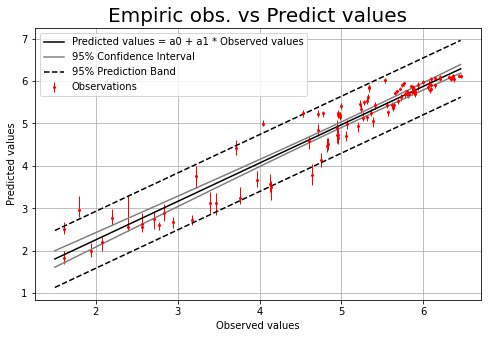

In [26]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [27]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [28]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.267, median - 0.264, CI - [0.228-0.304]

SHAP-values for: mf_chm_MAX: mean - 0.25, median - 0.25, CI - [0.198-0.302]

SHAP-values for: mf_chm_MEAN: mean - 0.503, median - 0.504, CI - [0.453-0.551]



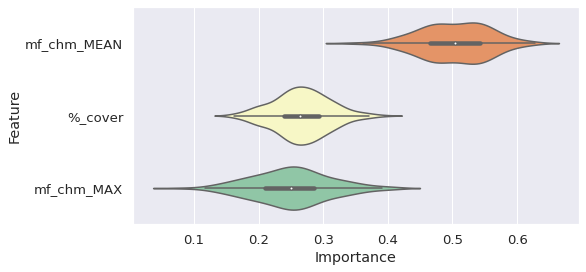

In [30]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MEAN', '%_cover', 'mf_chm_MAX'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [31]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [32]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 57.84, median: 60.0,
 pred. interval (P(0.025)-P(0.975)): 38.925-64.0, 
 conf. interval (p-value=0.95): 51.872-63.612 
***
Aggregate bias statistic: 
 mean: -0.027, median: -0.02,
 pred. interval (P(0.025)-P(0.975)): -0.203-0.152, 
 conf. interval (p-value=0.95): -0.098-0.041 
***
Aggregate RMSE statistic: 
 mean: 0.356, median: 0.352, pred. interval (P(0.025)-P(0.975)): 0.247-0.489, 
 conf. interval (p-value=0.95): 0.298-0.42 
***
Aggregate MSE statistic: 
 mean: 0.132, median: 0.124, pred. interval (P(0.025)-P(0.975)): 0.061-0.239, 
 conf. interval (p-value=0.95): 0.089-0.177 
***
Aggregate R^2 statistic: 
 mean: 0.906, median: 0.916, pred. interval (P(0.025)-P(0.975)): 0.77-0.963, 
 conf. interval (p-value=0.95): 0.879-0.941 
***
Aggregate bias(%) statistic: 
 mean: -0.509, median: -0.399, pred. interval (P(0.025)-P(0.975)): -3.995-3.325, 
 conf. interval (p-value=0.95): -1.953-0

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

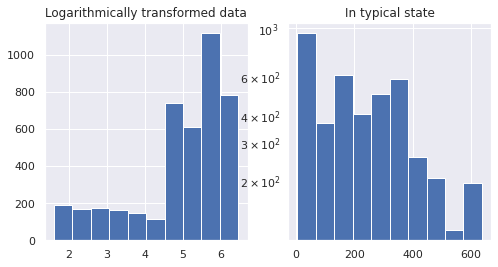

In [33]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [34]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [1, 2, 3, 4, 5, 6])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 10, 50, 100, 200, 600])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

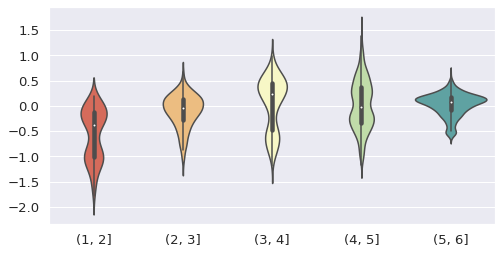

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

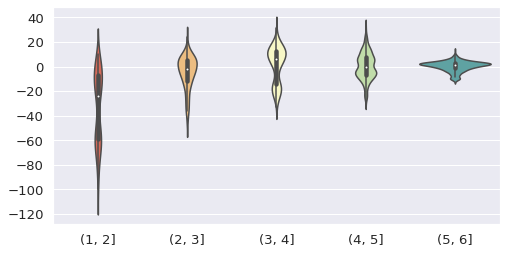

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

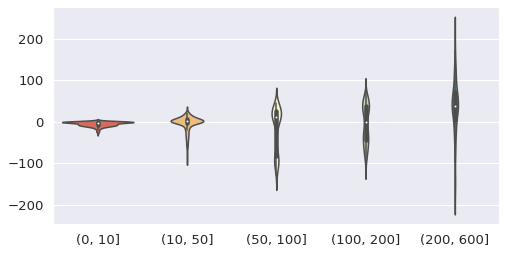

In [37]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

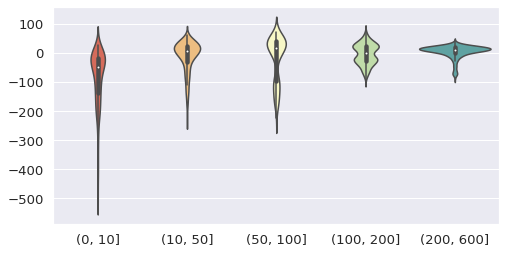

In [38]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.23443
[1]	validation_0-rmse:3.87429
[2]	validation_0-rmse:3.52698
[3]	validation_0-rmse:3.21139
[4]	validation_0-rmse:2.92868
[5]	validation_0-rmse:2.68196
[6]	validation_0-rmse:2.44431
[7]	validation_0-rmse:2.23634
[8]	validation_0-rmse:2.06947
[9]	validation_0-rmse:1.90061
[10]	validation_0-rmse:1.73928
[11]	validation_0-rmse:1.58851


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.46361
[13]	validation_0-rmse:1.34193
[14]	validation_0-rmse:1.22970
[15]	validation_0-rmse:1.13020
[16]	validation_0-rmse:1.03359
[17]	validation_0-rmse:0.95688
[18]	validation_0-rmse:0.88356
[19]	validation_0-rmse:0.81759
[20]	validation_0-rmse:0.75404
[21]	validation_0-rmse:0.71050
[22]	validation_0-rmse:0.65539
[23]	validation_0-rmse:0.61180
[24]	validation_0-rmse:0.57318
[25]	validation_0-rmse:0.54360
[26]	validation_0-rmse:0.51251
[27]	validation_0-rmse:0.48144
[28]	validation_0-rmse:0.45463
[29]	validation_0-rmse:0.43272
[30]	validation_0-rmse:0.40914
[31]	validation_0-rmse:0.39120
[32]	validation_0-rmse:0.37584
[33]	validation_0-rmse:0.36574
[34]	validation_0-rmse:0.35423
[35]	validation_0-rmse:0.34745
[36]	validation_0-rmse:0.33540
[37]	validation_0-rmse:0.32563
[38]	validation_0-rmse:0.31810
[39]	validation_0-rmse:0.31151
[40]	validation_0-rmse:0.30454
[41]	validation_0-rmse:0.29813
[42]	validation_0-rmse:0.29408
[43]	validation_0-rmse:0.29328
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 64


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

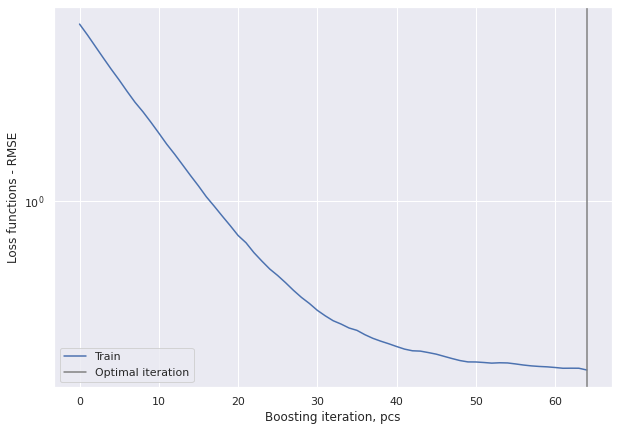

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.08
RMSE: 0.3
Relative RMSE(%):  5.046
MSE: 0.1
R square: 96.0%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.960
Uncertainty
a0: 0.27+/-0.10
a1: 0.945+/-0.019


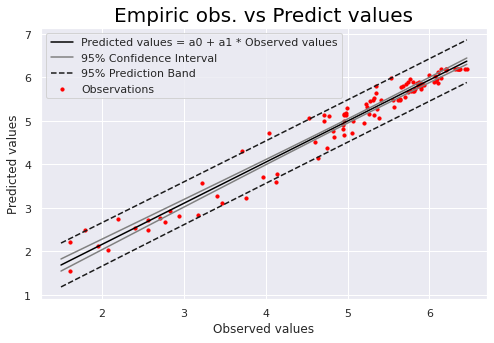

In [48]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

In [ ]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

In [ ]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [ ]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

In [ ]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [ ]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

In [ ]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

In [ ]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/01_LN_GS_CHM_without_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/01_LN_GS_CHM_without_RGB_XGB_model.txt")